# **Assessing and Implementing Supervised Machine Learning for Effective Customer Churn Prediction**

Khanh Tran

## 1. Research Objectives

1. Identifying the primary factors contributing to customer churn: This research aims to figure out the main factors that lead to consumers terminating the service by analyzing customer data and identifying trends. Being able to understand these characteristics facilitates the design of targeted interventions aimed at addressing the factors behind churn.
2. Studying the correlation between different characteristics and turnover status will offer valuable insights into consumer behavior and preferences. The research will provide methods to boost client retention by concentrating on individualized products and enhanced service quality.
3. Create a dependable machine learning model for predicting customer churn. The project attempts to develop a prediction model using sophisticated machine learning techniques to reliably anticipate client attrition. The project aims to provide a strong tool for proactive churn control by evaluating different algorithms and enhancing model performance.
4. Assess and benchmark the performance of various machine learning models across multiple customer churn datasets to establish a reference for future research and development efforts in the field of customer churn prediction.

## 2. Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read telcom_churn_dfset
telcom_churn_df = pd.read_csv('../data/raw/telecom_customer_churn.csv')

# Display the first five rows to understand about dataset
telcom_churn_df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [3]:
# Create a brief summary data table
telcom_churn_df_summary = pd.DataFrame({
    "Unique Values" : telcom_churn_df.nunique(),
    "Missing Values": telcom_churn_df.isnull().sum(),
    'NaN Values': telcom_churn_df.isna().sum(),
    'Duplicated' : telcom_churn_df.duplicated().sum(),
    'Dtypes': telcom_churn_df.dtypes
})

telcom_churn_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  \
Churn Reason                                  20            5174        5174   
Churn Category                                 5            5174        5174   
Offer                                          5            3877        3877   
Internet Type                                  3            1526        1526   
Unlimited Data                                 2            1526        1526   
Streaming Music                                2            1526        1526   
Streaming Movies                               2            1526        1526   
Streaming TV                                   2            1526        1526   
Premium Tech Support                           2            1526        1526   
Device Protection Plan                         2            1526        1526   
Online Security                                2            1526        1526   
Avg Monthly GB Download                       49            1526        1526   
Online Backup                                  2            1526        1526   
Avg Monthly Long Distance Charges           3583             682         682   
Multiple Lines                                 2             682         682   
Contract                                       3               0           0   
Age                                           62               0           0   
Customer Status                                3               0           0   
Total Revenue                               6975               0           0   
Total Long Distance Charges                 6068               0           0   
Total Extra Data Charges                      16               0           0   
Total Refunds                                500               0           0   
Total Charges                               6540               0           0   
Monthly Charge                              1591               0           0   
Payment Method                                 3               0           0   
Paperless Billing                              2               0           0   
Married                                        2               0           0   
Number of Dependents                          10               0           0   
City                                        1106               0           0   
Zip Code                                    1626               0           0   
Latitude                                    1626               0           0   
Longitude                                   1625               0           0   
Gender                                         2               0           0   
Number of Referrals                           12               0           0   
Tenure in Months                              72               0           0   
Phone Service                                  2               0           0   
Internet Service                               2               0           0   
Customer ID                                 7043               0           0   

                                   Duplicated   Dtypes  
Churn Reason                                0   object  
Churn Category                              0   object  
Offer                                       0   object  
Internet Type                               0   object  
Unlimited Data                              0   object  
Streaming Music                             0   object  
Streaming Movies                            0   object  
Streaming TV                                0   object  
Premium Tech Support                        0   object  
Device Protection Plan                      0   object  
Online Security                             0   object  
Avg Monthly GB Download                     0  float64  
Online Backup                               0   object  
Avg Monthly Long Distance Charges           0  float64  
Multiple Lines                              0   object  
Co

In [4]:
# Summary statistics for numerical features
telcom_churn_df.drop(columns=['Zip Code', 'Latitude', 'Longitude']).describe()

Age  Number of Dependents  Number of Referrals  \
count  7043.000000           7043.000000          7043.000000   
mean     46.509726              0.468692             1.951867   
std      16.750352              0.962802             3.001199   
min      19.000000              0.000000             0.000000   
25%      32.000000              0.000000             0.000000   
50%      46.000000              0.000000             0.000000   
75%      60.000000              0.000000             3.000000   
max      80.000000              9.000000            11.000000   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count       7043.000000                        6361.000000   
mean          32.386767                          25.420517   
std           24.542061                          14.200374   
min            1.000000                           1.010000   
25%            9.000000                          13.050000   
50%           29.000000                          25.690000   
75%           55.000000                          37.680000   
max           72.000000                          49.990000   

       Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
count              5517.000000     7043.000000    7043.000000    7043.000000   
mean                 26.189958       63.596131    2280.381264       1.962182   
std                  19.586585       31.204743    2266.220462       7.902614   
min                   2.000000      -10.000000      18.800000       0.000000   
25%                  13.000000       30.400000     400.150000       0.000000   
50%                  21.000000       70.050000    1394.550000       0.000000   
75%                  30.000000       89.750000    3786.600000       0.000000   
max                  85.000000      118.750000    8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
count               7043.000000                  7043.000000    7043.000000  
mean                   6.860713                   749.099262    3034.379056  
std                   25.104978                   846.660055    2865.204542  
min                    0.000000                     0.000000      21.360000  
25%                    0.000000                    70.545000     605.610000  
50%                    0.000000                   401.440000    2108.640000  
75%                    0.000000                  1191.100000    4801.145000  
max                  150.000000                  3564.720000   11979.340000

In [5]:
# Summary statistics for key numerical features
telcom_churn_df[['Age', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Total Charges', 'Total Revenue']].describe()

Age  Tenure in Months  Avg Monthly Long Distance Charges  \
count  7043.000000       7043.000000                        6361.000000   
mean     46.509726         32.386767                          25.420517   
std      16.750352         24.542061                          14.200374   
min      19.000000          1.000000                           1.010000   
25%      32.000000          9.000000                          13.050000   
50%      46.000000         29.000000                          25.690000   
75%      60.000000         55.000000                          37.680000   
max      80.000000         72.000000                          49.990000   

       Total Charges  Total Revenue  
count    7043.000000    7043.000000  
mean     2280.381264    3034.379056  
std      2266.220462    2865.204542  
min        18.800000      21.360000  
25%       400.150000     605.610000  
50%      1394.550000    2108.640000  
75%      3786.600000    4801.145000  
max      8684.800000   11979.340000

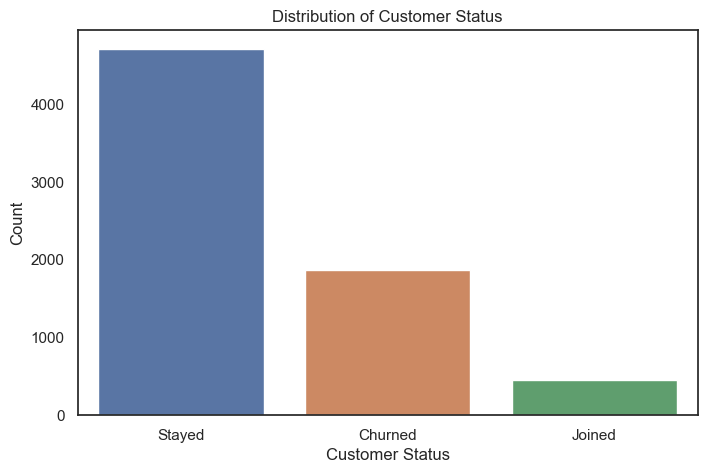

In [6]:
# # Setting the aesthetics for plots
sns.set_theme(style="white")

# Visualizing the distribution of churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Status', data=telcom_churn_df)
plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# Analyzing churn category
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn Category', data=telcom_churn_df, order=telcom_churn_df['Churn Category'].value_counts().index)
plt.title('Churn Category Count')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

# Analyzing churn reason
sns.countplot(data=telcom_churn_df, y='Churn Reason', order=telcom_churn_df['Churn Reason'].value_counts().index)
plt.title('Churn Reason')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.show()

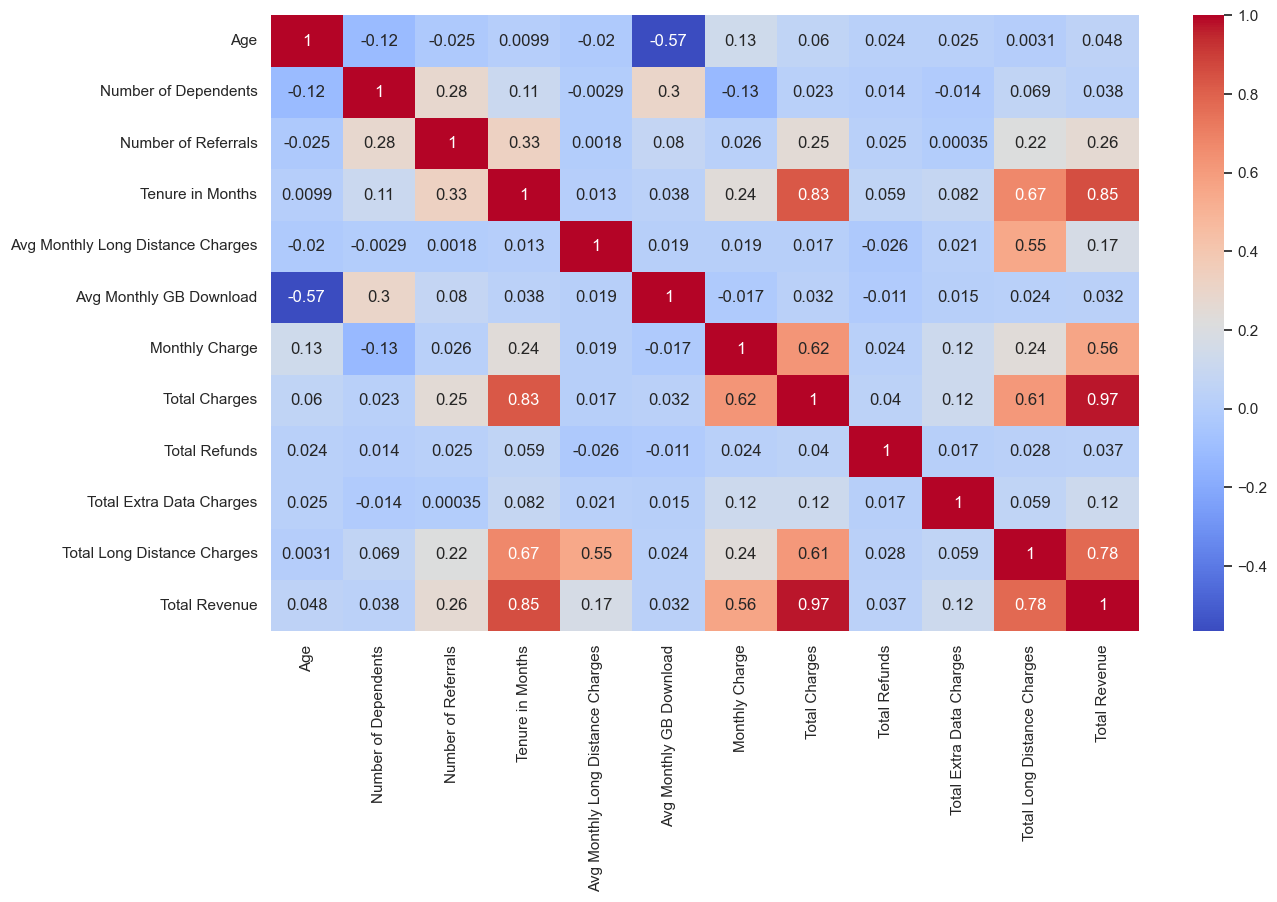

In [7]:
# Correlation among numeric variables
plt.figure(figsize=(14, 8))
sns.heatmap(telcom_churn_df.drop(columns=['Zip Code','Latitude', 'Longitude']).select_dtypes(['int64','float64']).corr(),annot=True, cmap='coolwarm')
plt.show()

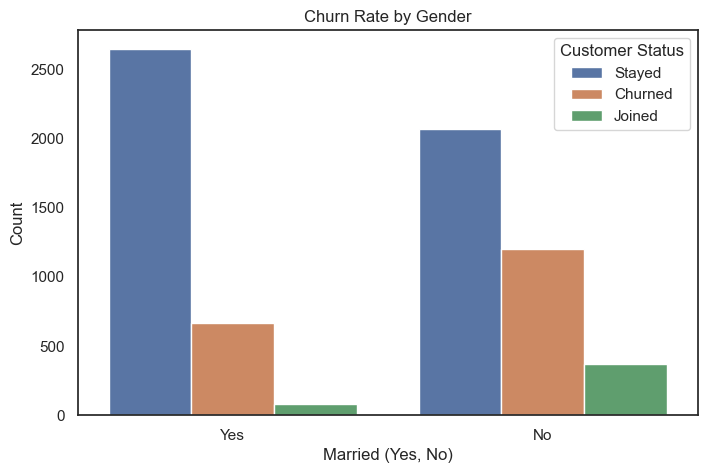

In [8]:
# Analyzing churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Customer Status', data=telcom_churn_df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Customer Status', data=telcom_churn_df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender (Male, Female)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', hue='Customer Status', data=telcom_churn_df)
plt.title('Churn Rate by Gender')
plt.xlabel('Married (Yes, No)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

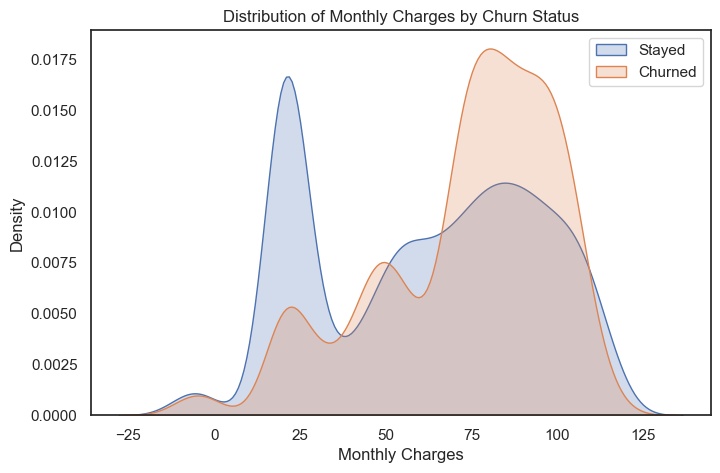

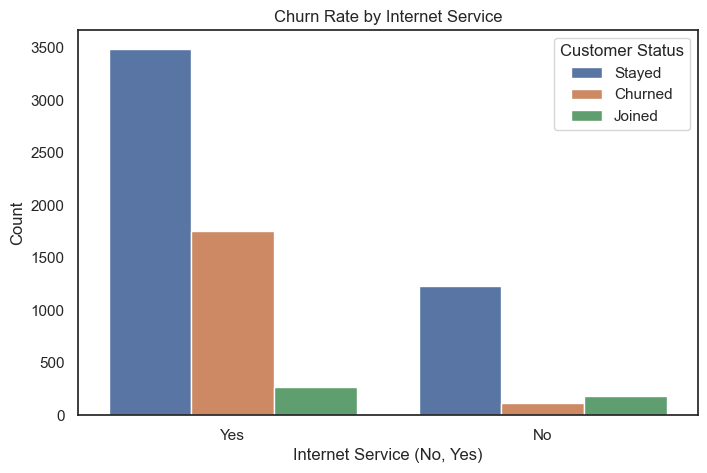

In [9]:
# Analyzing Tenure in Months vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=telcom_churn_df[telcom_churn_df['Customer Status'] == 'Stayed']['Tenure in Months'], label='Stayed', fill=True)
sns.kdeplot(data=telcom_churn_df[telcom_churn_df['Customer Status'] == 'Churned']['Tenure in Months'], label='Churned', fill=True)
plt.title('Distribution of Tenure in Months by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Monthly Charges vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=telcom_churn_df[telcom_churn_df['Customer Status'] == 'Stayed']['Monthly Charge'], label='Stayed', fill=True)
sns.kdeplot(data=telcom_churn_df[telcom_churn_df['Customer Status'] == 'Churned']['Monthly Charge'], label='Churned', fill=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Internet Service vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet Service', hue='Customer Status', data=telcom_churn_df)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service (No, Yes)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

## 3. Data Preparation

#### 3.1 Data Spliting

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif


# Since we focus on Churn prediction, I remove Joined status
telcom_churn_df = telcom_churn_df[telcom_churn_df['Customer Status'] != 'Joined']

# Remove non-informative and directed churn indicator columns
telcom_churn_df = telcom_churn_df.drop(columns=['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason'])

# Map Customer Status
telcom_churn_df['Customer Status'] = telcom_churn_df['Customer Status'].map({'Stayed': 0, 'Churned': 1})

# Using 'Customer Status' as the target variable
X = telcom_churn_df.drop(columns=['Customer Status'])
y = telcom_churn_df['Customer Status']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4941, 30), (1648, 30), (4941,), (1648,))

#### 3.2 \& 3.3. Filling Missing and Scaling Numerical Variables

In [11]:
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Impute missing values 
    ('scaler', StandardScaler()) # standard scaling
])

#### 3.2 \& 3.4 Filling Missing and Encoding Categorical Variables

In [12]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NO')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

In [13]:
# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [14]:
# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

In [15]:
X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_train_pro_df.head()

Age  Number of Dependents  Number of Referrals  Tenure in Months  \
0  1.311603             -0.487722             1.318476         -0.772642   
1  0.121459             -0.487722            -0.670206         -0.230644   
2  0.538010             -0.487722            -0.670206         -0.480797   
3 -0.295091             -0.487722             1.649923          1.562118   
4  0.299981             -0.487722             1.649923          1.020120   

   Avg Monthly Long Distance Charges  Avg Monthly GB Download  Monthly Charge  \
0                           1.628657                -0.719296        0.644497   
1                           0.296842                -0.914736        1.079894   
2                           1.484259                -1.012457       -1.431267   
3                          -0.289131                -0.865876        1.436565   
4                           1.116817                -0.817016        1.418892   

   Total Charges  Total Refunds  Total Extra Data Charges  ...  \
0      -0.457341      -0.254029                 -0.275665  ...   
1       0.222809      -0.254029                 -0.275665  ...   
2      -0.858735      -0.254029                 -0.275665  ...   
3       2.514646      -0.254029                 -0.275665  ...   
4       1.821485      -0.254029                 -0.275665  ...   

   Unlimited Data_No  Unlimited Data_Yes  Contract_Month-to-Month  \
0                0.0                 1.0                      0.0   
1                0.0                 1.0                      1.0   
2                0.0                 0.0                      0.0   
3                0.0                 1.0                      0.0   
4                0.0                 1.0                      0.0   

   Contract_One Year  Contract_Two Year  Paperless Billing_No  \
0                0.0                1.0                   0.0   
1                0.0                0.0                   0.0   
2                1.0                0.0                   1.0   
3                0.0                1.0                   1.0   
4                1.0                0.0                   0.0   

   Paperless Billing_Yes  Payment Method_Bank Withdrawal  \
0                    1.0                             0.0   
1                    1.0                             0.0   
2                    0.0                             0.0   
3                    0.0                             0.0   
4                    1.0                             0.0   

   Payment Method_Credit Card  Payment Method_Mailed Check  
0                         1.0                          0.0  
1                         1.0                          0.0  
2                         1.0                          0.0  
3                         1.0                          0.0  
4                         1.0                          0.0  

[5 rows x 65 columns]

In [16]:
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

Age  Number of Dependents  Number of Referrals  Tenure in Months  \
0 -0.652134             -0.487722            -0.338759         -0.814334   
1  0.002445             -0.487722            -0.670206         -0.814334   
2  0.954560             -0.487722            -0.670206         -1.314640   
3  0.240474              2.576928             0.655582         -0.397413   
4 -0.176077             -0.487722             2.644264          1.520426   

   Avg Monthly Long Distance Charges  Avg Monthly GB Download  Monthly Charge  \
0                           0.332297                 0.355628        0.620398   
1                           0.644300                -1.012457       -1.465006   
2                           1.510044                -0.230694       -0.484963   
3                          -1.204512                 1.821433        0.337631   
4                          -0.305247                -1.012457       -1.450546   

   Total Charges  Total Refunds  Total Extra Data Charges  ...  \
0      -0.493839      -0.254029                 -0.275665  ...   
1      -0.943332      -0.254029                 -0.275665  ...   
2      -1.013550      -0.254029                 -0.275665  ...   
3      -0.232440      -0.254029                 -0.275665  ...   
4      -0.462435      -0.254029                 -0.275665  ...   

   Unlimited Data_No  Unlimited Data_Yes  Contract_Month-to-Month  \
0                0.0                 1.0                      1.0   
1                0.0                 0.0                      1.0   
2                0.0                 1.0                      1.0   
3                0.0                 1.0                      1.0   
4                0.0                 0.0                      0.0   

   Contract_One Year  Contract_Two Year  Paperless Billing_No  \
0                0.0                0.0                   0.0   
1                0.0                0.0                   1.0   
2                0.0                0.0                   0.0   
3                0.0                0.0                   0.0   
4                0.0                1.0                   1.0   

   Paperless Billing_Yes  Payment Method_Bank Withdrawal  \
0                    1.0                             1.0   
1                    0.0                             1.0   
2                    1.0                             0.0   
3                    1.0                             1.0   
4                    0.0                             0.0   

   Payment Method_Credit Card  Payment Method_Mailed Check  
0                         0.0                          0.0  
1                         0.0                          0.0  
2                         1.0                          0.0  
3                         0.0                          0.0  
4                         1.0                          0.0  

[5 rows x 65 columns]

#### 3.5 Data Sampling

In [17]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.pipeline import Pipeline as ImbPipeline

# Creating a processing and SMOTE pipeline
processing_smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=6910))
])

# Fit & transform SMOTE processing pipeline to the training data
X_train_smote, y_train_smote = processing_smote_pipeline.fit_resample(X_train, y_train)

X_train_smote.shape, y_train_smote.shape

((7078, 65), (7078,))

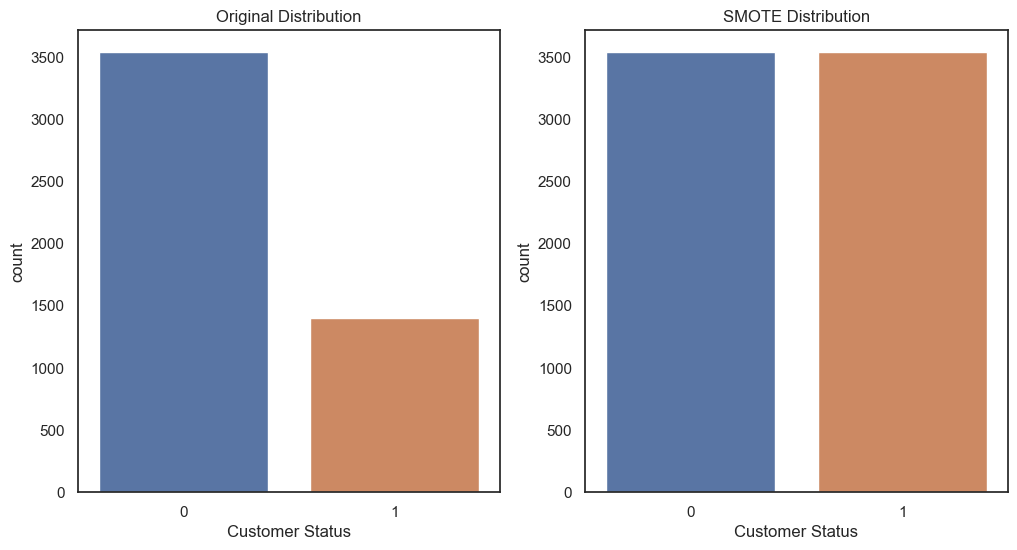

In [18]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot the original class distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Original Distribution')

# Plot the class distribution after apply SMOTE 
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote)
plt.title('SMOTE Distribution')

plt.show()

## 4. Predictive Modelling

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=6910),
    "SVC": SVC(random_state=6910),
    "KNeighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=6910),
    "Random Forest": RandomForestClassifier(random_state=6910),
    "Gradient Boosting": GradientBoostingClassifier(random_state=6910),
    "AdaBoost": AdaBoostClassifier(random_state=6910),
    "Bagging": BaggingClassifier(random_state=6910),
    "MLP": MLPClassifier(random_state=6910),
    "XGboost": XGBClassifier(random_state=6910),
    "Catboost": CatBoostClassifier(random_state=6910, verbose=False),
    "Lightgbm": LGBMClassifier(random_state=6910, verbose=-1)
    }

## 5. Models Evaluation

#### Classifiers Performance Evaluation

In [20]:
# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Gradient Boosting        0.87       0.82    0.70  0.75     0.93
XGboost                  0.87       0.80    0.71  0.75     0.93
Catboost                 0.87       0.81    0.70  0.75     0.93
Lightgbm                 0.87       0.80    0.71  0.75     0.93
AdaBoost                 0.86       0.78    0.72  0.75     0.92
Random Forest            0.87       0.83    0.66  0.74     0.92
Logistic Regression      0.85       0.74    0.73  0.73     0.91
SVC                      0.85       0.76    0.68  0.72     0.91
Bagging                  0.85       0.80    0.64  0.71     0.90
MLP                      0.84       0.72    0.68  0.70     0.90
GaussianNB               0.76       0.55    0.85  0.67     0.86
KNeighbors               0.80       0.64    0.67  0.66     0.85
Decision Tree            0.82       0.68    0.68  0.68     0.78


In [22]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Gradient Boosting        0.89       0.83    0.76  0.79     0.94
Catboost                 0.89       0.83    0.76  0.79     0.94
Lightgbm                 0.88       0.81    0.76  0.78     0.94
XGboost                  0.88       0.80    0.75  0.77     0.93
AdaBoost                 0.87       0.79    0.75  0.77     0.93
Random Forest            0.88       0.83    0.70  0.76     0.93
Logistic Regression      0.86       0.76    0.76  0.76     0.92
MLP                      0.84       0.69    0.81  0.74     0.91
Bagging                  0.86       0.81    0.68  0.74     0.90
KNeighbors               0.82       0.68    0.70  0.69     0.87
GaussianNB               0.76       0.55    0.87  0.67     0.87
Decision Tree            0.82       0.66    0.74  0.70     0.79
SVC                      0.87       0.79    0.72  0.76      NaN


  Model  Accuracy  Precision  Recall  F1 Score
0   cat      0.89       0.83    0.76      0.79
1  lgbm      0.88       0.81    0.76      0.78
2   xgb      0.88       0.80    0.75      0.77


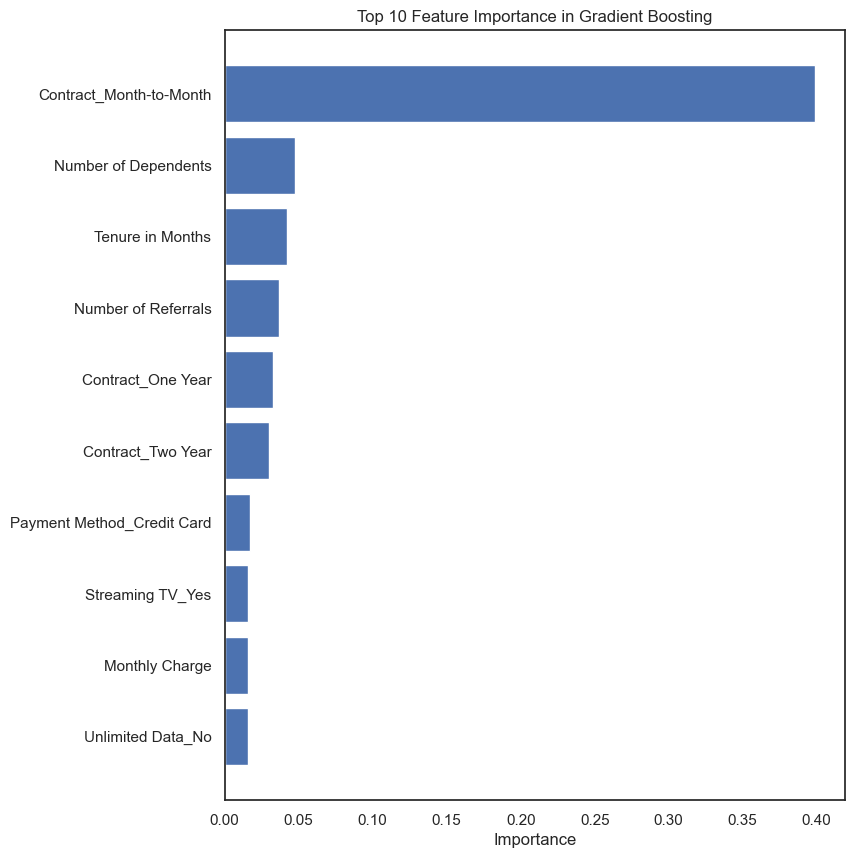

In [23]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

In [65]:
### Apply SMOTE on training dataset

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_smote, y_train_smote, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_sm_df = pd.DataFrame(cv_results).T
cv_results_sm_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_sm_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Random Forest            0.91       0.91    0.90  0.91     0.97
XGboost                  0.91       0.91    0.90  0.91     0.97
Catboost                 0.91       0.92    0.90  0.91     0.97
Lightgbm                 0.91       0.92    0.90  0.91     0.97
Gradient Boosting        0.90       0.90    0.90  0.90     0.97
Bagging                  0.89       0.90    0.87  0.89     0.96
AdaBoost                 0.88       0.87    0.90  0.88     0.96
MLP                      0.89       0.87    0.91  0.89     0.95
SVC                      0.86       0.83    0.91  0.87     0.94
Logistic Regression      0.84       0.82    0.88  0.85     0.93
KNeighbors               0.83       0.76    0.96  0.85     0.91
GaussianNB               0.81       0.78    0.85  0.81     0.88
Decision Tree            0.86       0.85    0.87  0.86     0.86


In [66]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_sm_df = pd.DataFrame(test_results).T
test_results_sm_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_sm_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Gradient Boosting        0.88       0.78    0.82  0.80     0.94
Catboost                 0.88       0.80    0.79  0.80     0.94
AdaBoost                 0.87       0.72    0.85  0.78     0.94
Lightgbm                 0.87       0.77    0.78  0.77     0.94
XGboost                  0.88       0.78    0.78  0.78     0.93
Random Forest            0.87       0.78    0.75  0.77     0.92
Logistic Regression      0.83       0.65    0.88  0.75     0.92
MLP                      0.85       0.70    0.79  0.74     0.91
Bagging                  0.85       0.75    0.73  0.74     0.90
GaussianNB               0.77       0.57    0.85  0.68     0.87
KNeighbors               0.74       0.53    0.86  0.66     0.86
Decision Tree            0.81       0.65    0.71  0.68     0.78
SVC                      0.84       0.68    0.86  0.76      NaN


#### Hyperparameters top 3 algorithms

##### Hyperparameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

lgbm = LGBMClassifier(random_state=6910, verbose=-1)
gbm = GradientBoostingClassifier(random_state=6910)
ada = AdaBoostClassifier(random_state=6910)

# LightGBM parameters grid
lgbm_grid_params = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': [20, 30, 50, 70],
    'max_depth': [-1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample_for_bin': [200000, 220000, 240000, 260000],
    'objective': ['binary'],
    'class_weight': [None, 'balanced'],
    'min_split_gain': [0.0, 0.1, 0.2, 0.3],
    'min_child_weight': [0.001, 0.01, 0.1],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.1, 0.5, 1.0],
    'subsample_freq': [0, 1, 2, 3],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'importance_type': ['split', 'gain']
}

# Gradient Boosting parameters grid
gbm_grid_params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_weight_fraction_leaf': [0, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_impurity_decrease': [0, 0.01, 0.02, 0.05]
}

# AdaBoost parameters grid
ada_grid_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
# # LightGBM GridSearchCV
# lgbm_grid = GridSearchCV(lgbm, lgbm_grid_params, scoring='roc_auc', cv=cv)
# lgbm_grid.fit(X_train, y_train)

# # Gradient Boosting GridSearchCV
# gbm_grid = GridSearchCV(gbm, gbm_grid_params, scoring='roc_auc', cv=cv)
# gbm_grid.fit(X_train, y_train)

# # AdaBoost GridSearchCV
# ada_grid = GridSearchCV(ada, ada_grid_params, scoring='roc_auc', cv=cv)
# ada_grid.fit(X_train, y_train)

# print("Best parameters for LightGBM:", lgbm_grid.best_params_)
# print("Best parameters for Gradient Boosting:", gbm_grid.best_params_)
# print("Best parameters for AdaBoost:", ada_grid.best_params_)

# print("Best 5-Fold CV Score for LightGBM:", lgbm_grid.best_score_)
# print("Best 5-Fold CV Score for Gradient Boosting:", gbm_grid.best_score_)
# print("Best 5-Fold CV Score for AdaBoost:", ada_grid.best_score_)

##### Hyperparameters using RandomizedSearchCV

In [ ]:
### RandomizedSearchCV on original training data set
from scipy.stats import randint, uniform

# LightGBM parameters for RandomizedSearchCV
lgbm_rand_params = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': randint(31, 90),
    'max_depth': randint(-1, 9),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample_for_bin': randint(200000, 260000),
    'objective': ['binary'],
    'class_weight': [None, 'balanced'],
    'min_split_gain': uniform(0.0, 0.3),
    'min_child_weight': [0.001, 0.01, 0.1],
    'min_child_samples': randint(10, 40),
    'subsample': uniform(0.8, 1.0),
    'subsample_freq': randint(0, 3),
    'colsample_bytree': uniform(0.6, 1.0),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0), 
    'importance_type': ['split', 'gain']
}

# Gradient Boosting parameters for RandomizedSearchCV
gbm_rand_params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.8, 1.0),
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 6),
    'min_weight_fraction_leaf': uniform(0, 0.2),
    'max_depth': randint(3, 9),
    'min_impurity_decrease': uniform(0, 0.05)
}

# AdaBoost parameters for RandomizedSearchCV
ada_rand_params = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 1.0),
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
# LightGBM RandomizedSearchCV
lgbm_random = RandomizedSearchCV(lgbm, lgbm_rand_params, scoring='roc_auc', cv=cv, n_iter=50, random_state=6910)
lgbm_random.fit(X_train_pro_df, y_train)

# Gradient Boosting RandomizedSearchCV
gbm_random = RandomizedSearchCV(gbm, gbm_rand_params, scoring='roc_auc', cv=cv, n_iter=50, random_state=6910)
gbm_random.fit(X_train_pro_df, y_train)

# AdaBoost RandomizedSearchCV
ada_random = RandomizedSearchCV(ada, ada_rand_params, scoring='roc_auc', cv=cv, n_iter=50, random_state=6910)
ada_random.fit(X_train_pro_df, y_train)


print("Best parameters for LightGBM (Randomized):", lgbm_random.best_params_)
print("Best parameters for Gradient Boosting (Randomized):", gbm_random.best_params_)
print("Best parameters for AdaBoost (Randomized):", ada_random.best_params_)

print("Best 5-Fold CV Score for LightGBM (Randomized):", lgbm_random.best_score_)
print("Best 5-Fold CV Score for Gradient Boosting (Randomized):", gbm_random.best_score_)
print("Best 5-Fold CV Score for AdaBoost (Randomized):", ada_random.best_score_)

In [ ]:
# Retrain the classifiers with the best parameters
best_lgbm_model = LGBMClassifier(**lgbm_random.best_params_, random_state=6910, verbose=-1)
best_gb_model = GradientBoostingClassifier(**gbm_random.best_params_, random_state=6910)
best_ada_model = AdaBoostClassifier(**ada_random.best_params_, random_state=6910)

# List of classifiers
classifiers = [
    ('LightGBM', best_lgbm_model),
    ('Gradient Boosting', best_gb_model),
    ('AdaBoost', best_ada_model)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

In [ ]:
### RandomizedSearchCV on SMOTE training data set

# LightGBM RandomizedSearchCV
lgbm_random_smote = RandomizedSearchCV(lgbm, lgbm_rand_params, scoring='f1', cv=cv, n_iter=50, random_state=6910)
lgbm_random_smote.fit(X_train_smote, y_train_smote)

# Gradient Boosting RandomizedSearchCV
gbm_random_smote = RandomizedSearchCV(gbm, gbm_rand_params, scoring='f1', cv=cv, n_iter=50, random_state=6910)
gbm_random_smote.fit(X_train_smote, y_train_smote)

# AdaBoost RandomizedSearchCV
ada_random_smote = RandomizedSearchCV(ada, ada_rand_params, scoring='f1', cv=cv, n_iter=50, random_state=6910)
ada_random_smote.fit(X_train_smote, y_train_smote)

print("Best 5-Fold CV Score for LightGBM (Randomized):", lgbm_random_smote.best_score_)
print("Best 5-Fold CV Score for AdaBoost (Randomized):", ada_random_smote.best_score_)
print("Best 5-Fold CV Score for Gradient Boosting (Randomized):", gbm_random_smote.best_score_)

In [ ]:
# Retrain the classifiers with the best parameters trained on SMOTE training dataset
best_lgbm_model_smote = LGBMClassifier(**lgbm_random_smote.best_params_, random_state=6910, verbose=-1)
best_gb_model_smote = GradientBoostingClassifier(**gbm_random_smote.best_params_, random_state=6910)
best_ada_model_smote = AdaBoostClassifier(**ada_random_smote.best_params_, random_state=6910)


# List of classifiers
classifiers = [
    ('LightGBM', best_lgbm_model_smote),
    ('Gradient Boosting', best_gb_model_smote),
    ('AdaBoost', best_ada_model_smote)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

##### Hyperparameters using Optuna

In [ ]:

import optuna

def objective(trial):
    lgb_params = {
        'num_leaves': trial.suggest_int('num_leaves', 31, 90),
        'max_depth': trial.suggest_int('max_depth', -1, 9),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 200000, 260000),
        'objective': 'binary',
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'min_split_gain': trial.suggest_uniform('min_split_gain', 0.0, 0.3),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [0.001, 0.01, 0.1]),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 40),
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 3),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 1.0),
        'importance_type': trial.suggest_categorical('importance_type', ['split', 'gain']),
        'verbosity': -1
    }

    model = LGBMClassifier(**lgb_params,force_col_wise=True,)
    model.fit(X_train_pro_df, y_train)

    y_pred = model.predict_proba(X_test_pro_df)[:,1]

    # Evaluate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
    return  roc_auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best Parameters:", best_params)

In [ ]:
import optuna.visualization as optuna_viz
optuna_viz.plot_optimization_history(study)

#### Extract Feature Importance

In [ ]:
### Feature Importance

# LightGBM Feature Importance
feature_importance_lgbm = best_lgbm_model.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = best_gb_model.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

# AdaBoost Feature Importance
if hasattr(best_ada_model, 'feature_importances_'):
    feature_importance_ada = best_ada_model.feature_importances_
    sorted_idx_ada = feature_importance_ada.argsort()[-10:]

    plt.figure(figsize=(8, 10))
    plt.barh(range(len(sorted_idx_ada)), feature_importance_ada[sorted_idx_ada], align='center')
    plt.yticks(range(len(sorted_idx_ada)), [X_test_pro_df.columns[i] for i in sorted_idx_ada])
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importance in AdaBoost')
    plt.show()


In [ ]:
import shap
plt.figure(figsize=(8, 10))
# Explain the model's predictions using SHAP for LightGBM
explainer = shap.TreeExplainer(best_lgbm_model)
shap_values = explainer.shap_values(X_test_pro_df)

# Plot the SHAP values for the first 10 predictions
shap.summary_plot(shap_values, X_test_pro_df, plot_type="bar", max_display=10)



## 6. Model Deployment

#### We need to subscribe the Microsoft Azure in order to implement this deployment step.

In [ ]:
# Import libraries

import os
import json
import requests

from azureml.core import Workspace
from azureml.core.model import Model
from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.model import InferenceConfig
from azureml.core.webservice import AciWebservice, Webservice

In [ ]:
# 1. Model Serialization - save the final model and processing pipeline to pickle file
import pickle

filename = 'churn_prediction_lgbm.pkl'
pickle.dump(best_lgbm_model, open(filename, 'wb'))

pipeline_filename = 'processing_pipeline.pkl'
pickle.dump(processing_pipeline, open(pipeline_filename, 'wb'))

In [ ]:
# 2. Scoring scrip in "score.py" file

In [ ]:
# 3. Create Azure resources

# Load the configuration file
config_path = "config.json"

# Read JSON data into a dictionary
import json
with open(config_path, 'r') as file:
    data = json.load(file)

# Get Azure config info
subscription_id = data["subscription_id"]
resource_group = data["resource_group"]  
workspace_name = data["workspace_name"]
region = data["region"]

# # Create a workspace
# ws = Workspace.create(name=workspace_name,
#                       subscription_id=subscription_id,
#                       resource_group=resource_group,
#                       location=region)

# Get the available workspace
ws = Workspace.from_config()

In [ ]:
# 4. Deploy the model

# Register the model in Azure Machine Learning
model_path = 'churn_prediction_lgbm.pkl'
model_name='churn_prediction_model'
registered_model = Model.register(model_path=model_path, model_name=model_name, workspace=ws)

# Create a Conda environment for model
conda_env = Environment('my-conda-env')
conda_env.python.conda_dependencies = CondaDependencies.create(
    conda_packages=['scikit-learn', 'lightgbm', 'xgboost', 'catboost', 'pandas', 'seaborn', 'imblearn', 'shap'],
    pip_packages=['azureml-sdk']
)

# Create an InferenceConfig
inference_config = InferenceConfig(entry_script='score.py', environment=conda_env)

# Specify deployment configuration for ACI
aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)

# Deploy model
service = Model.deploy(workspace=ws,
                       name='churn-prediction-service',
                       models=[registered_model],
                       inference_config=inference_config,
                       deployment_config=aci_config)
service.wait_for_deployment(show_output=True)

In [ ]:
# Get the inference URI
scoring_uri = service.scoring_uri

## 7. Other Churn Datasets

In [24]:
# Load datasets
internet_churn_df = pd.read_csv('../data/raw/internet_service_churn.csv')
bank_churn_df = pd.read_csv('../data/raw/bank_customer-churn-records.csv')
credit_card_churn_df = pd.read_csv('../data/raw/credit_card_churn.csv')
ecommerce_churn_df = pd.read_excel('../data/raw/e-commerce_churn.xlsx')
employee_churn_df = pd.read_csv('../data/raw/employee_attrition.csv')
telco_europa_df = pd.read_csv('../data/raw/churn-telco-europa.csv')
cell2cell_df = pd.read_csv('../data/raw/cell2cell-duke univeristy.csv')
membership_df = pd.read_csv('../data/raw/Membership.csv')
sa_wireless_telecom_df = pd.read_csv('../data/raw/South_Asian_Wireless_Telecom_churn.csv')
nigeria_telcom_df = pd.read_csv('../data/raw/Nigeria_Telecoms_Churn.csv')

#### 7.1 Internet Churn Dataset

##### 7.1.1 Internet Churn EDA

In [25]:
internet_churn_df.head()

id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN                      0           0.0   

   upload_avg  download_over_limit  churn  
0         2.3                    0      0  
1         0.0                    0      1  
2         0.9                    0      1  
3         0.0                    0      1  
4         0.0                    0      1

In [26]:
# Create a brief summary data table
internet_churn_df_summary = pd.DataFrame({
    "Unique Values" : internet_churn_df.nunique(),
    "Missing Values": internet_churn_df.isnull().sum(),
    'NaN Values': internet_churn_df.isna().sum(),
    'Duplicated' : internet_churn_df.duplicated().sum(),
    'Dtypes': internet_churn_df.dtypes
})

internet_churn_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  \
reamining_contract                     247           21572       21572   
download_avg                          2856             381         381   
upload_avg                             802             381         381   
id                                   72274               0           0   
is_tv_subscriber                         2               0           0   
is_movie_package_subscriber              2               0           0   
subscription_age                      1110               0           0   
bill_avg                               179               0           0   
service_failure_count                   19               0           0   
download_over_limit                      8               0           0   
churn                                    2               0           0   

                             Duplicated   Dtypes  
reamining_contract                    0  float64  
download_avg                          0  float64  
upload_avg                            0  float64  
id                                    0    int64  
is_tv_subscriber                      0    int64  
is_movie_package_subscriber           0    int64  
subscription_age                      0  float64  
bill_avg                              0    int64  
service_failure_count                 0    int64  
download_over_limit                   0    int64  
churn                                 0    int64

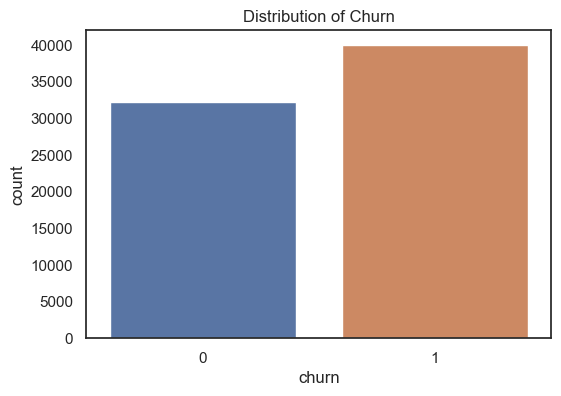

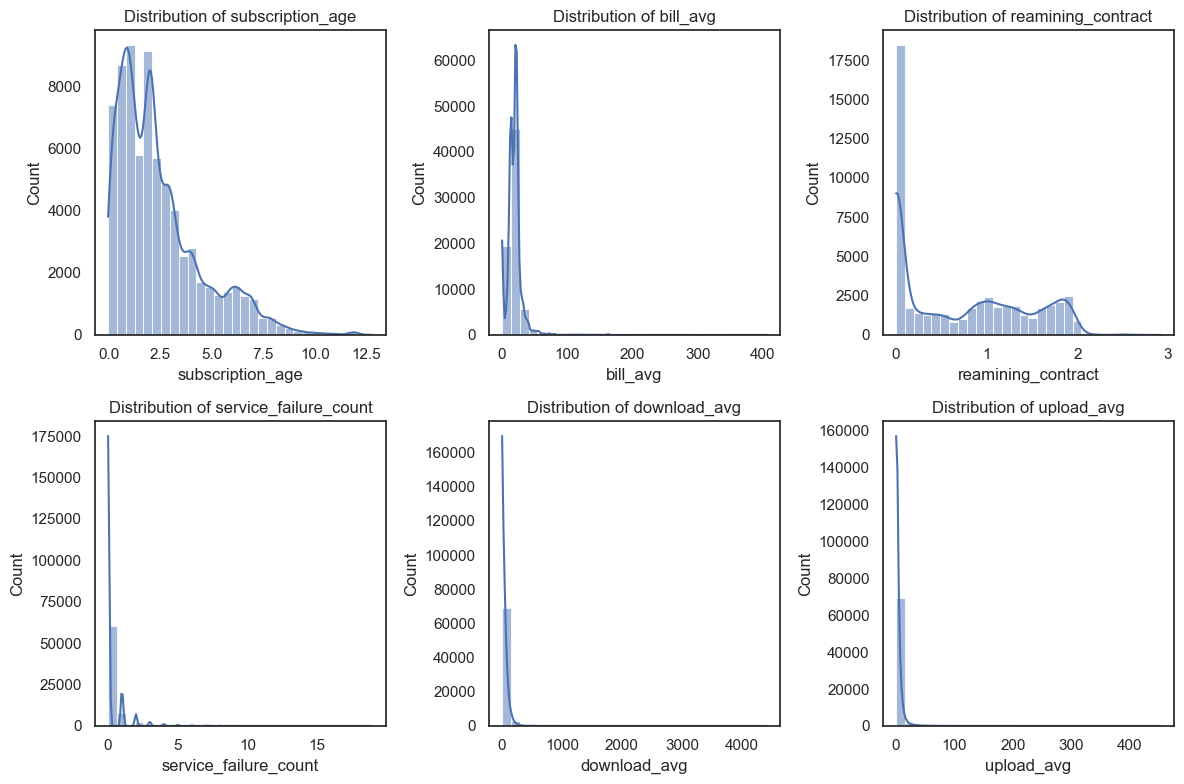

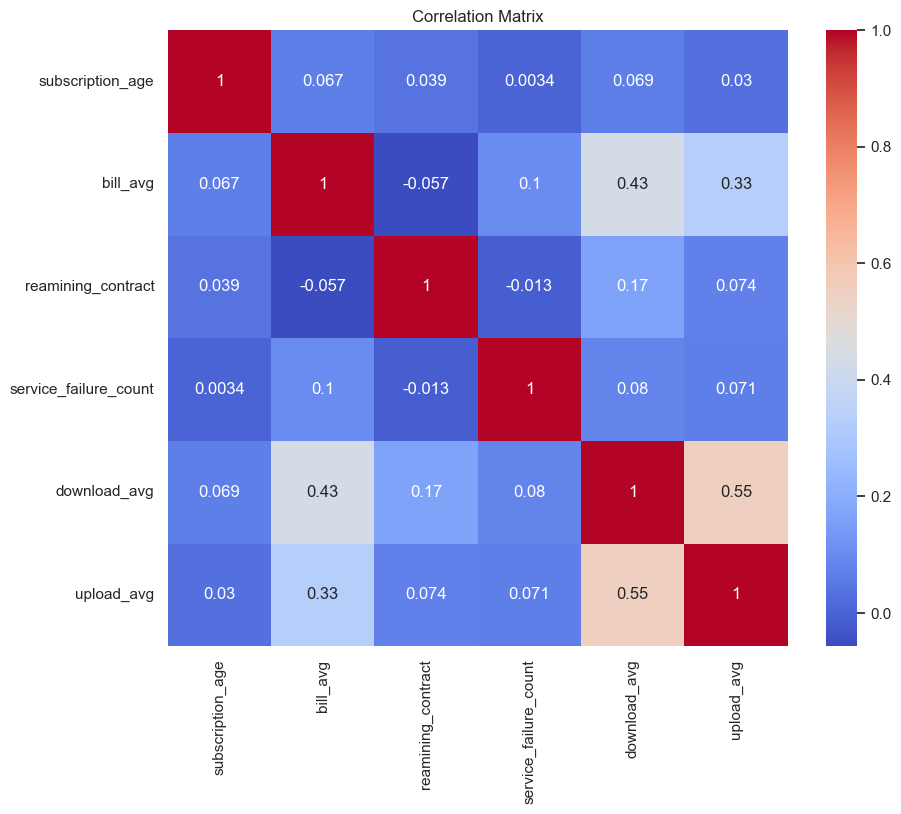

In [27]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=internet_churn_df)
plt.title("Distribution of Churn")
plt.show()

# Distribution of categorical features
cat_features_internet_churn = ['is_tv_subscriber', 'is_movie_package_subscriber']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_internet_churn):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=feature, data=internet_churn_df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
num_features_internet_churn = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count',
                               'download_avg', 'upload_avg']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features_internet_churn):
    plt.subplot(2, 3, i+1)
    sns.histplot(internet_churn_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(internet_churn_df[num_features_internet_churn].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##### 7.1.2 Internet Churn Preprocessing

In [28]:
# Step 1: Remove non-informative columns and correct data types
internet_churn_df = internet_churn_df.drop(columns='id')
internet_churn_df['is_tv_subscriber'] = internet_churn_df['is_tv_subscriber'].astype('category')
internet_churn_df['is_movie_package_subscriber'] = internet_churn_df['is_movie_package_subscriber'].astype('category')
internet_churn_df['churn'] = internet_churn_df['churn'].astype('category')


# Step 2: Create target and  independent features 
X = internet_churn_df.drop(columns=['churn'])
y = internet_churn_df['churn']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_train_pro_df.head()

X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

subscription_age  bill_avg  reamining_contract  service_failure_count  \
0         -0.215983 -1.426988       -3.808048e-16              -0.336829   
1         -0.059384 -1.426988       -3.808048e-16              -0.336829   
2          0.346795 -0.221024       -3.808048e-16              -0.336829   
3         -0.641736  0.231213       -1.226212e+00              -0.336829   
4         -1.008765  0.080468       -2.829665e-01              -0.336829   

   download_avg  upload_avg  download_over_limit  is_tv_subscriber_0  \
0     -0.666277   -0.423439            -0.209569                 0.0   
1     -0.666277   -0.423439            -0.209569                 1.0   
2     -0.282524   -0.242191            -0.209569                 0.0   
3     -0.580999   -0.352953            -0.209569                 1.0   
4      0.370770    0.200860            -0.209569                 0.0   

   is_tv_subscriber_1  is_movie_package_subscriber_0  \
0                 1.0                            0.0   
1                 0.0                            1.0   
2                 1.0                            1.0   
3                 0.0                            1.0   
4                 1.0                            0.0   

   is_movie_package_subscriber_1  
0                            1.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            1.0

##### 7.1.3 Internet Churn Predictive Models

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
XGboost                  0.94       0.96    0.94  0.95     0.98
Catboost                 0.94       0.96    0.94  0.95     0.98
Lightgbm                 0.94       0.96    0.94  0.95     0.98
Random Forest            0.94       0.95    0.93  0.94     0.98
Gradient Boosting        0.94       0.95    0.93  0.94     0.97
Bagging                  0.94       0.95    0.93  0.94     0.97
AdaBoost                 0.93       0.95    0.93  0.94     0.97
MLP                      0.93       0.94    0.93  0.93     0.97
KNeighbors               0.89       0.91    0.89  0.90     0.94
SVC                      0.85       0.87    0.87  0.87     0.92
Decision Tree            0.91       0.92    0.92  0.92     0.91
Logistic Regression      0.82       0.82    0.86  0.84     0.89
GaussianNB               0.71       0.87    0.56  0.68     0.84


In [73]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
XGboost                  0.95       0.96    0.94  0.95     0.98
Catboost                 0.95       0.96    0.94  0.95     0.98
Lightgbm                 0.95       0.96    0.94  0.95     0.98
Random Forest            0.94       0.96    0.94  0.95     0.98
Gradient Boosting        0.94       0.96    0.94  0.95     0.98
Bagging                  0.94       0.96    0.93  0.95     0.98
AdaBoost                 0.94       0.96    0.93  0.95     0.97
MLP                      0.93       0.94    0.94  0.94     0.97
KNeighbors               0.90       0.91    0.90  0.91     0.94
Decision Tree            0.92       0.93    0.93  0.93     0.92
Logistic Regression      0.82       0.82    0.87  0.84     0.89
GaussianNB               0.72       0.88    0.57  0.69     0.84
SVC                      0.86       0.88    0.87  0.87      NaN


  Model  Accuracy  Precision  Recall  F1 Score
0   cat      0.95       0.96    0.94      0.95
1  lgbm      0.95       0.96    0.94      0.95
2   xgb      0.95       0.96    0.94      0.95


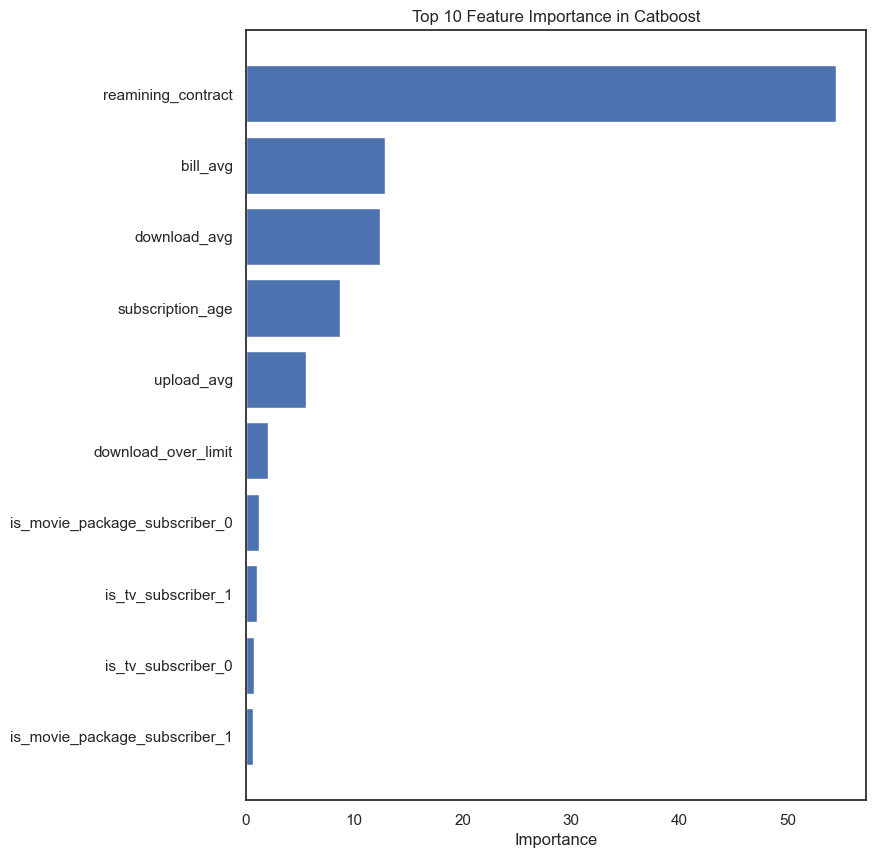

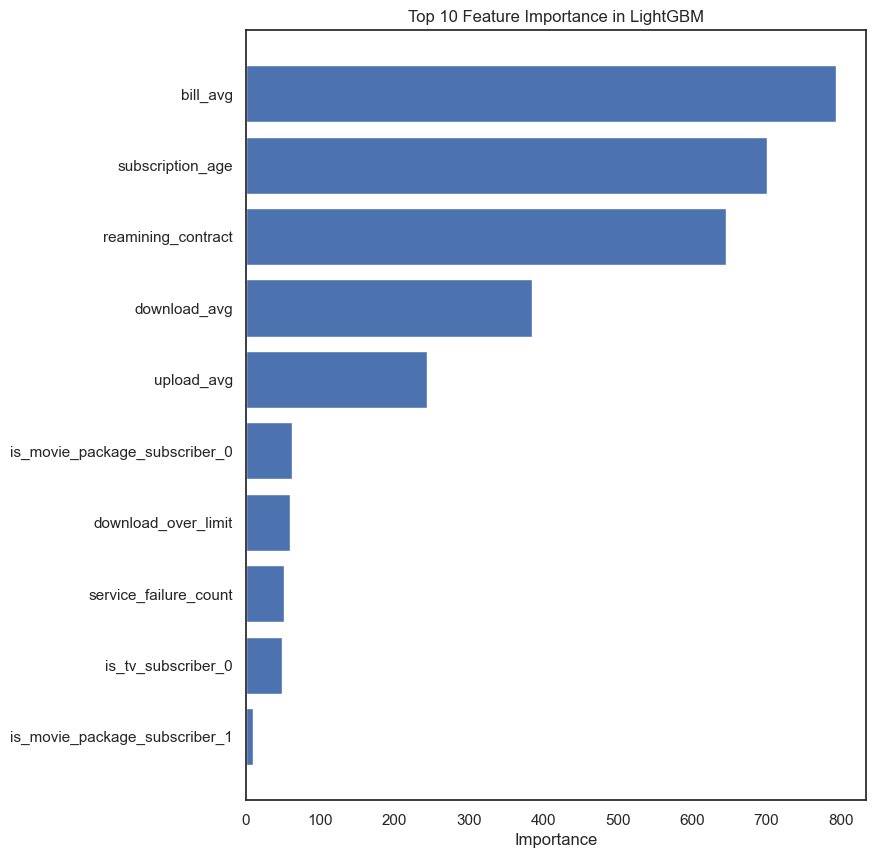

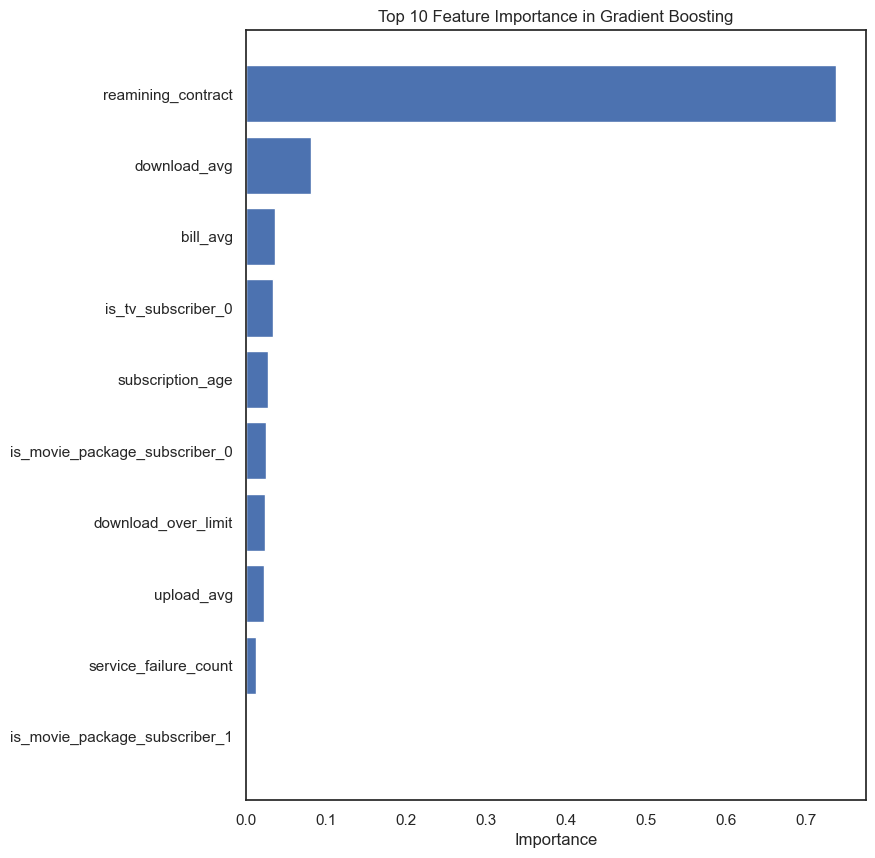

In [74]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.2 Bank Churn Dataset

##### 7.2.1 Bank Churn EDA

In [30]:
# Create a brief summary data table
bank_churn_df_summary = pd.DataFrame({
    "Unique Values" : bank_churn_df.nunique(),
    "Missing Values": bank_churn_df.isnull().sum(),
    'NaN Values': bank_churn_df.isna().sum(),
    'Duplicated' : bank_churn_df.duplicated().sum(),
    'Dtypes': bank_churn_df.dtypes
})

bank_churn_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  Duplicated  \
RowNumber                   10000               0           0           0   
CustomerId                  10000               0           0           0   
Card Type                       4               0           0           0   
Satisfaction Score              5               0           0           0   
Complain                        2               0           0           0   
Exited                          2               0           0           0   
EstimatedSalary              9999               0           0           0   
IsActiveMember                  2               0           0           0   
HasCrCard                       2               0           0           0   
NumOfProducts                   4               0           0           0   
Balance                      6382               0           0           0   
Tenure                         11               0           0           0   
Age                            70               0           0           0   
Gender                          2               0           0           0   
Geography                       3               0           0           0   
CreditScore                   460               0           0           0   
Surname                      2932               0           0           0   
Point Earned                  785               0           0           0   

                     Dtypes  
RowNumber             int64  
CustomerId            int64  
Card Type            object  
Satisfaction Score    int64  
Complain              int64  
Exited                int64  
EstimatedSalary     float64  
IsActiveMember        int64  
HasCrCard             int64  
NumOfProducts         int64  
Balance             float64  
Tenure                int64  
Age                   int64  
Gender               object  
Geography            object  
CreditScore           int64  
Surname              object  
Point Earned          int64

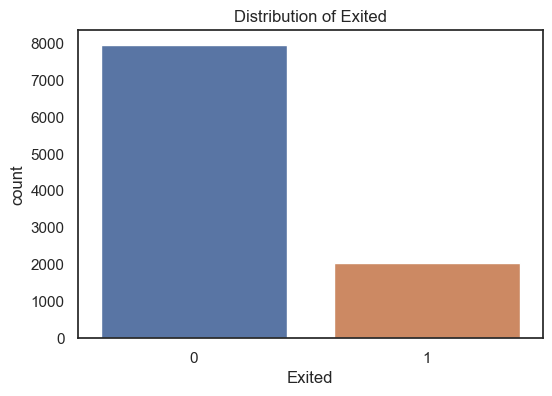

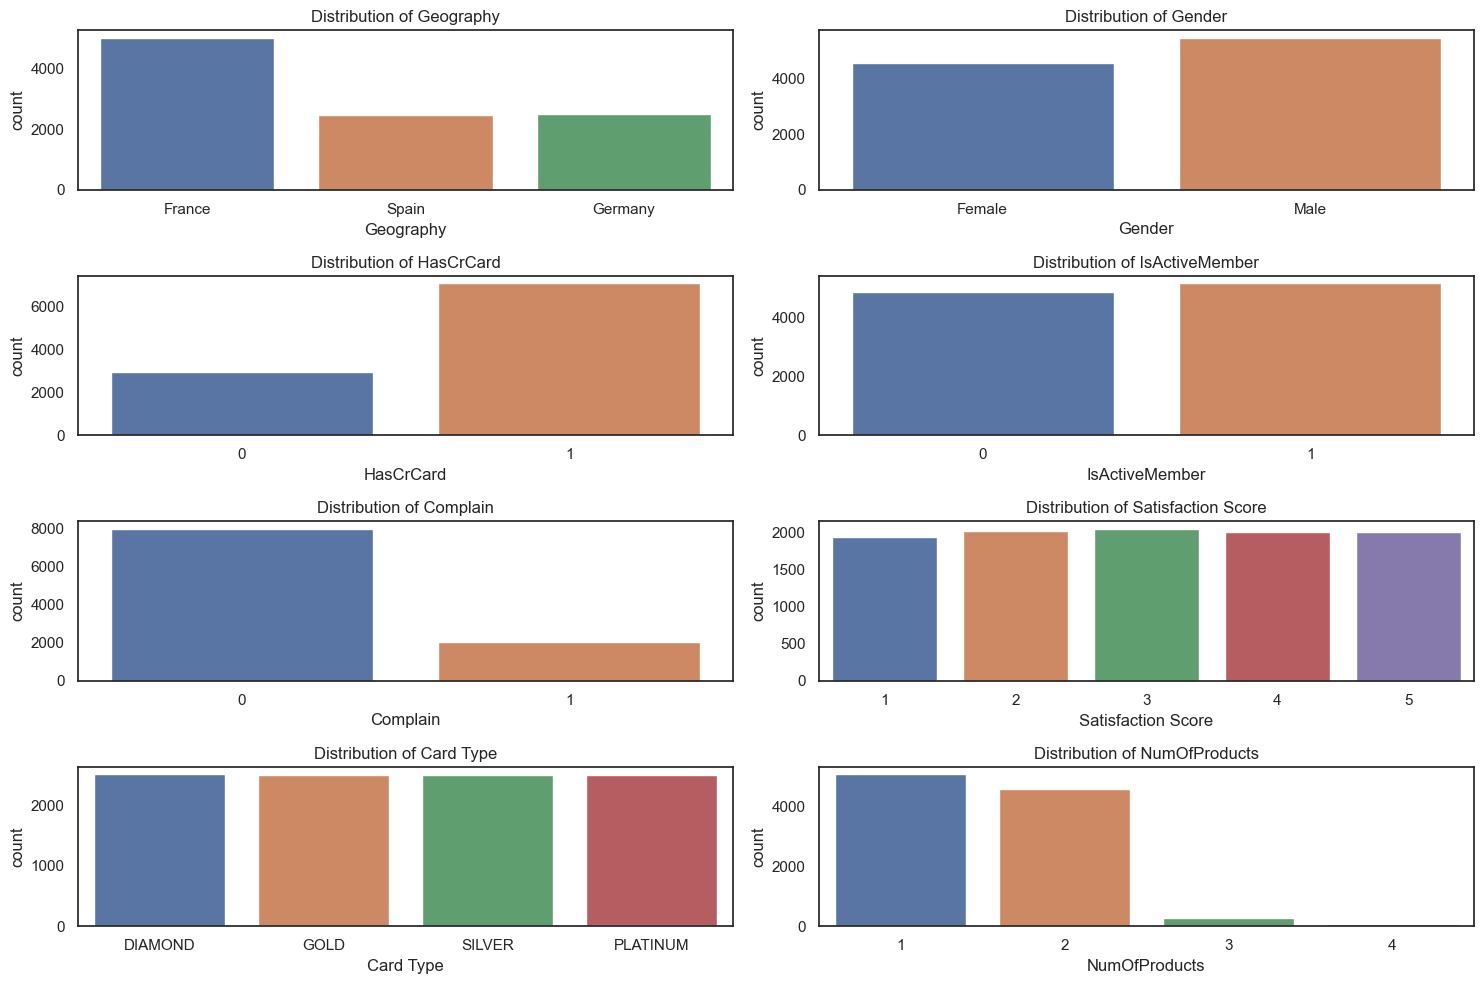

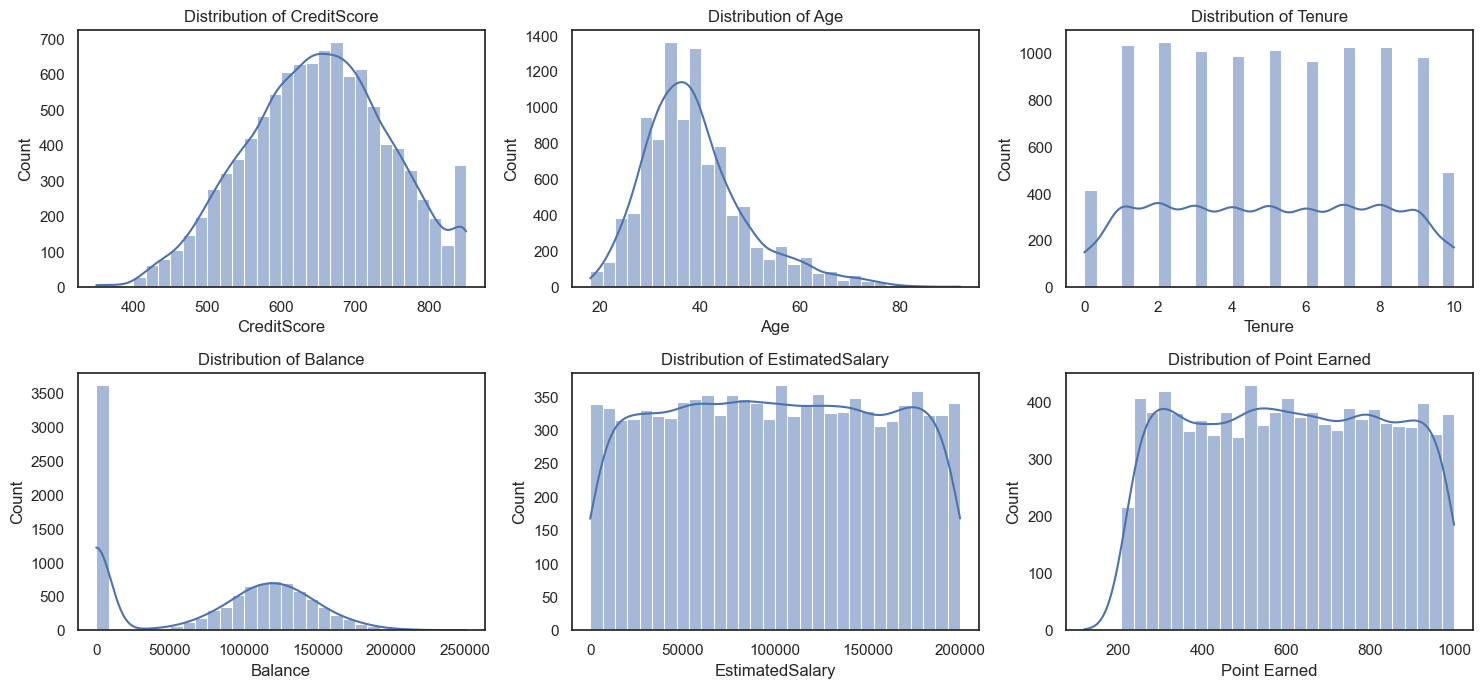

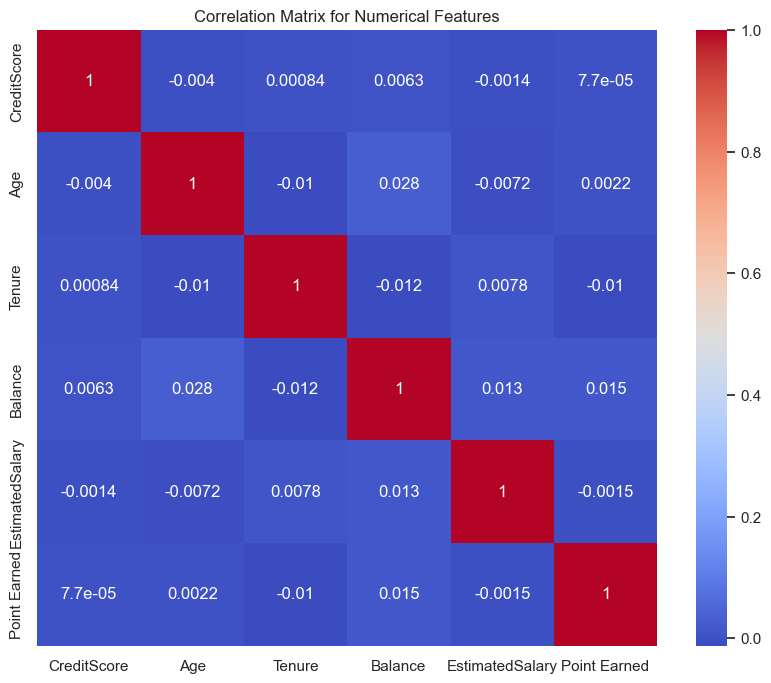

In [31]:
# Distribution of the target variable (Exited)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=bank_churn_df)
plt.title("Distribution of Exited")
plt.show()

# Distribution of categorical features
cat_features_bank_churn = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain',
                           'Satisfaction Score', 'Card Type', 'NumOfProducts']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_bank_churn):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=feature, data=bank_churn_df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
num_features_bank_churn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features_bank_churn):
    plt.subplot(3, 3, i+1)
    sns.histplot(bank_churn_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(bank_churn_df[num_features_bank_churn].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

##### 7.2.2 Bank Churn Preprocessing

In [32]:
# Step 1: Remove non-informative columns and correct data types
bank_churn_df = bank_churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
for col in cat_features_bank_churn:
    bank_churn_df[col] = bank_churn_df[col].astype('category')
bank_churn_df['Exited'] = bank_churn_df['Exited'].astype('category')


# Step 2: Create target and  independent features 
X = bank_churn_df.drop(columns=['Exited'])
y = bank_churn_df['Exited']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

CreditScore       Age    Tenure   Balance  EstimatedSalary  Point Earned  \
0    -1.591128 -0.465641 -0.005021 -1.233888        -0.149284      1.509793   
1    -0.461376 -0.561518 -1.041441  0.507932         0.156309      0.176466   
2    -0.057152 -0.273888  0.340452  1.091711        -0.818441     -1.593946   
3    -1.995351  0.876632 -0.350494  0.918564        -1.408258      0.238276   
4    -0.948517 -1.136778 -0.005021 -1.233888         0.549658     -0.194393   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  ...  \
0               1.0                0.0              0.0            0.0  ...   
1               0.0                0.0              1.0            1.0  ...   
2               0.0                1.0              0.0            1.0  ...   
3               0.0                1.0              0.0            0.0  ...   
4               1.0                0.0              0.0            1.0  ...   

   Complain_1  Satisfaction Score_1  Satisfaction Score_2  \
0         0.0                   1.0                   0.0   
1         1.0                   0.0                   0.0   
2         0.0                   0.0                   0.0   
3         1.0                   0.0                   0.0   
4         0.0                   0.0                   1.0   

   Satisfaction Score_3  Satisfaction Score_4  Satisfaction Score_5  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   1.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   0.0                   1.0   
4                   0.0                   0.0                   0.0   

   Card Type_DIAMOND  Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0                0.0             1.0                 0.0               0.0  
1                0.0             0.0                 1.0               0.0  
2                0.0             0.0                 0.0               1.0  
3                1.0             0.0                 0.0               0.0  
4                1.0             0.0                 0.0               0.0  

[5 rows x 30 columns]

##### 7.2.3 Bank Churn Predictive Models

In [33]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Logistic Regression      1.00       0.99    1.00  1.00     1.00
SVC                      1.00       0.99    1.00  1.00     1.00
GaussianNB               1.00       0.99    1.00  1.00     1.00
Random Forest            1.00       0.99    1.00  1.00     1.00
Gradient Boosting        1.00       0.99    1.00  1.00     1.00
AdaBoost                 1.00       0.99    1.00  1.00     1.00
Bagging                  1.00       0.99    1.00  1.00     1.00
MLP                      1.00       0.99    1.00  1.00     1.00
XGboost                  1.00       0.99    1.00  1.00     1.00
Catboost                 1.00       0.99    1.00  1.00     1.00
Lightgbm                 1.00       0.99    1.00  1.00     1.00
Decision Tree            1.00       0.99    0.99  0.99     0.99
KNeighbors               0.97       0.99    0.83  0.91     0.99


In [79]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Logistic Regression      1.00       1.00    1.00  1.00     1.00
GaussianNB               1.00       1.00    1.00  1.00     1.00
Random Forest            1.00       1.00    1.00  1.00     1.00
Gradient Boosting        1.00       0.99    1.00  1.00     1.00
AdaBoost                 1.00       1.00    1.00  1.00     1.00
Bagging                  1.00       1.00    1.00  1.00     1.00
MLP                      1.00       1.00    1.00  1.00     1.00
XGboost                  1.00       1.00    1.00  1.00     1.00
Catboost                 1.00       1.00    1.00  1.00     1.00
Lightgbm                 1.00       1.00    1.00  1.00     1.00
Decision Tree            0.99       0.99    0.98  0.99     0.99
KNeighbors               0.97       0.99    0.86  0.92     0.98
SVC                      1.00       1.00    1.00  1.00      NaN


##### Predictive models without Complain feature

In [37]:
# Remove complain feature
X_train_ = X_train.drop(columns='Complain')
X_test_ = X_test.drop(columns='Complain')


# Identify numerical columns
numerical_cols = X_train_.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train_.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
# Update categorical columns for processing pipeline
categorical_cols = X_train_.select_dtypes(include=['category']).columns

# Fit & transform processing pipeline to the training data
X_train_processed_ = processing_pipeline.fit_transform(X_train_, y_train)
X_test_processed_ = processing_pipeline.transform(X_test_)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed_, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed_, columns = all_feature_names)



# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed_, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))


# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed_, y_train)
    y_pred = model.predict(X_test_processed_)
    y_pred_proba = model.predict_proba(X_test_processed_)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Gradient Boosting        0.86       0.77    0.46  0.58     0.86
Catboost                 0.86       0.75    0.47  0.58     0.86
Lightgbm                 0.86       0.74    0.49  0.58     0.85
Random Forest            0.86       0.78    0.43  0.55     0.85
AdaBoost                 0.85       0.72    0.47  0.57     0.84
XGboost                  0.85       0.70    0.49  0.57     0.84
MLP                      0.85       0.67    0.49  0.56     0.83
SVC                      0.86       0.81    0.39  0.53     0.83
Logistic Regression      0.84       0.72    0.39  0.51     0.83
Bagging                  0.85       0.70    0.44  0.54     0.81
GaussianNB               0.82       0.86    0.14  0.24     0.81
KNeighbors               0.82       0.61    0.31  0.42     0.75
Decision Tree            0.79       0.48    0.52  0.50     0.69
Test Set Scores:
                     accuracy  precision  recall    f1  roc_au

  Model  Accuracy  Precision  Recall  F1 Score
1  lgbm      0.86       0.73    0.50      0.60
0   cat      0.86       0.77    0.48      0.59
2   xgb      0.85       0.69    0.49      0.57


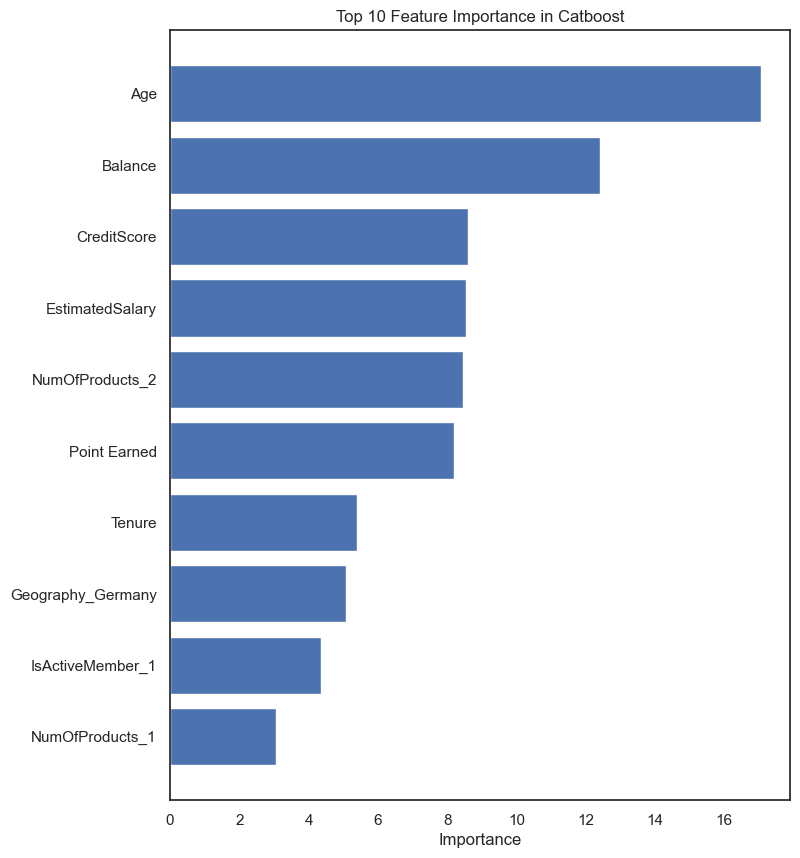

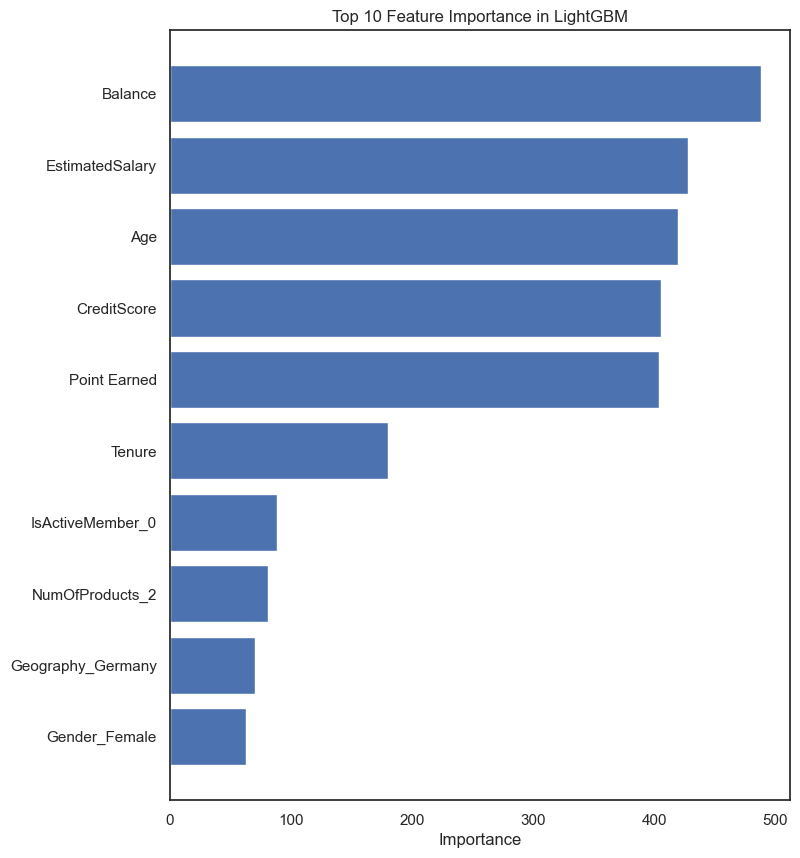

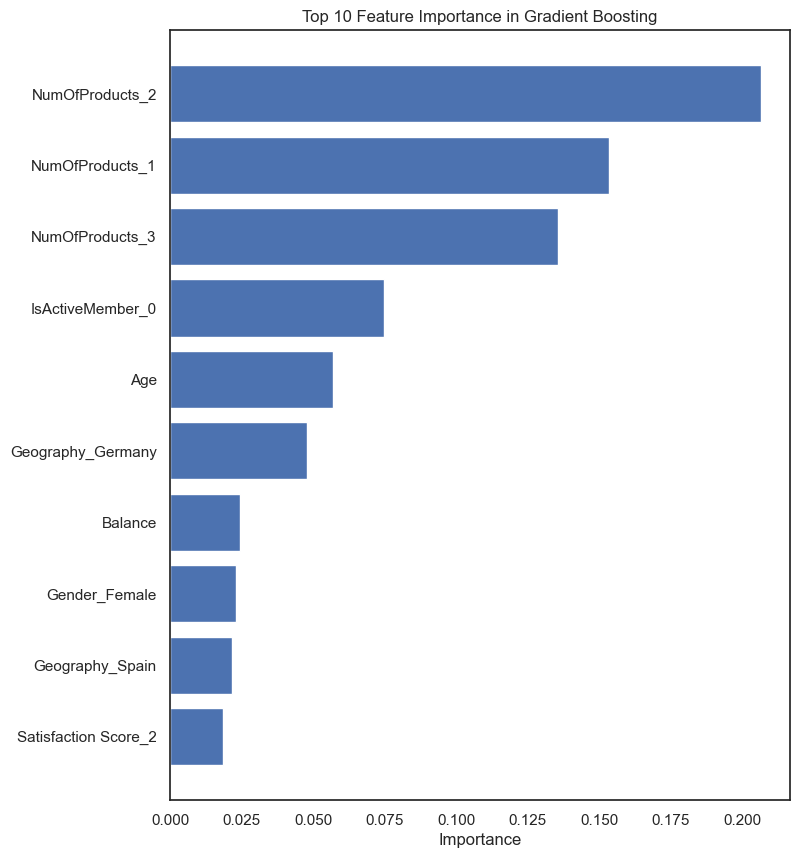

In [38]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.3 Credit Card Churn Dataset

##### 7.3.1 Credit Card Churn EDA

In [82]:
# Create a brief summary data table
credit_card_churn_df_summary = pd.DataFrame({
    "Unique Values" : credit_card_churn_df.nunique(),
    "Missing Values": credit_card_churn_df.isnull().sum(),
    'NaN Values': credit_card_churn_df.isna().sum(),
    'Duplicated' : credit_card_churn_df.duplicated().sum(),
    'Dtypes': credit_card_churn_df.dtypes
})

credit_card_churn_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  \
CLIENTNUM                         10127               0           0   
Months_Inactive_12_mon                7               0           0   
Total_Ct_Chng_Q4_Q1                 830               0           0   
Total_Trans_Ct                      126               0           0   
Total_Trans_Amt                    5033               0           0   
Total_Amt_Chng_Q4_Q1               1158               0           0   
Avg_Open_To_Buy                    6813               0           0   
Total_Revolving_Bal                1974               0           0   
Credit_Limit                       6205               0           0   
Contacts_Count_12_mon                 7               0           0   
Total_Relationship_Count              6               0           0   
Attrition_Flag                        2               0           0   
Months_on_book                       44               0           0   
Card_Category                         4               0           0   
Income_Category                       6               0           0   
Marital_Status                        4               0           0   
Education_Level                       7               0           0   
Dependent_count                       6               0           0   
Gender                                2               0           0   
Customer_Age                         45               0           0   
Avg_Utilization_Ratio               964               0           0   

                          Duplicated   Dtypes  
CLIENTNUM                          0    int64  
Months_Inactive_12_mon             0    int64  
Total_Ct_Chng_Q4_Q1                0  float64  
Total_Trans_Ct                     0    int64  
Total_Trans_Amt                    0    int64  
Total_Amt_Chng_Q4_Q1               0  float64  
Avg_Open_To_Buy                    0  float64  
Total_Revolving_Bal                0    int64  
Credit_Limit                       0  float64  
Contacts_Count_12_mon              0    int64  
Total_Relationship_Count           0    int64  
Attrition_Flag                     0   object  
Months_on_book                     0    int64  
Card_Category                      0   object  
Income_Category                    0   object  
Marital_Status                     0   object  
Education_Level                    0   object  
Dependent_count                    0    int64  
Gender                             0   object  
Customer_Age                       0    int64  
Avg_Utilization_Ratio              0  float64

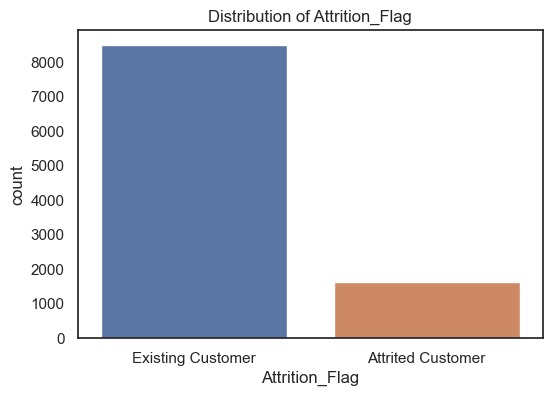

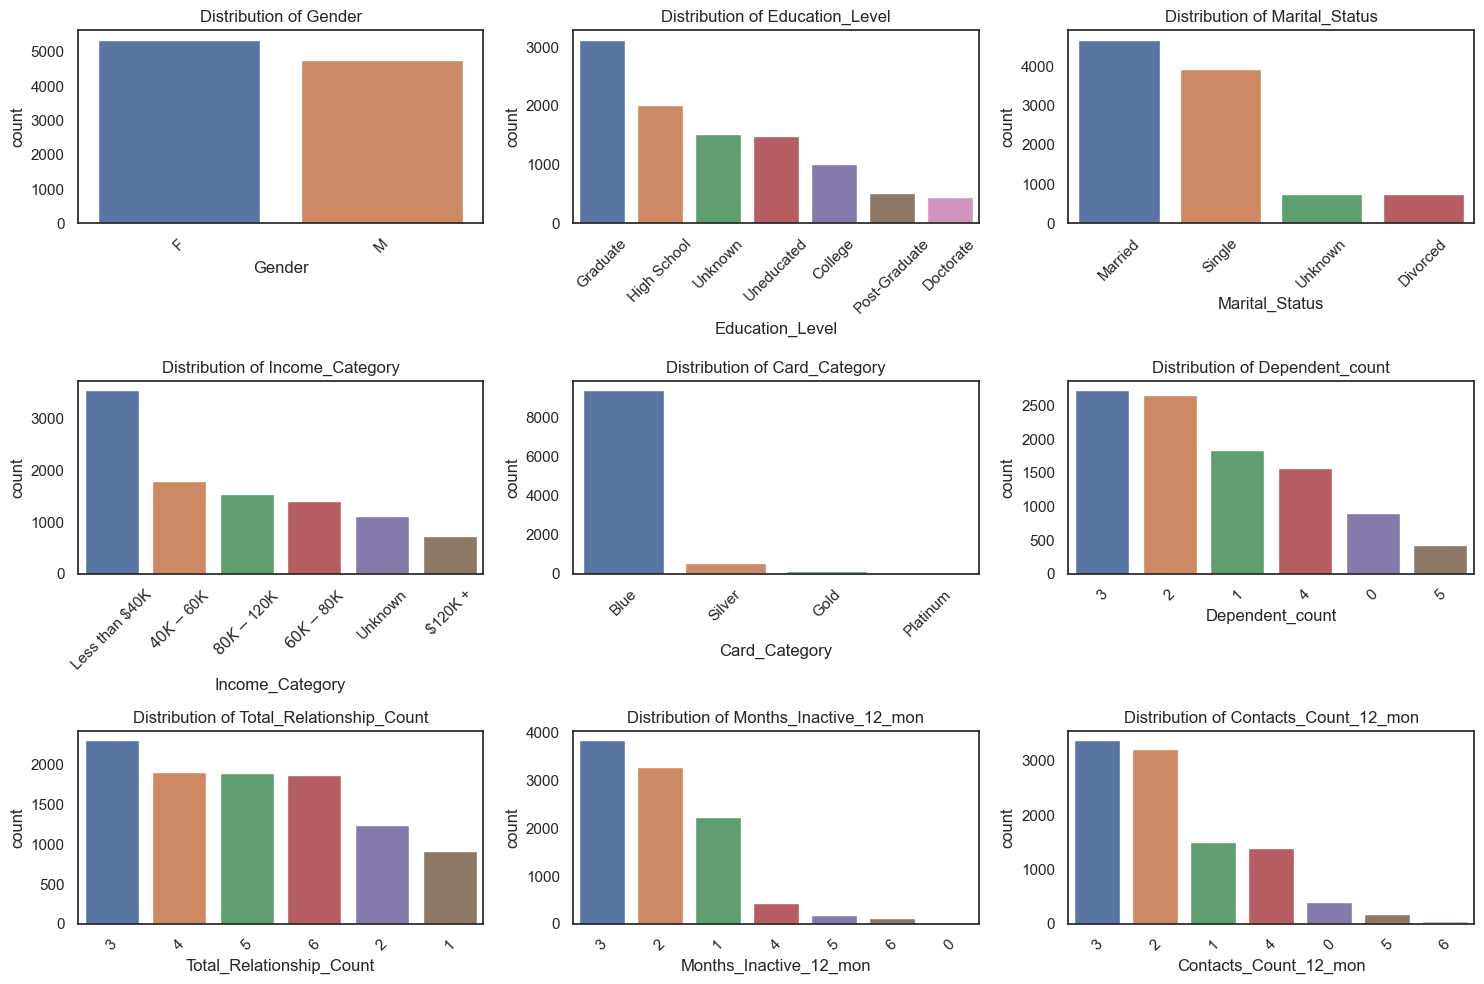

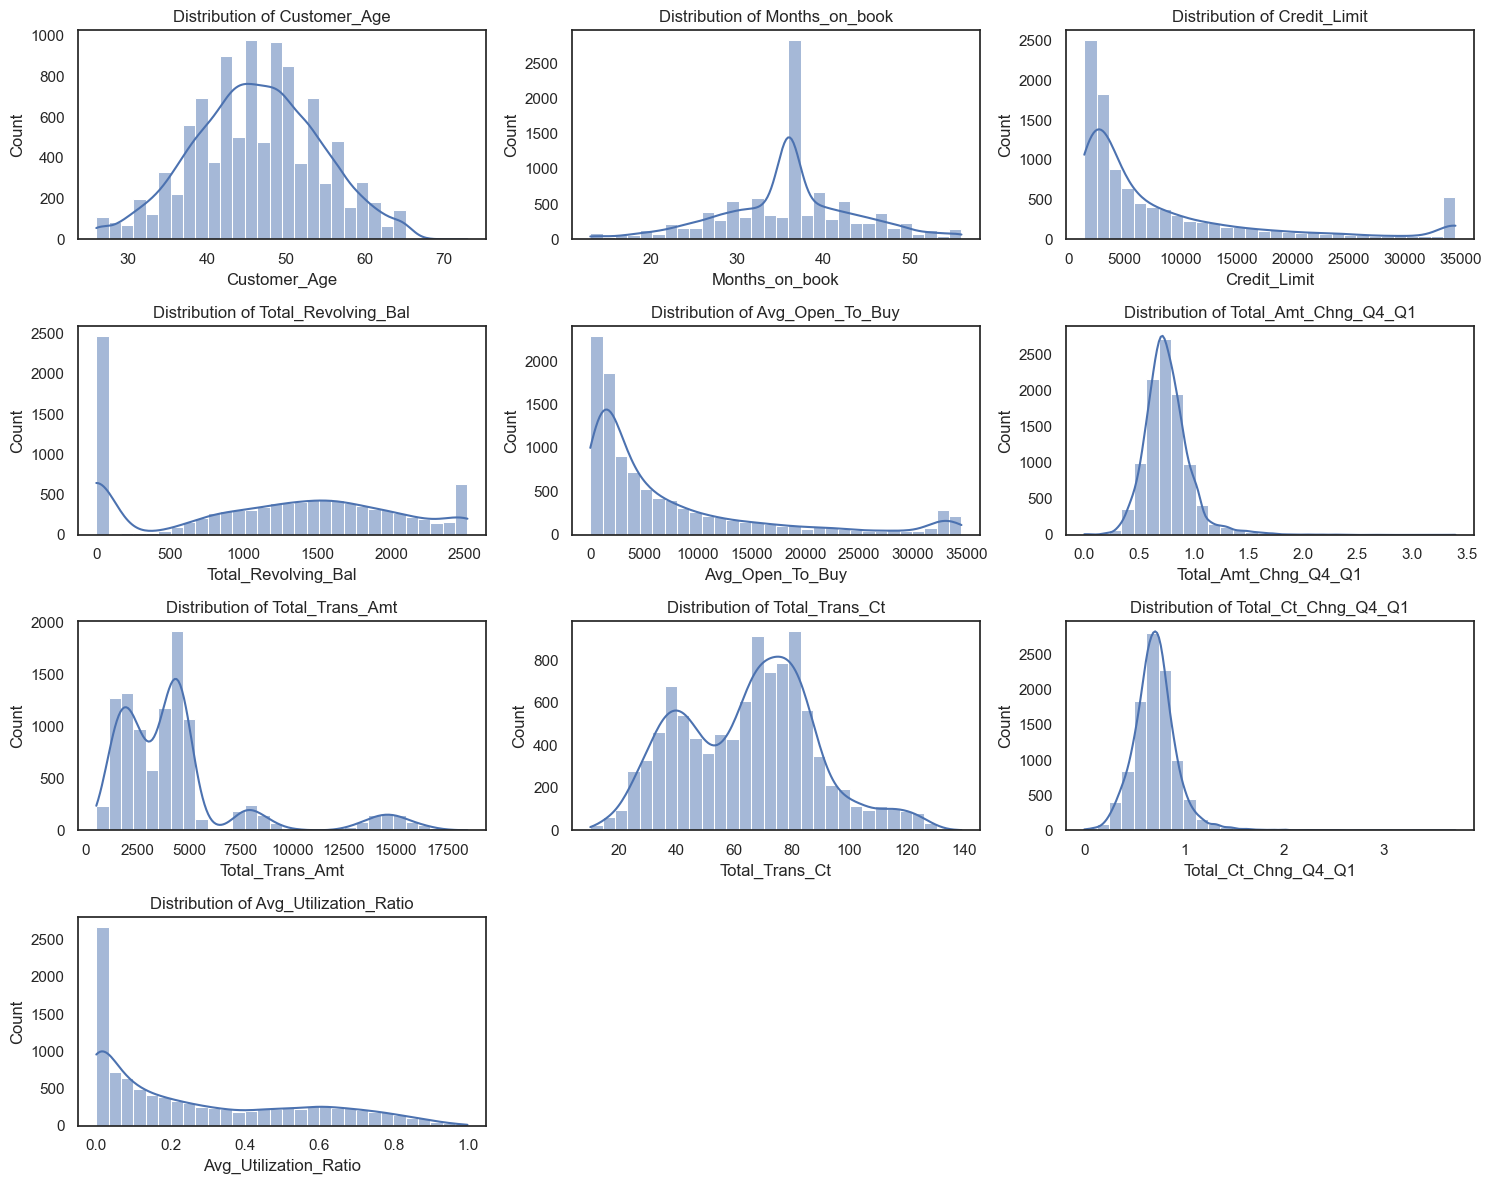

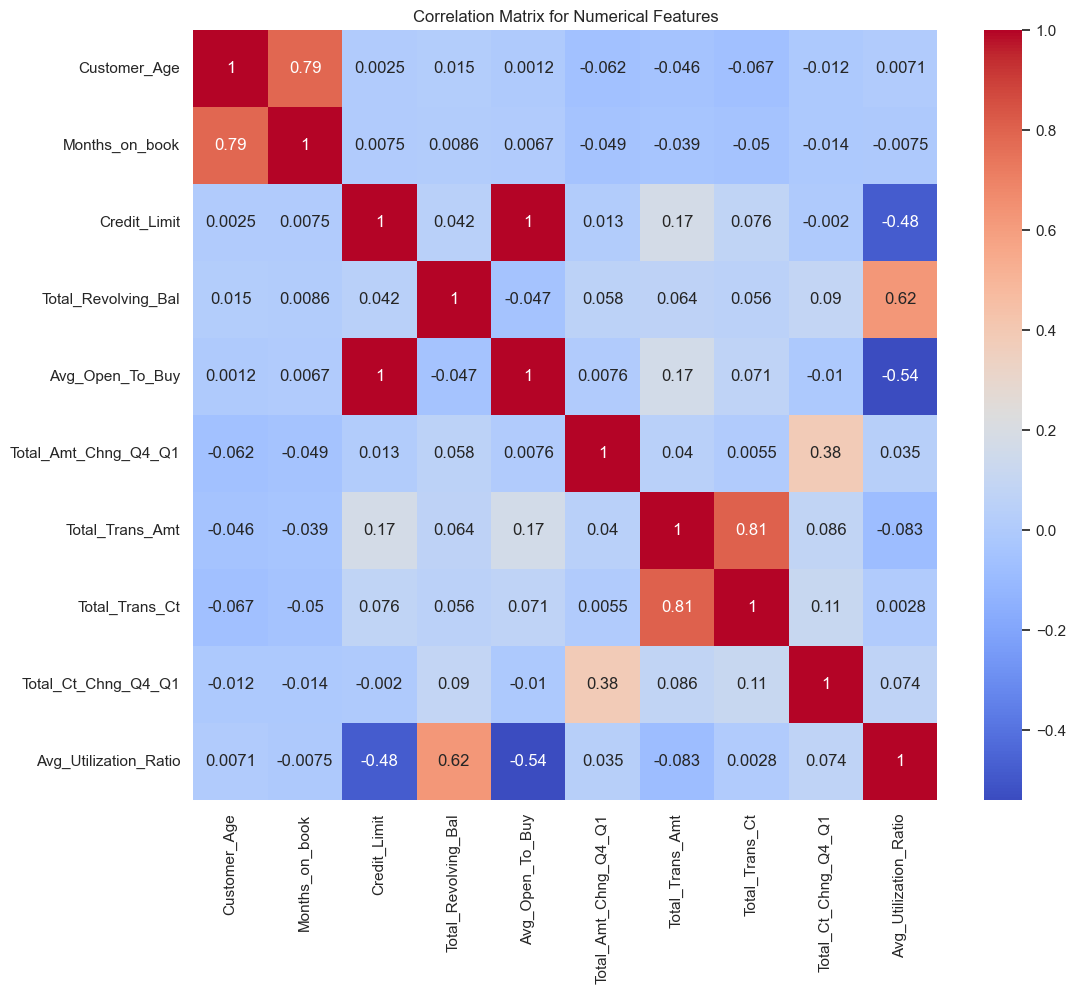

In [83]:
# Distribution of the target variable (Attrition_Flag)
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=credit_card_churn_df)
plt.title("Distribution of Attrition_Flag")
plt.show()

# Distribution of categorical features
cat_features_credit_card_churn = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
                                  'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                                  'Contacts_Count_12_mon']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_credit_card_churn):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, data=credit_card_churn_df, order=credit_card_churn_df[feature].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
num_features_credit_card_churn = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
                                  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                                  'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(num_features_credit_card_churn):
    plt.subplot(4, 3, i+1)
    sns.histplot(credit_card_churn_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(credit_card_churn_df[num_features_credit_card_churn].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


##### 7.3.2 Credit Card Churn Preprocessing

In [84]:
# Step 1: Remove non-informative columns and correct data types
credit_card_churn_df = credit_card_churn_df.drop(columns=['CLIENTNUM'])
for col in cat_features_credit_card_churn:
    credit_card_churn_df[col] = credit_card_churn_df[col].astype('category')
credit_card_churn_df['Attrition_Flag'] = credit_card_churn_df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})


# Step 2: Create target and  independent features 
X = credit_card_churn_df.drop(columns=['Attrition_Flag'])
y = credit_card_churn_df['Attrition_Flag']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
0      0.455655        0.259247      0.119960             0.822017   
1     -0.167603        0.010025     -0.579143            -0.541524   
2     -0.167603        0.010025     -0.709364            -1.433779   
3      1.328216        1.131526     -0.760315            -1.205499   
4      0.829610       -0.114587      0.984929            -0.702302   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0         0.046716             -0.451103        -0.635137       -1.017717   
1        -0.530754             -0.815372        -0.080107        0.777877   
2        -0.581473             -0.675960        -0.075072        0.863381   
3        -0.652741             -0.023875        -0.499489       -1.274230   
4         1.047206             -0.302698         2.966928        0.777877   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  ...  Months_Inactive_12_mon_4  \
0            -0.308458              -0.321150  ...                       0.0   
1             0.064136              -0.227011  ...                       0.0   
2             0.239967              -0.998226  ...                       0.0   
3            -0.802459              -0.614429  ...                       1.0   
4             0.545578              -0.875121  ...                       0.0   

   Months_Inactive_12_mon_5  Months_Inactive_12_mon_6  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Contacts_Count_12_mon_0  Contacts_Count_12_mon_1  Contacts_Count_12_mon_2  \
0                      1.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      1.0   
3                      0.0                      0.0                      1.0   
4                      0.0                      0.0                      0.0   

   Contacts_Count_12_mon_3  Contacts_Count_12_mon_4  Contacts_Count_12_mon_5  \
0                      0.0                      0.0                      0.0   
1                      1.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      1.0                      0.0                      0.0   

   Contacts_Count_12_mon_6  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 59 columns]

##### 7.3.3 Credit Card Churn Predictive Models

In [85]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Lightgbm                 0.97       0.94    0.90  0.92     0.99
XGboost                  0.97       0.93    0.90  0.91     0.99
Catboost                 0.97       0.94    0.89  0.91     0.99
Gradient Boosting        0.96       0.93    0.84  0.88     0.99
AdaBoost                 0.96       0.89    0.84  0.86     0.98
Random Forest            0.94       0.92    0.71  0.80     0.98
Bagging                  0.95       0.89    0.81  0.85     0.97
SVC                      0.94       0.88    0.69  0.78     0.97
MLP                      0.93       0.81    0.76  0.78     0.97
Logistic Regression      0.91       0.78    0.62  0.69     0.93
KNeighbors               0.90       0.78    0.52  0.62     0.89
Decision Tree            0.94       0.79    0.81  0.80     0.88
GaussianNB               0.84       0.56    0.11  0.19     0.85


In [86]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
XGboost                  0.97       0.93    0.90  0.91     0.99
Catboost                 0.97       0.94    0.88  0.91     0.99
Lightgbm                 0.97       0.93    0.88  0.91     0.99
Gradient Boosting        0.96       0.93    0.84  0.88     0.99
AdaBoost                 0.96       0.90    0.82  0.86     0.98
Random Forest            0.95       0.89    0.77  0.83     0.98
Bagging                  0.95       0.88    0.83  0.86     0.97
MLP                      0.93       0.82    0.71  0.76     0.97
Logistic Regression      0.91       0.77    0.65  0.70     0.93
Decision Tree            0.94       0.79    0.82  0.80     0.89
KNeighbors               0.91       0.79    0.57  0.66     0.89
GaussianNB               0.84       0.54    0.14  0.22     0.85
SVC                      0.93       0.85    0.70  0.77      NaN


  Model  Accuracy  Precision  Recall  F1 Score
0   cat      0.97       0.94    0.88      0.91
1  lgbm      0.97       0.93    0.88      0.91
2   xgb      0.97       0.93    0.90      0.91


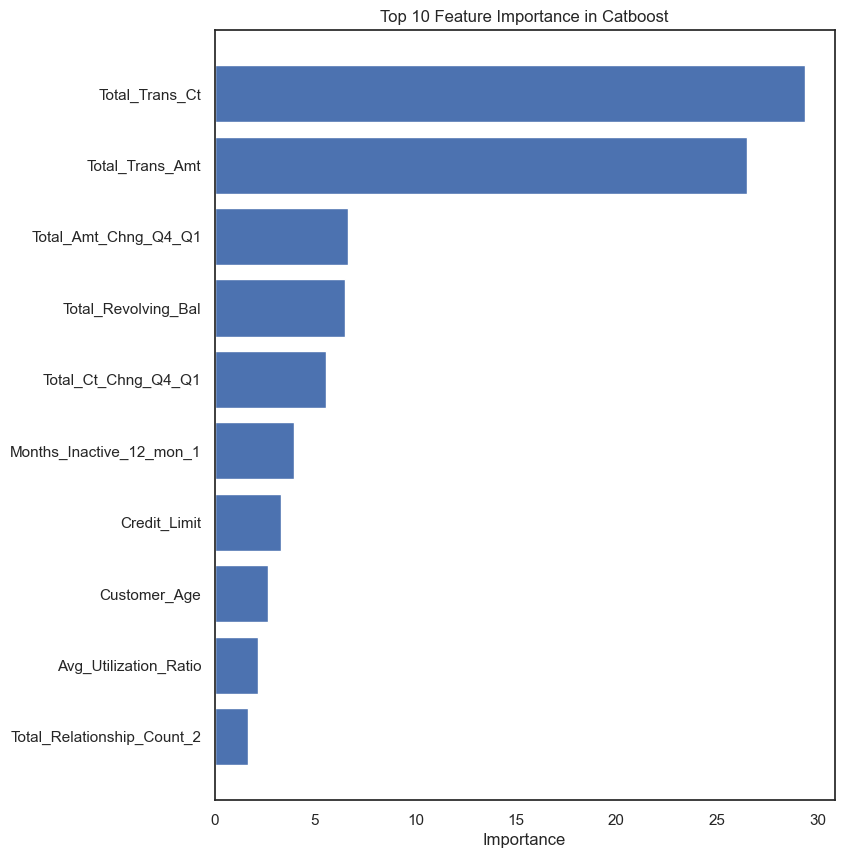

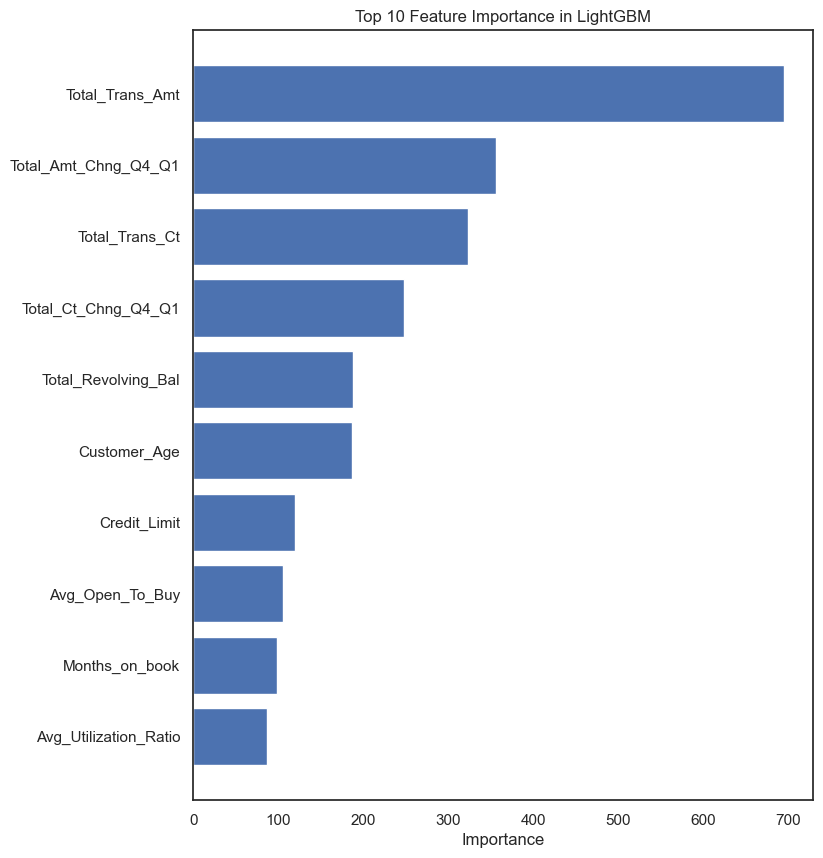

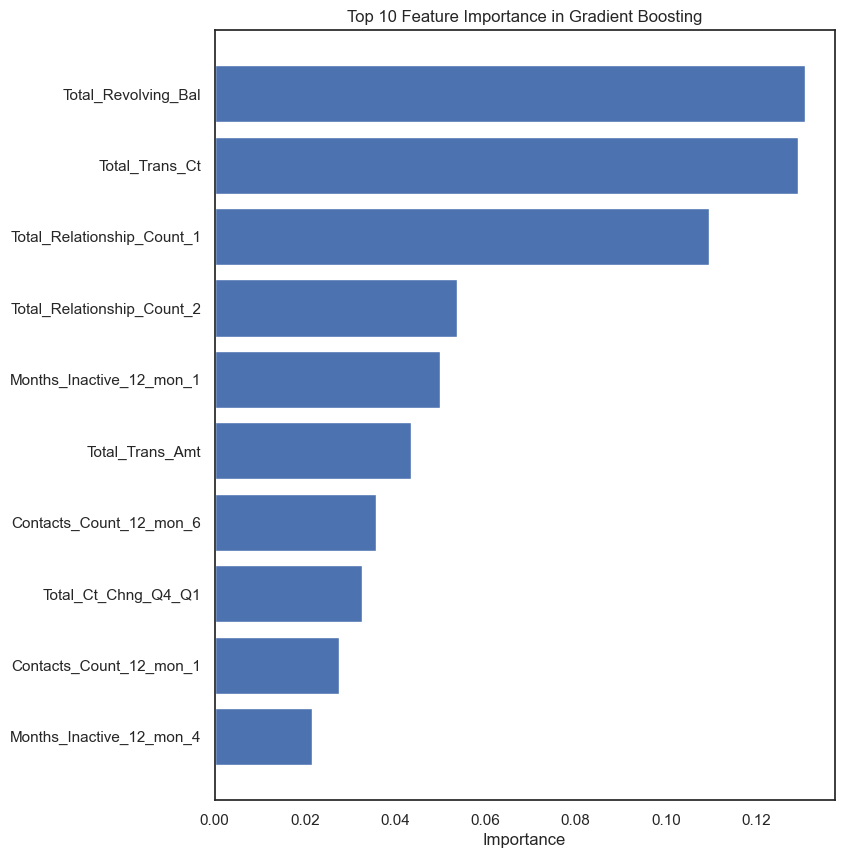

In [87]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.4 E-commerce Churn Dataset

##### 7.4.1 E-commerce Churn EDA

In [88]:
ecommerce_churn_df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [89]:
# Create a brief summary data table
ecommerce_churn_df_summary = pd.DataFrame({
    "Unique Values" : ecommerce_churn_df.nunique(),
    "Missing Values": ecommerce_churn_df.isnull().sum(),
    'NaN Values': ecommerce_churn_df.isna().sum(),
    'Duplicated' : ecommerce_churn_df.duplicated().sum(),
    'Dtypes': ecommerce_churn_df.dtypes
})

ecommerce_churn_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  \
DaySinceLastOrder                       22             307         307   
OrderAmountHikeFromlastYear             16             265         265   
Tenure                                  36             264         264   
OrderCount                              16             258         258   
CouponUsed                              17             256         256   
HourSpendOnApp                           6             255         255   
WarehouseToHome                         34             251         251   
CustomerID                            5630               0           0   
MaritalStatus                            3               0           0   
Complain                                 2               0           0   
NumberOfAddress                         15               0           0   
PreferedOrderCat                         6               0           0   
SatisfactionScore                        5               0           0   
Churn                                    2               0           0   
NumberOfDeviceRegistered                 6               0           0   
Gender                                   2               0           0   
PreferredPaymentMode                     7               0           0   
CityTier                                 3               0           0   
PreferredLoginDevice                     3               0           0   
CashbackAmount                        2586               0           0   

                             Duplicated   Dtypes  
DaySinceLastOrder                     0  float64  
OrderAmountHikeFromlastYear           0  float64  
Tenure                                0  float64  
OrderCount                            0  float64  
CouponUsed                            0  float64  
HourSpendOnApp                        0  float64  
WarehouseToHome                       0  float64  
CustomerID                            0    int64  
MaritalStatus                         0   object  
Complain                              0    int64  
NumberOfAddress                       0    int64  
PreferedOrderCat                      0   object  
SatisfactionScore                     0    int64  
Churn                                 0    int64  
NumberOfDeviceRegistered              0    int64  
Gender                                0   object  
PreferredPaymentMode                  0   object  
CityTier                              0    int64  
PreferredLoginDevice                  0   object  
CashbackAmount                        0  float64

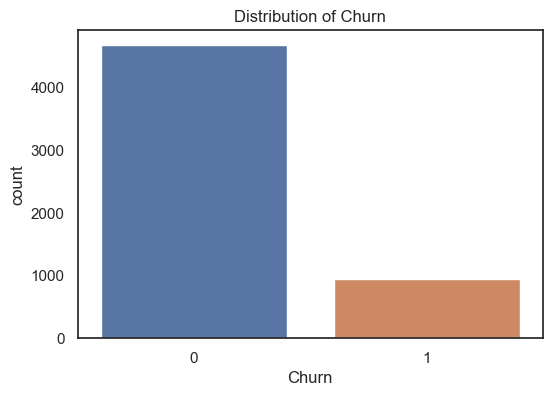

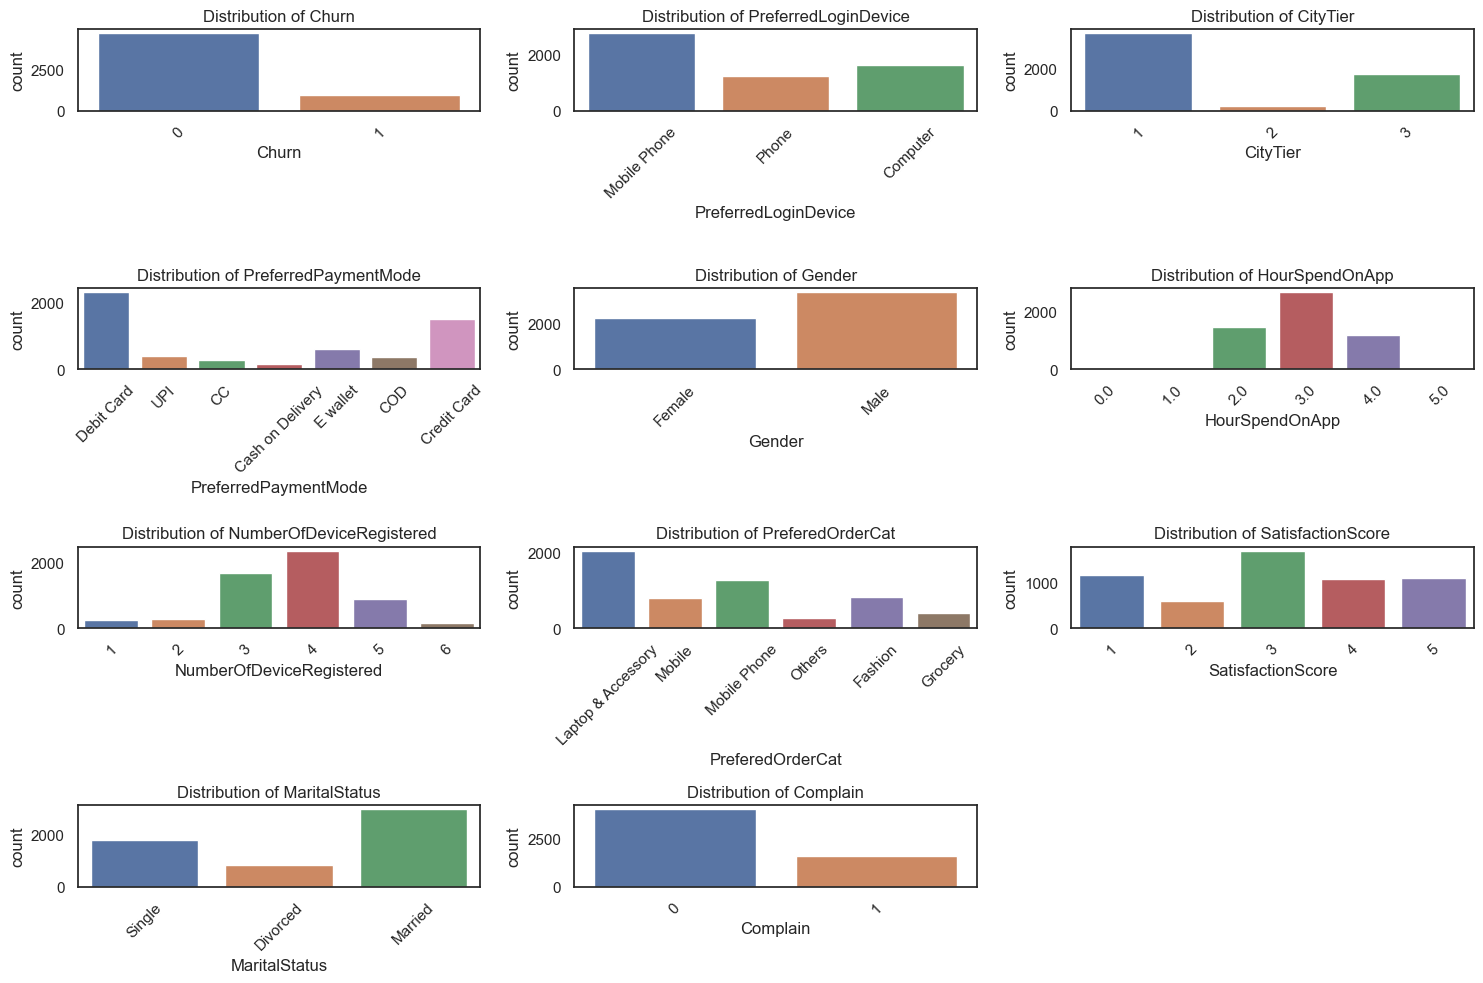

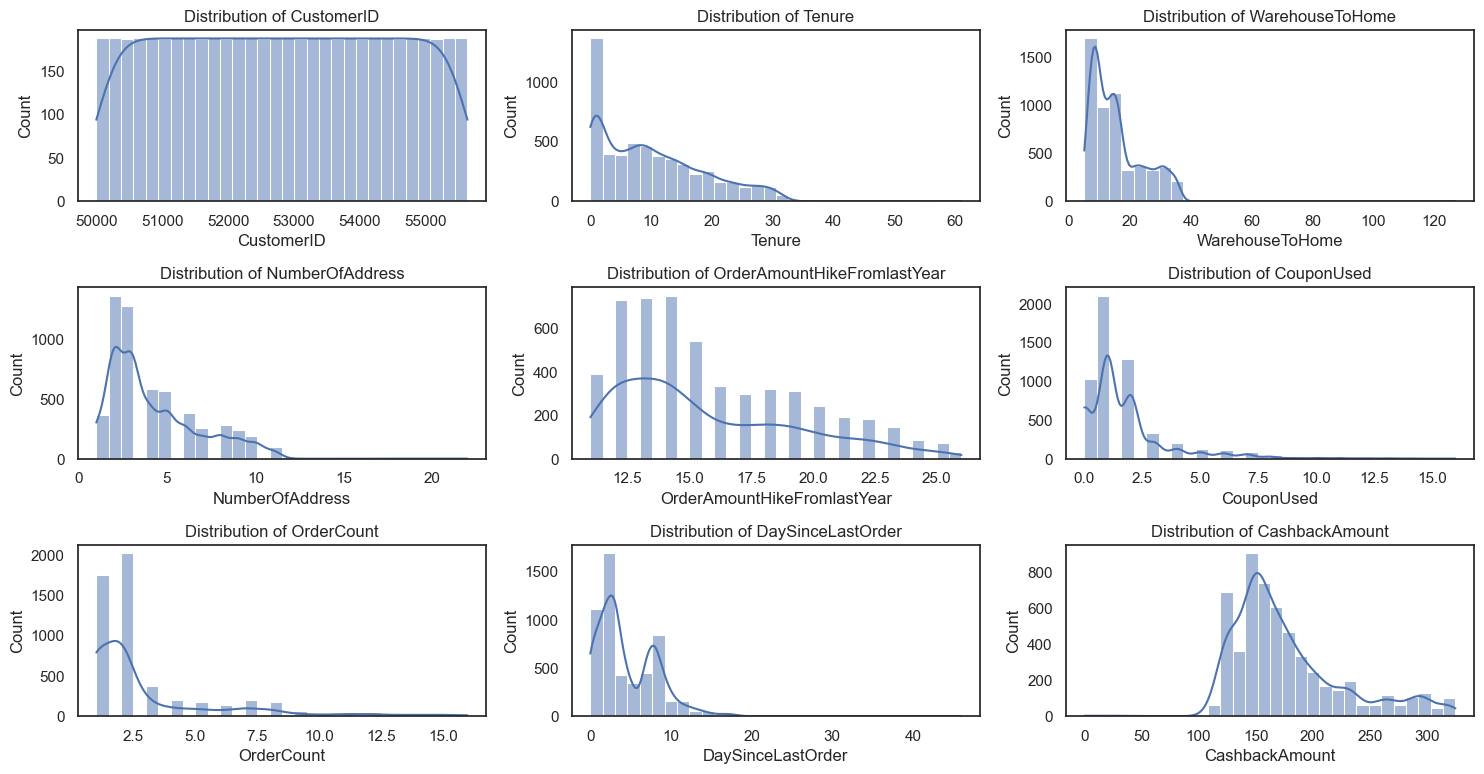

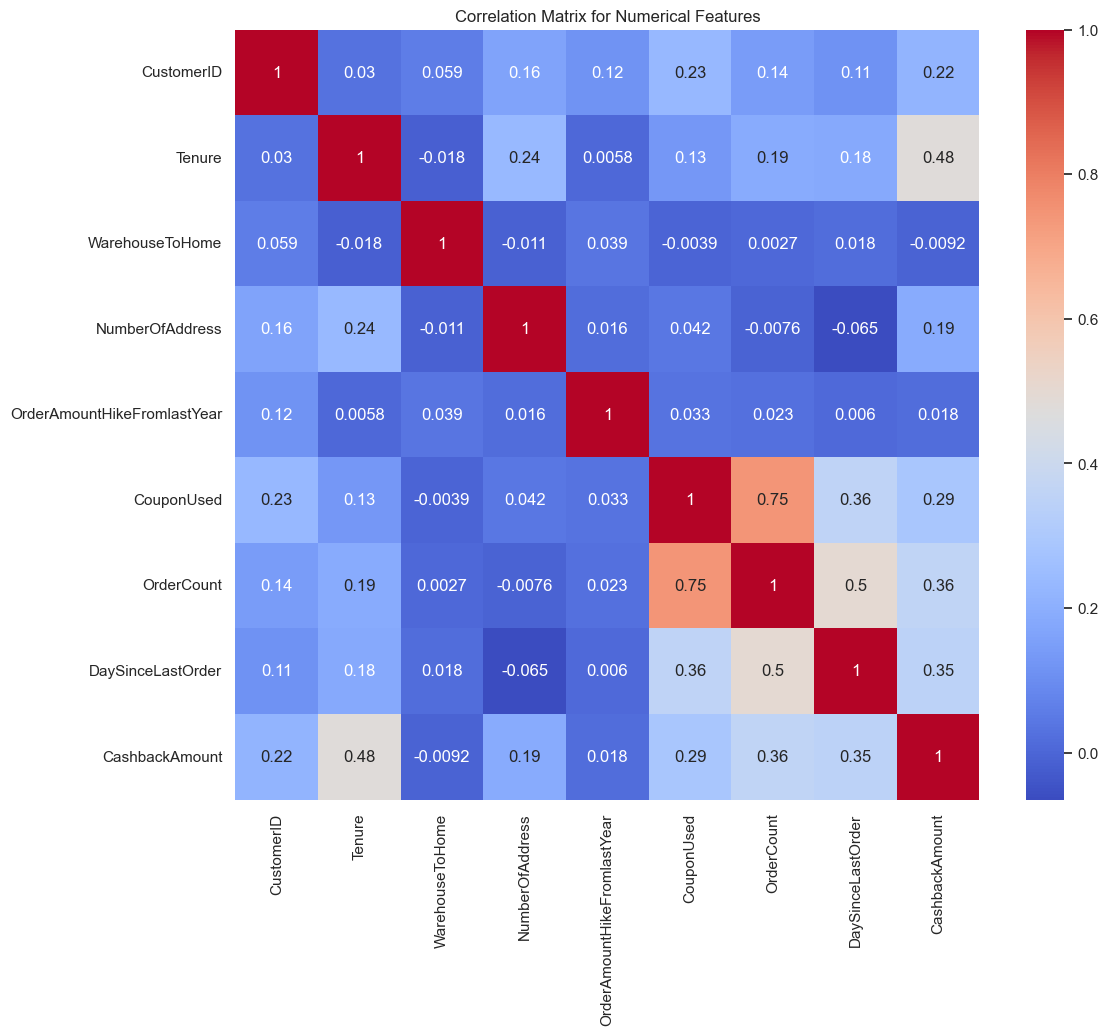

In [90]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=ecommerce_churn_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features_ecommerce = [col for col in ecommerce_churn_df.columns if ecommerce_churn_df[col].nunique() < 10]
num_features_ecommerce = [col for col in ecommerce_churn_df.columns if col not in cat_features_ecommerce + ['Churn']]

# Distribution of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_ecommerce):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=feature, data=ecommerce_churn_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features_ecommerce):
    plt.subplot(4, 3, i+1)
    sns.histplot(ecommerce_churn_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(ecommerce_churn_df[num_features_ecommerce].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


##### 7.4.2 E-commerce Churn Preprocessing

In [91]:
# Step 1: Remove non-informative columns and correct data types
ecommerce_churn_df = ecommerce_churn_df.drop(columns=['CustomerID'])
for col in cat_features_ecommerce:
    ecommerce_churn_df[col] = ecommerce_churn_df[col].astype('category')


# Step 2: Create target and  independent features 
X = ecommerce_churn_df.drop(columns=['Churn'])
y = ecommerce_churn_df['Churn']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

Tenure  WarehouseToHome  NumberOfAddress  OrderAmountHikeFromlastYear  \
0  0.443223         0.156989        -0.082693                    -0.749615   
1  0.683779        -0.790458        -0.082693                    -0.189902   
2 -1.120393        -0.790458         1.467270                    -0.189902   
3 -1.000115        -0.908889        -0.082693                    -1.029471   
4 -0.639281        -0.316735        -0.857674                    -0.469758   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  \
0   -0.411366   -0.353928      -2.505445e-16        0.906302   
1    1.722544    3.832740      -2.505445e-16        0.991768   
2   -0.411366   -0.353928      -4.397088e-01       -0.656768   
3    0.122112   -0.353928      -4.397088e-01       -0.649017   
4    0.655589    0.343850       9.707315e-01       -0.464622   

   PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone  ...  \
0                            0.0                                1.0  ...   
1                            1.0                                0.0  ...   
2                            1.0                                0.0  ...   
3                            0.0                                0.0  ...   
4                            0.0                                1.0  ...   

   SatisfactionScore_1  SatisfactionScore_2  SatisfactionScore_3  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  1.0   

   SatisfactionScore_4  SatisfactionScore_5  MaritalStatus_Divorced  \
0                  1.0                  0.0                     0.0   
1                  0.0                  0.0                     0.0   
2                  0.0                  1.0                     0.0   
3                  0.0                  1.0                     0.0   
4                  0.0                  0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  Complain_0  Complain_1  
0                    1.0                   0.0         1.0         0.0  
1                    1.0                   0.0         0.0         1.0  
2                    1.0                   0.0         0.0         1.0  
3                    0.0                   1.0         1.0         0.0  
4                    1.0                   0.0         1.0         0.0  

[5 rows x 51 columns]

##### 7.4.3 E-commerce Churn Predictive Models

In [92]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
XGboost                  0.96       0.91    0.83  0.87     0.98
Lightgbm                 0.95       0.90    0.81  0.85     0.98
Random Forest            0.95       0.94    0.74  0.83     0.98
Catboost                 0.94       0.90    0.75  0.82     0.98
Bagging                  0.94       0.89    0.72  0.80     0.96
MLP                      0.93       0.84    0.75  0.79     0.96
Gradient Boosting        0.91       0.82    0.60  0.69     0.94
KNeighbors               0.89       0.82    0.48  0.60     0.92
AdaBoost                 0.90       0.74    0.58  0.65     0.91
SVC                      0.90       0.85    0.51  0.64     0.91
Decision Tree            0.93       0.80    0.82  0.81     0.89
Logistic Regression      0.89       0.76    0.51  0.61     0.88
GaussianNB               0.27       0.18    0.98  0.31     0.79


In [93]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
XGboost                  0.97       0.92    0.92  0.92     0.99
Lightgbm                 0.97       0.93    0.86  0.90     0.99
Random Forest            0.96       0.96    0.81  0.88     0.99
Catboost                 0.96       0.93    0.84  0.88     0.99
Bagging                  0.96       0.92    0.86  0.89     0.98
MLP                      0.95       0.86    0.85  0.85     0.98
Decision Tree            0.96       0.85    0.91  0.88     0.94
Gradient Boosting        0.91       0.81    0.62  0.70     0.94
AdaBoost                 0.90       0.75    0.63  0.69     0.93
KNeighbors               0.90       0.87    0.49  0.63     0.93
Logistic Regression      0.90       0.78    0.55  0.65     0.90
GaussianNB               0.27       0.18    0.98  0.31     0.80
SVC                      0.91       0.87    0.56  0.68      NaN


  Model  Accuracy  Precision  Recall  F1 Score
2   xgb      0.97       0.92    0.92      0.92
1  lgbm      0.97       0.93    0.86      0.90
0   cat      0.96       0.93    0.84      0.88


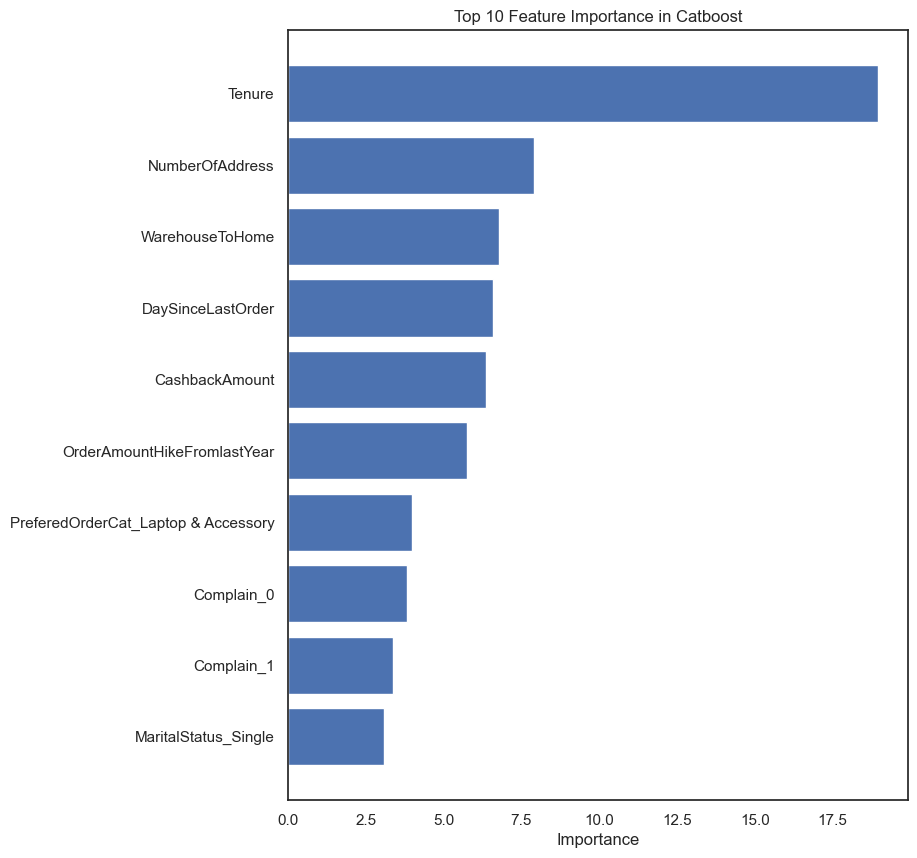

In [94]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.5 Employee Churn Dataset

##### 7.5.1 Employee Churn EDA

In [95]:
# Create a brief summary data table
employee_churn_df_summary = pd.DataFrame({
    "Unique Values" : employee_churn_df.nunique(),
    "Missing Values": employee_churn_df.isnull().sum(),
    'NaN Values': employee_churn_df.isna().sum(),
    'Duplicated' : employee_churn_df.duplicated().sum(),
    'Dtypes': employee_churn_df.dtypes
})

employee_churn_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  \
Age                                  43               0           0   
StandardHours                         1               0           0   
NumCompaniesWorked                   10               0           0   
Over18                                1               0           0   
OverTime                              2               0           0   
PercentSalaryHike                    15               0           0   
PerformanceRating                     2               0           0   
RelationshipSatisfaction              4               0           0   
StockOptionLevel                      4               0           0   
MonthlyIncome                      1349               0           0   
TotalWorkingYears                    40               0           0   
TrainingTimesLastYear                 7               0           0   
WorkLifeBalance                       4               0           0   
YearsAtCompany                       37               0           0   
YearsInCurrentRole                   19               0           0   
YearsSinceLastPromotion              16               0           0   
MonthlyRate                        1427               0           0   
MaritalStatus                         3               0           0   
Attrition                             2               0           0   
EmployeeCount                         1               0           0   
BusinessTravel                        3               0           0   
DailyRate                           886               0           0   
Department                            3               0           0   
DistanceFromHome                     29               0           0   
Education                             5               0           0   
EducationField                        6               0           0   
EmployeeNumber                     1470               0           0   
JobSatisfaction                       4               0           0   
EnvironmentSatisfaction               4               0           0   
Gender                                2               0           0   
HourlyRate                           71               0           0   
JobInvolvement                        4               0           0   
JobLevel                              5               0           0   
JobRole                               9               0           0   
YearsWithCurrManager                 18               0           0   

                          Duplicated  Dtypes  
Age                                0   int64  
StandardHours                      0   int64  
NumCompaniesWorked                 0   int64  
Over18                             0  object  
OverTime                           0  object  
PercentSalaryHike                  0   int64  
PerformanceRating                  0   int64  
RelationshipSatisfaction           0   int64  
StockOptionLevel                   0   int64  
MonthlyIncome                      0   int64  
TotalWorkingYears                  0   int64  
TrainingTimesLastYear              0   int64  
WorkLifeBalance                    0   int64  
YearsAtCompany                     0   int64  
YearsInCurrentRole                 0   int64  
YearsSinceLastPromotion            0   int64  
MonthlyRate                        0   int64  
MaritalStatus                      0  object  
Attrition                          0  object  
EmployeeCount                      0   int64  
BusinessTravel                     0  object  
DailyRate                          0   int64  
Department                         0  object  
DistanceFromHome                   0   int64  
Education                          0   int64  
EducationField                     0  object  
EmployeeNumber                     0   int64  
JobSatisfaction                    0   int64  
EnvironmentSatisfaction            0   int64  
Gender                             0  object  
HourlyRate  

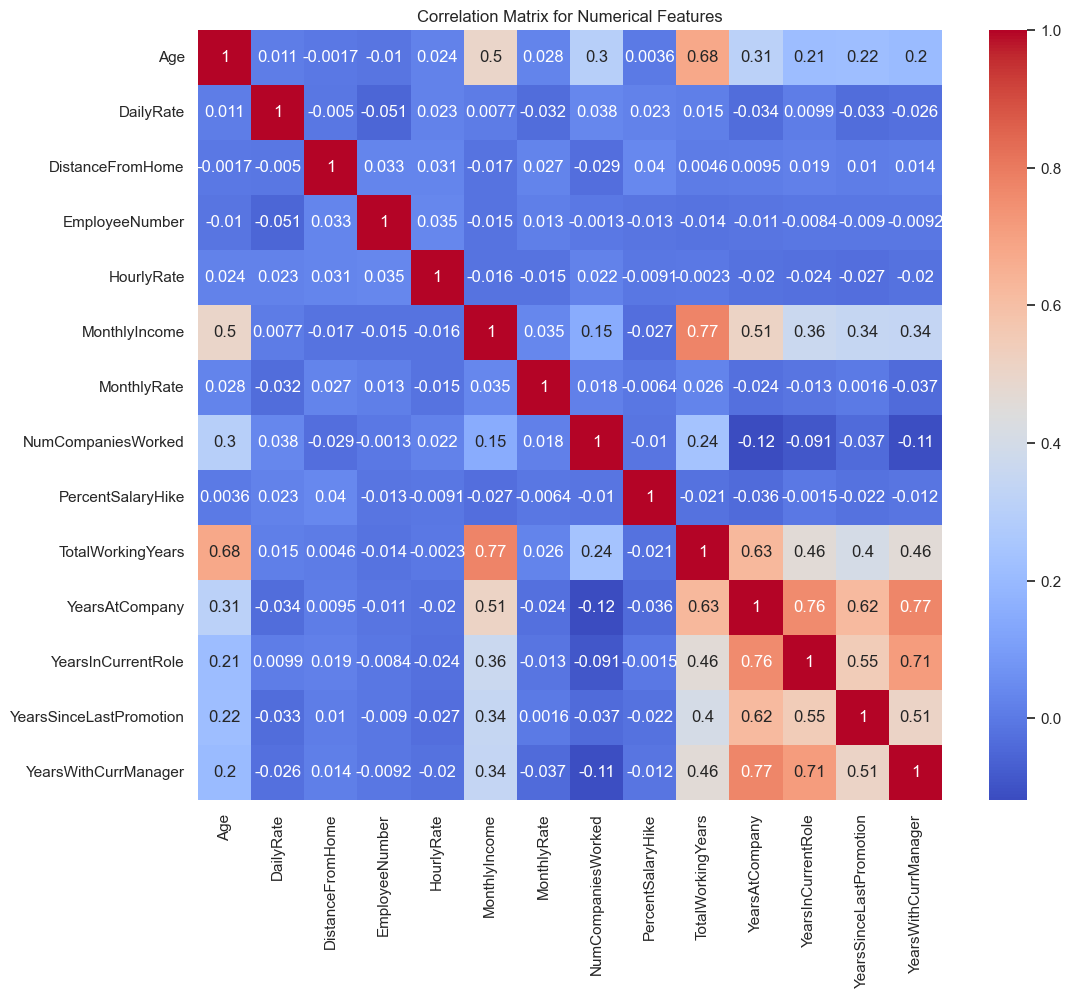

In [96]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=employee_churn_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features_employee = [col for col in employee_churn_df.columns if employee_churn_df[col].nunique() < 10]
num_features_employee = [col for col in employee_churn_df.columns if col not in cat_features_employee + ['Attrition']]

# Distribution of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_employee):
    plt.subplot(4, 6, i+1)
    sns.countplot(x=feature, data=employee_churn_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features_employee):
    plt.subplot(4, 4, i+1)
    sns.histplot(employee_churn_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(employee_churn_df[num_features_employee].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


##### 7.5.2 Employee Churn Preprocessing

In [97]:
# Step 1: Remove non-informative columns and correct data types
for col in cat_features_employee:
    employee_churn_df[col] = employee_churn_df[col].astype('category')
    
employee_churn_df = employee_churn_df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])
employee_churn_df['Attrition'] = employee_churn_df['Attrition'].map({'No':0, 'Yes':1})


# Step 2: Create target and  independent features 
X = employee_churn_df.drop(columns=['Attrition'])
y = employee_churn_df['Attrition']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.452946  -1.342330         -0.413086   -0.335861      -0.379162   
1  1.337175   0.481668          1.048297    1.297889       0.071322   
2  2.331932  -1.285562         -0.900214   -1.722073       2.762119   
3 -1.536568   1.239405          2.022552    0.852321      -0.772120   
4 -0.873396  -0.002099         -1.021996    0.505768      -0.811913   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0    -1.556840           -0.286498          -0.602633           1.150606   
1     1.337564           -0.682138          -0.048291          -0.559842   
2     1.613088            1.691702          -0.879803           3.782065   
3     0.259408           -0.682138          -0.879803          -0.954560   
4     0.660794           -0.682138           0.783221          -0.165123   

   YearsAtCompany  ...  TrainingTimesLastYear_1  TrainingTimesLastYear_2  \
0        1.812765  ...                      0.0                      0.0   
1       -0.000299  ...                      0.0                      0.0   
2        3.955477  ...                      0.0                      1.0   
3       -0.494771  ...                      0.0                      1.0   
4        0.494173  ...                      0.0                      0.0   

   TrainingTimesLastYear_3  TrainingTimesLastYear_4  TrainingTimesLastYear_5  \
0                      1.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      1.0   

   TrainingTimesLastYear_6  WorkLifeBalance_1  WorkLifeBalance_2  \
0                      0.0                0.0                0.0   
1                      0.0                0.0                0.0   
2                      0.0                0.0                0.0   
3                      0.0                0.0                1.0   
4                      0.0                0.0                0.0   

   WorkLifeBalance_3  WorkLifeBalance_4  
0                1.0                0.0  
1                1.0                0.0  
2                1.0                0.0  
3                0.0                0.0  
4                1.0                0.0  

[5 rows x 84 columns]

##### 7.5.3 Employee Churn Predictive Models

In [98]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Logistic Regression      0.87       0.69    0.40  0.50     0.83
SVC                      0.86       0.86    0.15  0.25     0.82
Random Forest            0.86       0.84    0.15  0.26     0.81
MLP                      0.85       0.57    0.39  0.46     0.80
AdaBoost                 0.86       0.66    0.35  0.45     0.80
Gradient Boosting        0.86       0.66    0.26  0.37     0.80
Lightgbm                 0.85       0.62    0.26  0.37     0.80
Catboost                 0.86       0.78    0.21  0.33     0.80
XGboost                  0.86       0.64    0.26  0.37     0.78
Bagging                  0.85       0.58    0.25  0.35     0.75
GaussianNB               0.64       0.27    0.69  0.39     0.73
Decision Tree            0.80       0.39    0.42  0.40     0.64
KNeighbors               0.83       0.44    0.08  0.14     0.62


In [99]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Logistic Regression      0.90       0.78    0.49  0.60     0.90
MLP                      0.90       0.81    0.49  0.61     0.89
AdaBoost                 0.88       0.77    0.39  0.52     0.86
Catboost                 0.87       0.87    0.22  0.35     0.86
Gradient Boosting        0.87       0.86    0.20  0.33     0.85
GaussianNB               0.70       0.32    0.83  0.47     0.84
Lightgbm                 0.87       0.76    0.27  0.40     0.84
XGboost                  0.86       0.67    0.31  0.42     0.83
Random Forest            0.86       0.90    0.15  0.26     0.83
Bagging                  0.85       0.60    0.20  0.30     0.77
KNeighbors               0.86       0.80    0.14  0.23     0.68
Decision Tree            0.79       0.34    0.31  0.32     0.60
SVC                      0.87       1.00    0.20  0.34      NaN


  Model  Accuracy  Precision  Recall  F1 Score
2   xgb      0.86       0.67    0.31      0.42
1  lgbm      0.87       0.76    0.27      0.40
0   cat      0.87       0.87    0.22      0.35


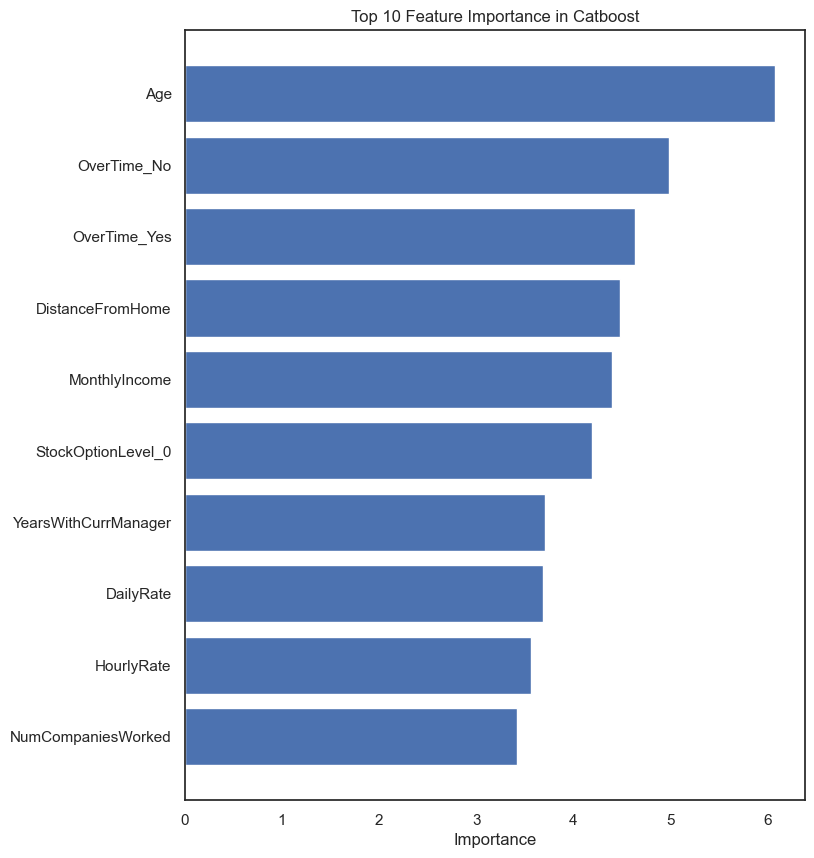

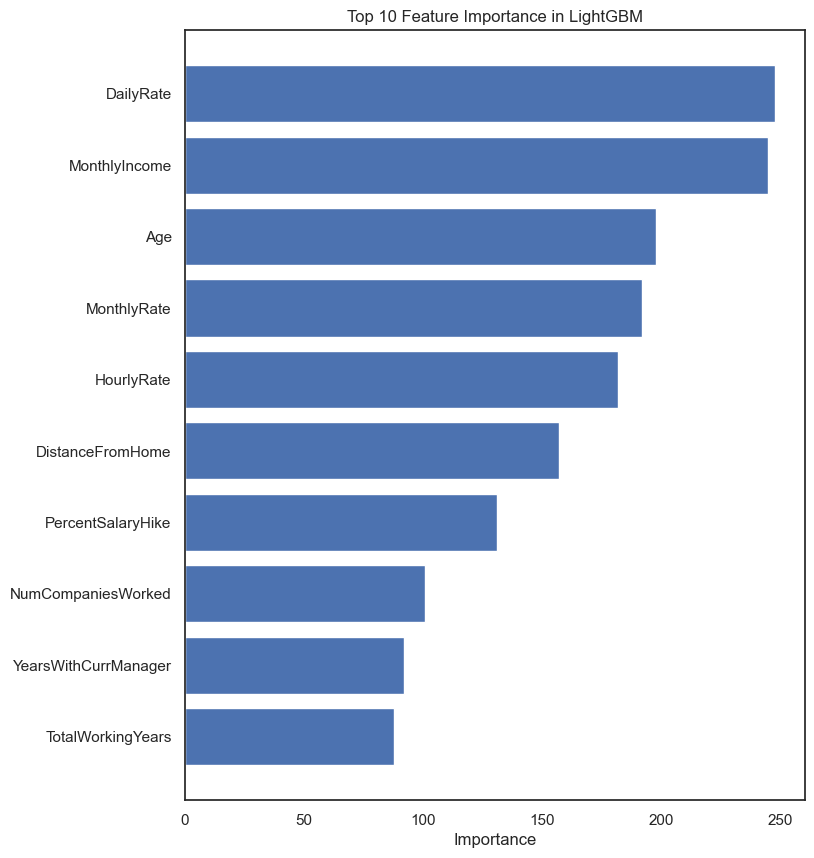

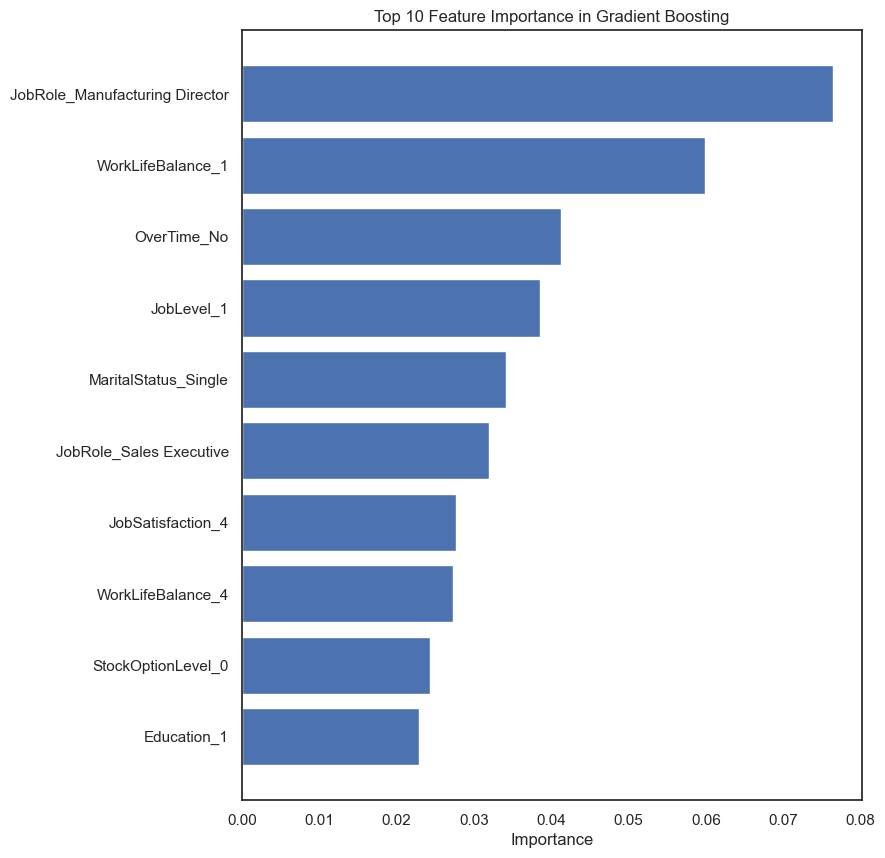

In [100]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.6 Telco Europa Churn Dataset

##### 7.6.1 Telco Europa Churn EDA

In [101]:
# Create a brief summary data table
telco_europa_df_summary = pd.DataFrame({
    "Unique Values" : telco_europa_df.nunique(),
    "Missing Values": telco_europa_df.isnull().sum(),
    'NaN Values': telco_europa_df.isna().sum(),
    'Duplicated' : telco_europa_df.duplicated().sum(),
    'Dtypes': telco_europa_df.dtypes
})

telco_europa_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  Duplicated  \
CITY_VOICE                     339            5621        5621           3   
STATE_VOICE                     16            5621        5621           3   
CITY_DATA                      335            5621        5621           3   
STATE_DATA                      16            5621        5621           3   
CETEL_NUMBER                183661               0           0           3   
CNI_CUSTOMER                102965               0           0           3   
TEC_ANT_VOICE                    5               0           0           3   
TEC_ANT_DATA                     5               0           0           3   
DEVICE                          18               0           0           3   
ROACETEL_LAST_MONTH            267               0           0           3   
ROA_LASTMONTH                   65               0           0           3   
AVG_MIN_IN_3                   421               0           0           3   
TOT_MIN_IN_ULT_MES            1069               0           0           3   
AVG_MIN_CALL_OUT_3            2088               0           0           3   
TOT_MIN_CALL_OUT              2998               0           0           3   
PRICE_PLAN                      38               0           0           3   
MIN_PLAN                        16               0           0           3   
DEVICE_TECNOLOGY                11               0           0           3   
DAYS_LIFE                     2012               0           0           3   
CHURN                            2               0           0           3   

                      Dtypes  
CITY_VOICE           float64  
STATE_VOICE          float64  
CITY_DATA            float64  
STATE_DATA           float64  
CETEL_NUMBER           int64  
CNI_CUSTOMER          object  
TEC_ANT_VOICE        float64  
TEC_ANT_DATA         float64  
DEVICE                 int64  
ROACETEL_LAST_MONTH    int64  
ROA_LASTMONTH          int64  
AVG_MIN_IN_3           int64  
TOT_MIN_IN_ULT_MES     int64  
AVG_MIN_CALL_OUT_3     int64  
TOT_MIN_CALL_OUT       int64  
PRICE_PLAN             int64  
MIN_PLAN               int64  
DEVICE_TECNOLOGY       int64  
DAYS_LIFE              int64  
CHURN                  int64

In [102]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='CHURN', data=telco_europa_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features = [col for col in telco_europa_df.columns if telco_europa_df[col].nunique() < 10]
num_features = [col for col in telco_europa_df.columns if col not in cat_features + ['CHURN']]

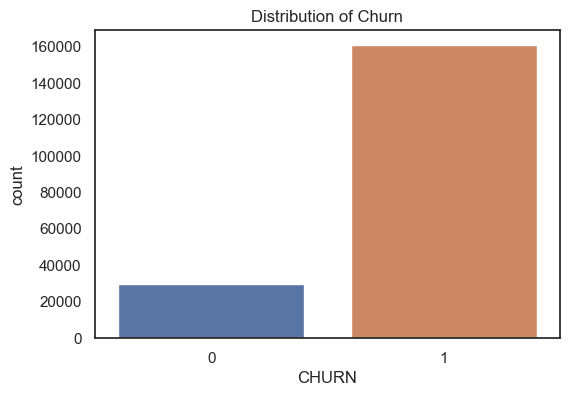

In [103]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='CHURN', data=telco_europa_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features = [col for col in telco_europa_df.columns if telco_europa_df[col].nunique() < 10]
num_features = [col for col in telco_europa_df.columns if col not in cat_features + ['CHURN', 'CETEL_NUMBER', 'CNI_CUSTOMER']]

# Distribution of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(3, 1, i+1)
    sns.countplot(x=feature, data=telco_europa_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(4, 5, i+1)
    sns.histplot(telco_europa_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(telco_europa_df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

##### 7.6.2 Telco Europa Churn Preprocessing

In [104]:
# Step 1: Remove non-informative columns and correct data types
for col in cat_features:
    telco_europa_df[col] = telco_europa_df[col].astype('category')
    
telco_europa_df = telco_europa_df.drop(columns=['CETEL_NUMBER', 'CNI_CUSTOMER'])

# Step 2: Create target and  independent features 
X = telco_europa_df.drop(columns=['CHURN'])
y = telco_europa_df['CHURN']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

DAYS_LIFE  DEVICE_TECNOLOGY  MIN_PLAN  PRICE_PLAN  TOT_MIN_CALL_OUT  \
0  -0.684357         -0.080126 -0.384822    2.509254          1.201777   
1   0.512428         -0.080126  1.326066    0.004658         -0.065716   
2   0.623757          0.434512 -1.411354   -1.498159         -0.611676   
3  -0.118436         -0.080126  1.326066    1.006437          1.312412   
4   0.141332         -0.080126 -1.126206    0.004658         -0.606866   

   AVG_MIN_CALL_OUT_3  TOT_MIN_IN_ULT_MES  AVG_MIN_IN_3  ROA_LASTMONTH  \
0            0.935597            0.104964     -0.208349      -0.277888   
1           -0.323604           -0.510305     -0.248642      -0.277888   
2           -0.645356           -0.560737     -0.248642      -0.277888   
3            1.873046            0.175569      0.315465       0.093711   
4           -0.629467           -0.560737     -0.248642      -0.277888   

   ROACETEL_LAST_MONTH  ...  TEC_ANT_DATA_0.0  TEC_ANT_DATA_2.0  \
0            -0.483673  ...               0.0               0.0   
1            -0.600546  ...               0.0               0.0   
2            -0.483673  ...               0.0               0.0   
3            -0.191488  ...               0.0               0.0   
4            -0.133051  ...               0.0               0.0   

   TEC_ANT_DATA_2.5  TEC_ANT_DATA_3.0  TEC_ANT_DATA_4.0  TEC_ANT_VOICE_0.0  \
0               0.0               0.0               1.0                0.0   
1               0.0               0.0               1.0                0.0   
2               0.0               1.0               0.0                0.0   
3               0.0               0.0               1.0                0.0   
4               0.0               0.0               1.0                0.0   

   TEC_ANT_VOICE_2.0  TEC_ANT_VOICE_2.5  TEC_ANT_VOICE_3.0  TEC_ANT_VOICE_4.0  
0                0.0                0.0                0.0                1.0  
1                0.0                0.0                0.0                1.0  
2                0.0                0.0                1.0                0.0  
3                0.0                0.0                0.0                1.0  
4                0.0                0.0                0.0                1.0  

[5 rows x 25 columns]

##### 7.6.3 Telco Europa Churn Predictive Models

In [105]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
XGboost                  0.95       0.96    0.99  0.97     0.96
Catboost                 0.95       0.96    0.99  0.97     0.96
Lightgbm                 0.95       0.96    0.99  0.97     0.95
Random Forest            0.95       0.95    0.99  0.97     0.94
Bagging                  0.95       0.96    0.98  0.97     0.93
Gradient Boosting        0.94       0.94    0.99  0.97     0.93
MLP                      0.94       0.94    0.99  0.96     0.93
AdaBoost                 0.93       0.93    0.99  0.96     0.92
SVC                      0.91       0.90    1.00  0.95     0.88
Decision Tree            0.92       0.96    0.95  0.95     0.86
KNeighbors               0.90       0.91    0.98  0.94     0.82
Logistic Regression      0.88       0.88    1.00  0.93     0.76
GaussianNB               0.85       0.88    0.95  0.92     0.76


In [106]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
XGboost                  0.95       0.96    0.99  0.97     0.96
Catboost                 0.95       0.96    0.99  0.97     0.96
Lightgbm                 0.95       0.95    0.99  0.97     0.96
Random Forest            0.95       0.95    0.99  0.97     0.94
MLP                      0.94       0.94    0.99  0.96     0.94
Bagging                  0.95       0.96    0.98  0.97     0.93
Gradient Boosting        0.94       0.94    0.99  0.97     0.93
AdaBoost                 0.93       0.92    0.99  0.96     0.91
Decision Tree            0.92       0.96    0.95  0.95     0.86
KNeighbors               0.90       0.91    0.98  0.94     0.83
Logistic Regression      0.88       0.88    1.00  0.93     0.76
GaussianNB               0.86       0.88    0.95  0.92     0.75
SVC                      0.91       0.90    1.00  0.95      NaN


  Model  Accuracy  Precision  Recall  F1 Score
0   cat      0.95       0.96    0.99      0.97
1  lgbm      0.95       0.95    0.99      0.97
2   xgb      0.95       0.96    0.99      0.97


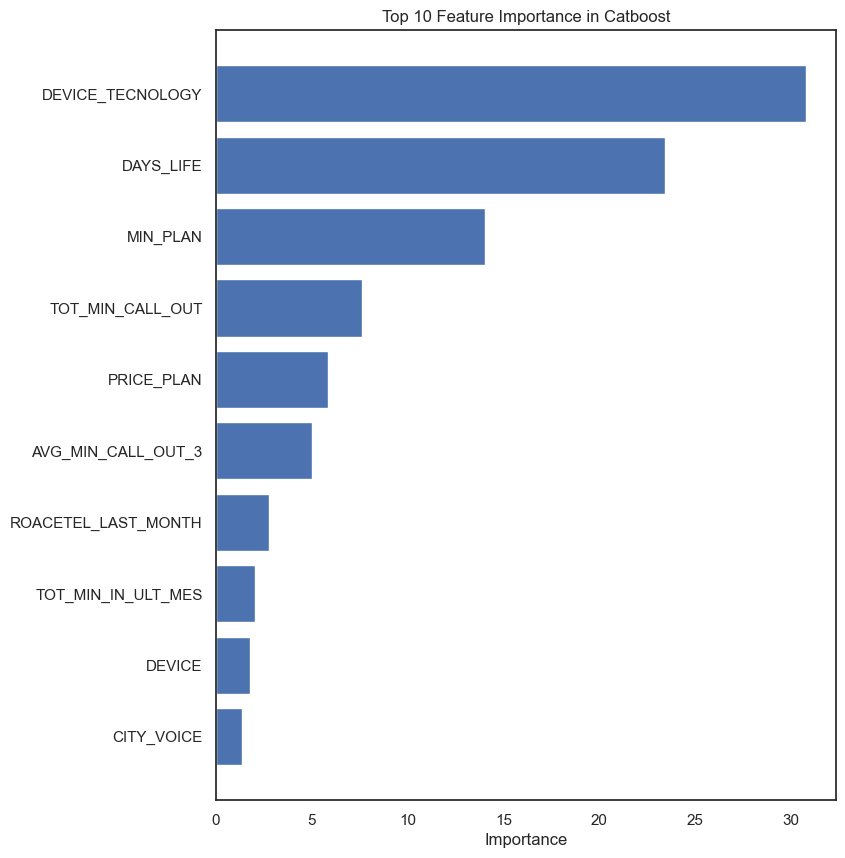

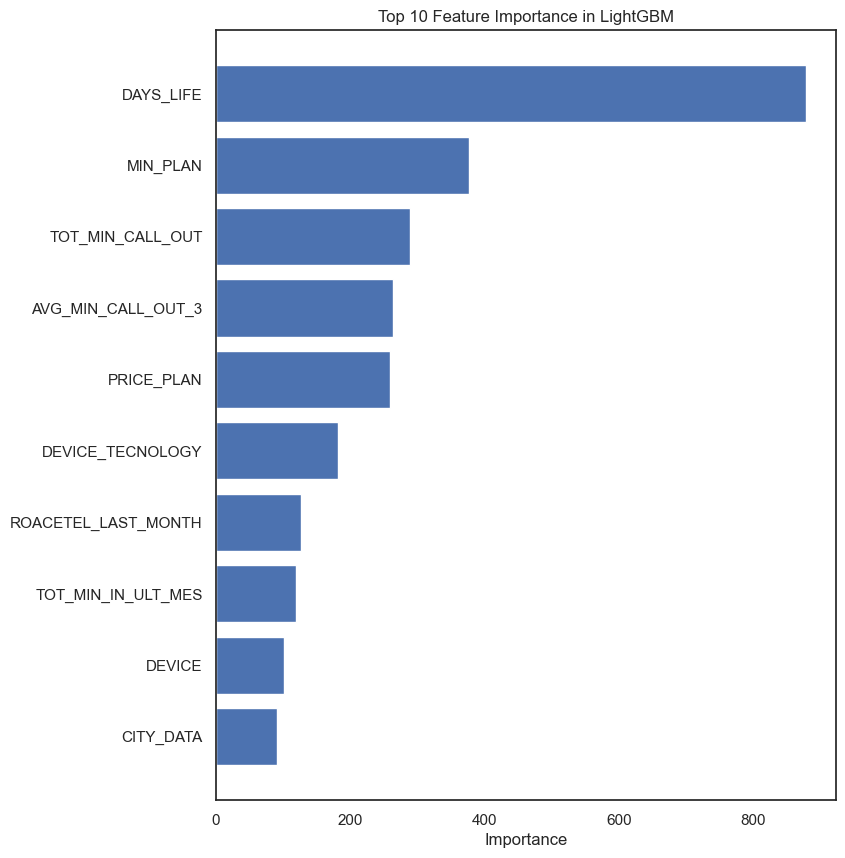

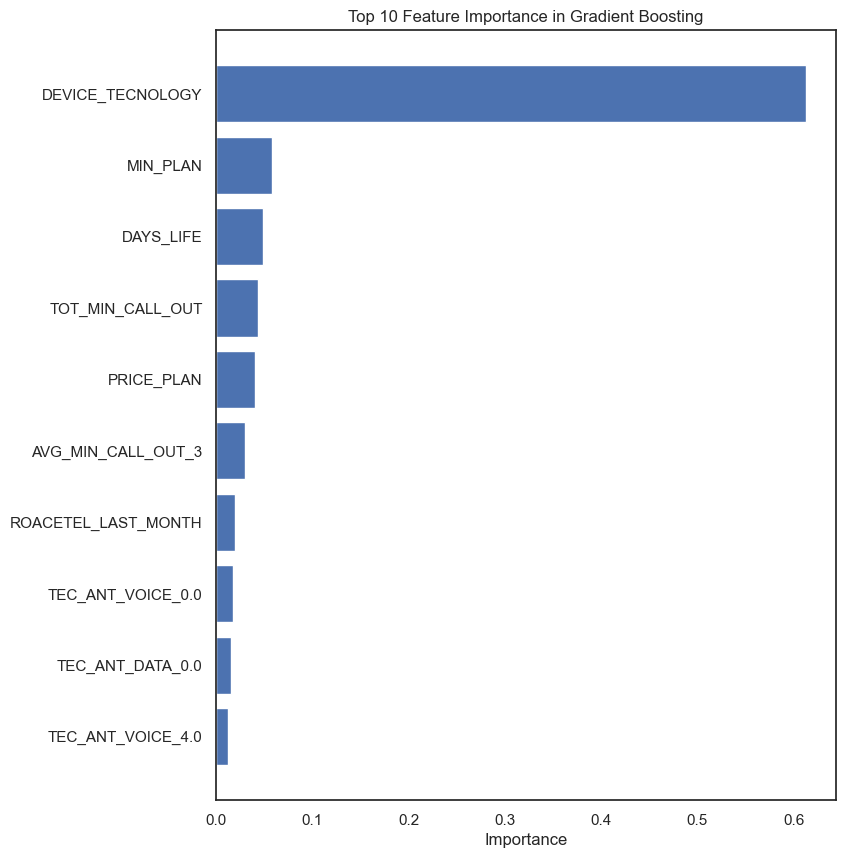

In [107]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.7 Cell2cell Churn Dataset

##### 7.7.1 cell2cell Churn EDA

In [137]:
# Create a brief summary data table
cell2cell_df_summary = pd.DataFrame({
    "Unique Values" : cell2cell_df.nunique(),
    "Missing Values": cell2cell_df.isnull().sum(),
    'NaN Values': cell2cell_df.isna().sum(),
    'Duplicated' : cell2cell_df.duplicated().sum(),
    'Dtypes': cell2cell_df.dtypes
})

cell2cell_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  Duplicated    Dtypes
age1                 43            1244        1244           0   float64
age2                 43            1244        1244           0   float64
changem            6847             502         502           0   float64
changer           26264             502         502           0   float64
revenue           31115             216         216           0   float64
...                 ...             ...         ...         ...       ...
prizmub               2               0           0           0  category
prizmtwn              2               0           0           0  category
refurb                2               0           0           0  category
webcap                2               0           0           0  category
retcall               2               0           0           0  category

[68 rows x 5 columns]

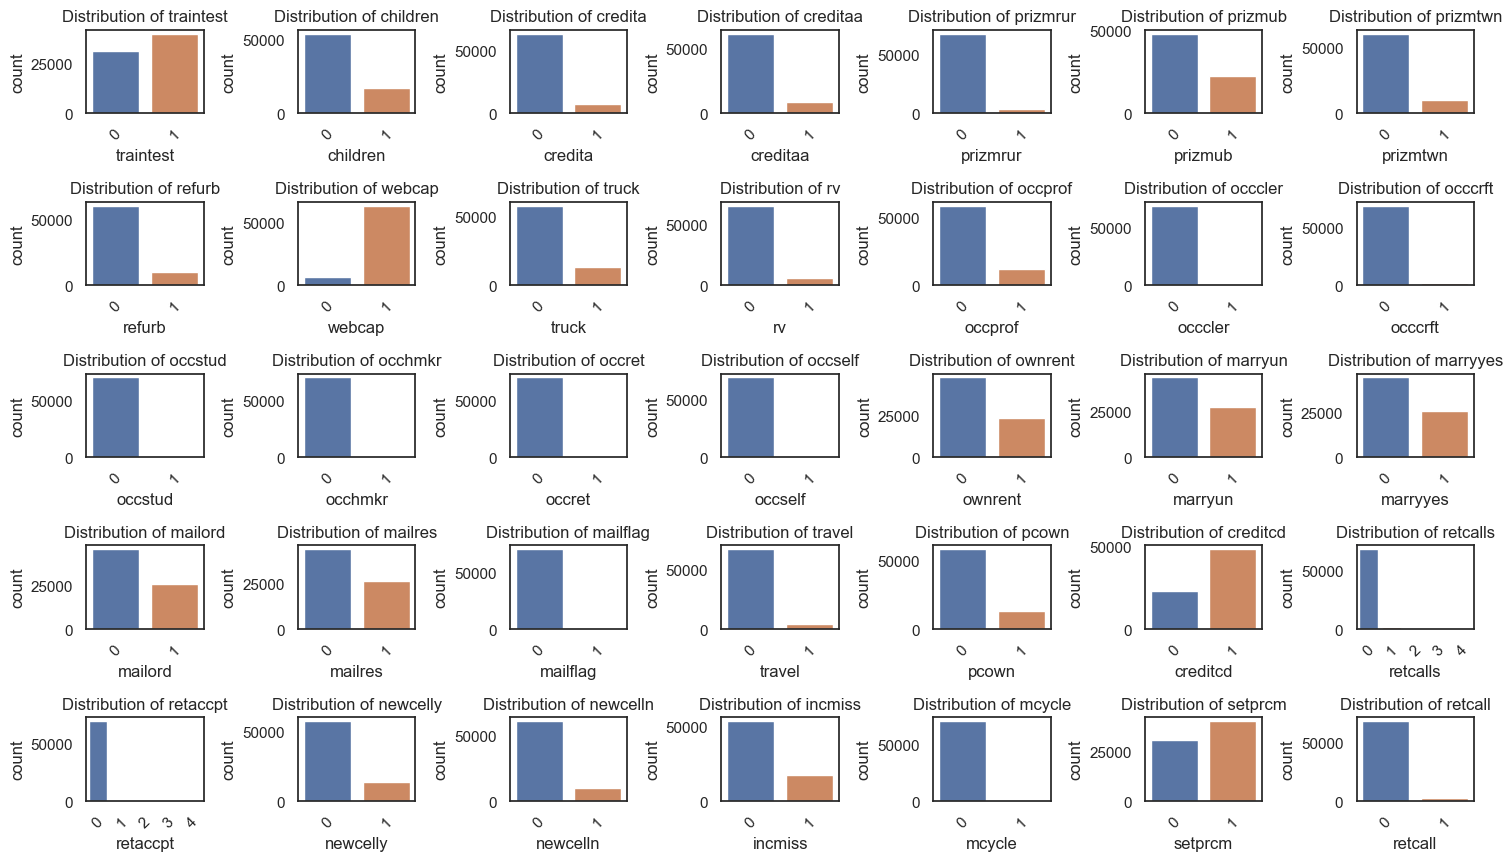

In [138]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=cell2cell_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features = [col for col in cell2cell_df.columns if cell2cell_df[col].nunique() < 10 and col != 'churn']
num_features = [col for col in cell2cell_df.columns if col not in cat_features + ['churn']]

# Distribution of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(6, 7, i+1)
    sns.countplot(x=feature, data=cell2cell_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(6, 6, i+1)
    sns.histplot(cell2cell_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(cell2cell_df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

##### 7.7.2 cell2cell Churn Preprocessing

In [141]:
# Step 1: Remove non-informative columns and correct data types
for col in cat_features:
    cell2cell_df[col] = cell2cell_df[col].astype('category')
    
cell2cell_df = cell2cell_df.drop(columns=['customer', 'traintest', 'churndep'])

# Step 2: Create target and  independent features 
X = cell2cell_df.drop(columns=['churn'])
y = cell2cell_df['churn']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

revenue       mou  recchrge  directas   overage      roam   changem   changer   dropvce  \
0 -0.320735 -0.310531 -0.703044 -0.294014  0.015710 -0.142519  0.029123 -0.067464  0.440906   
1 -0.635901 -0.273204 -0.703044 -0.406516 -0.419529 -0.142519  0.224288  0.019242 -0.370158   
2  0.028067  0.826305  1.388055 -0.406516 -0.322518 -0.142519 -0.484050  0.030654  1.436303   
3  0.068809  2.101112  0.551448 -0.406516 -0.230751  0.213625  0.290664  0.658459  0.440906   
4 -0.127224  1.235491  0.551448 -0.406516 -0.306786 -0.142519 -1.017037 -0.056457 -0.222692   

    blckvce  ...  newcelln_0  newcelln_1  incmiss_0  incmiss_1  mcycle_0  mcycle_1  setprcm_0  \
0 -0.223919  ...         1.0         0.0        1.0        0.0       1.0       0.0        0.0   
1 -0.347244  ...         1.0         0.0        1.0        0.0       1.0       0.0        1.0   
2 -0.223919  ...         1.0         0.0        1.0        0.0       1.0       0.0        1.0   
3 -0.162257  ...         1.0         0.0        0.0        1.0       1.0       0.0        1.0   
4 -0.347244  ...         1.0         0.0        1.0        0.0       1.0       0.0        1.0   

   setprcm_1  retcall_0  retcall_1  
0        1.0        1.0        0.0  
1        0.0        1.0        0.0  
2        0.0        1.0        0.0  
3        0.0        1.0        0.0  
4        0.0        1.0        0.0  

[5 rows x 106 columns]

##### 7.7.3 cell2cell Churn Predictive Models

In [142]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Catboost                 0.72       0.60    0.15  0.25     0.68
Lightgbm                 0.72       0.59    0.13  0.21     0.68
Gradient Boosting        0.72       0.62    0.07  0.13     0.67
XGboost                  0.71       0.52    0.20  0.29     0.66
AdaBoost                 0.71       0.54    0.10  0.16     0.66
Random Forest            0.72       0.58    0.08  0.14     0.65
Logistic Regression      0.71       0.51    0.04  0.07     0.62
Bagging                  0.70       0.44    0.17  0.25     0.61
MLP                      0.67       0.40    0.26  0.32     0.60
SVC                      0.71       0.56    0.01  0.03     0.59
GaussianNB               0.70       0.44    0.07  0.11     0.57
Decision Tree            0.61       0.34    0.36  0.35     0.54
KNeighbors               0.67       0.35    0.17  0.23     0.54


In [112]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Catboost                 0.78       0.62    0.63  0.62     0.86
Lightgbm                 0.78       0.62    0.63  0.62     0.86
Gradient Boosting        0.78       0.61    0.62  0.62     0.85
XGboost                  0.77       0.61    0.60  0.61     0.85
AdaBoost                 0.77       0.60    0.61  0.60     0.85
Random Forest            0.77       0.61    0.57  0.59     0.85
Logistic Regression      0.76       0.58    0.56  0.57     0.83
Bagging                  0.75       0.59    0.48  0.53     0.83
MLP                      0.75       0.56    0.61  0.58     0.82
GaussianNB               0.71       0.51    0.06  0.11     0.80
KNeighbors               0.72       0.52    0.39  0.44     0.73
Decision Tree            0.72       0.52    0.53  0.53     0.67
SVC                      0.76       0.59    0.60  0.59      NaN


  Model  Accuracy  Precision  Recall  F1 Score
0   cat      0.78       0.62    0.63      0.62
1  lgbm      0.78       0.62    0.63      0.62
2   xgb      0.77       0.61    0.60      0.61


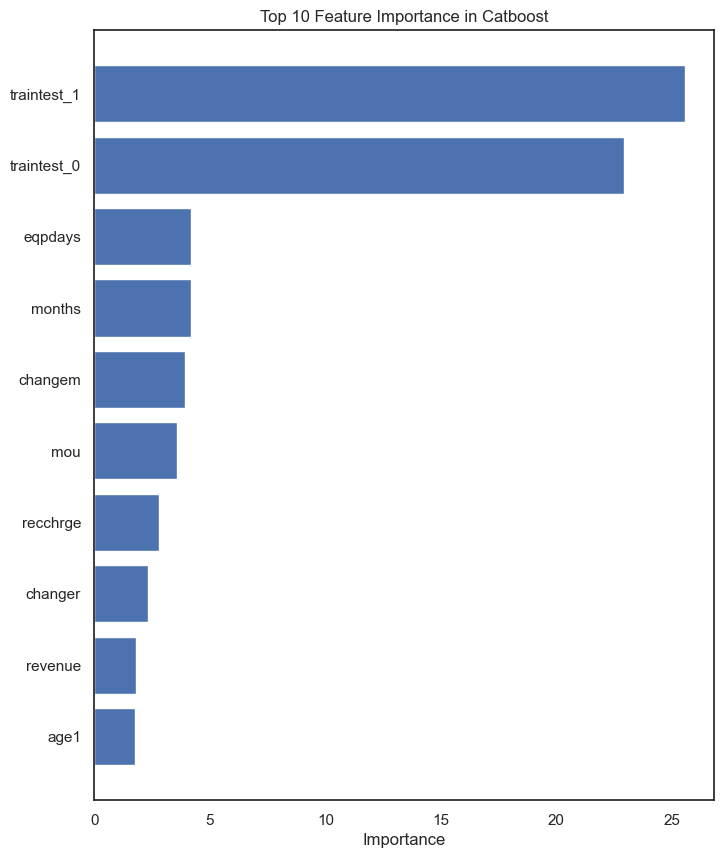

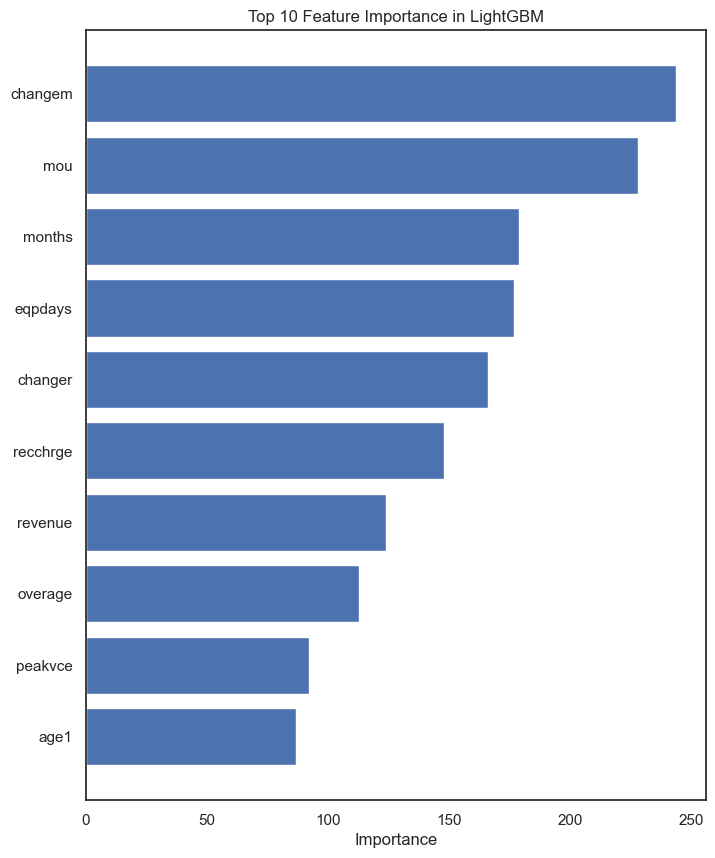

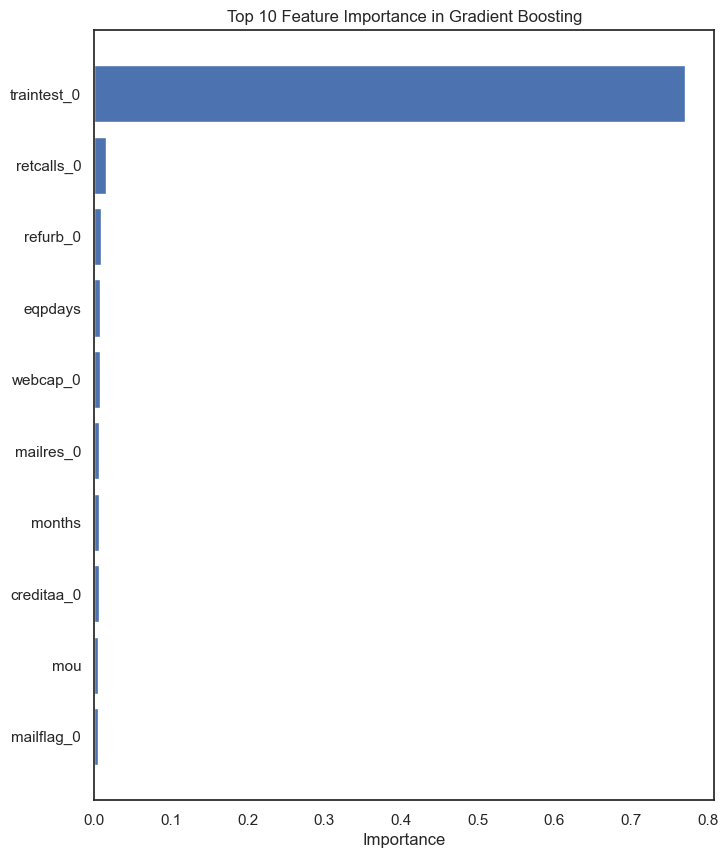

In [113]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.8 Membership Churn Dataset

##### 7.8.1 Membership Churn EDA

In [114]:
# Create a brief summary data table
membership_df_summary = pd.DataFrame({
    "Unique Values" : membership_df.nunique(),
    "Missing Values": membership_df.isnull().sum(),
    'NaN Values': membership_df.isna().sum(),
    'Duplicated' : membership_df.duplicated().sum(),
    'Dtypes': membership_df.dtypes
})

membership_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  Duplicated  \
END_DATE  (YYYYMMDD)            1061            7219        7219           0   
MEMBER_MARITAL_STATUS              4            2597        2597           0   
MEMBER_ANNUAL_INCOME             798            1754        1754           0   
MEMBER_GENDER                      2             611         611           0   
MEMBER_OCCUPATION_CD               6              43          43           0   
MEMBERSHIP_NUMBER              10362               0           0           0   
MEMBERSHIP_TERM_YEARS             92               0           0           0   
ANNUAL_FEES                     3168               0           0           0   
MEMBERSHIP_PACKAGE                 2               0           0           0   
MEMBER_AGE_AT_ISSUE               89               0           0           0   
ADDITIONAL_MEMBERS                 4               0           0           0   
PAYMENT_MODE                       5               0           0           0   
AGENT_CODE                      4317               0           0           0   
MEMBERSHIP_STATUS                  2               0           0           0   
START_DATE (YYYYMMDD)           1300               0           0           0   

                        Dtypes  
END_DATE  (YYYYMMDD)   float64  
MEMBER_MARITAL_STATUS   object  
MEMBER_ANNUAL_INCOME   float64  
MEMBER_GENDER           object  
MEMBER_OCCUPATION_CD   float64  
MEMBERSHIP_NUMBER       object  
MEMBERSHIP_TERM_YEARS    int64  
ANNUAL_FEES            float64  
MEMBERSHIP_PACKAGE      object  
MEMBER_AGE_AT_ISSUE      int64  
ADDITIONAL_MEMBERS       int64  
PAYMENT_MODE            object  
AGENT_CODE              object  
MEMBERSHIP_STATUS       object  
START_DATE (YYYYMMDD)    int64

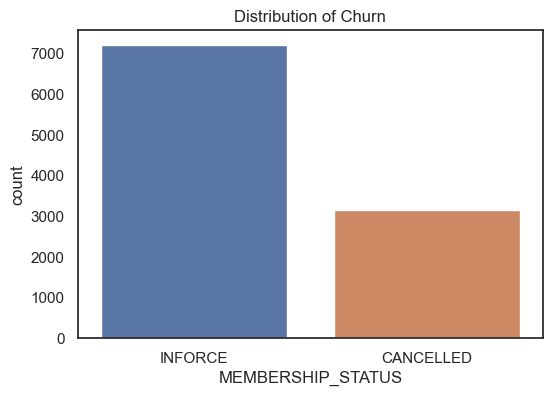

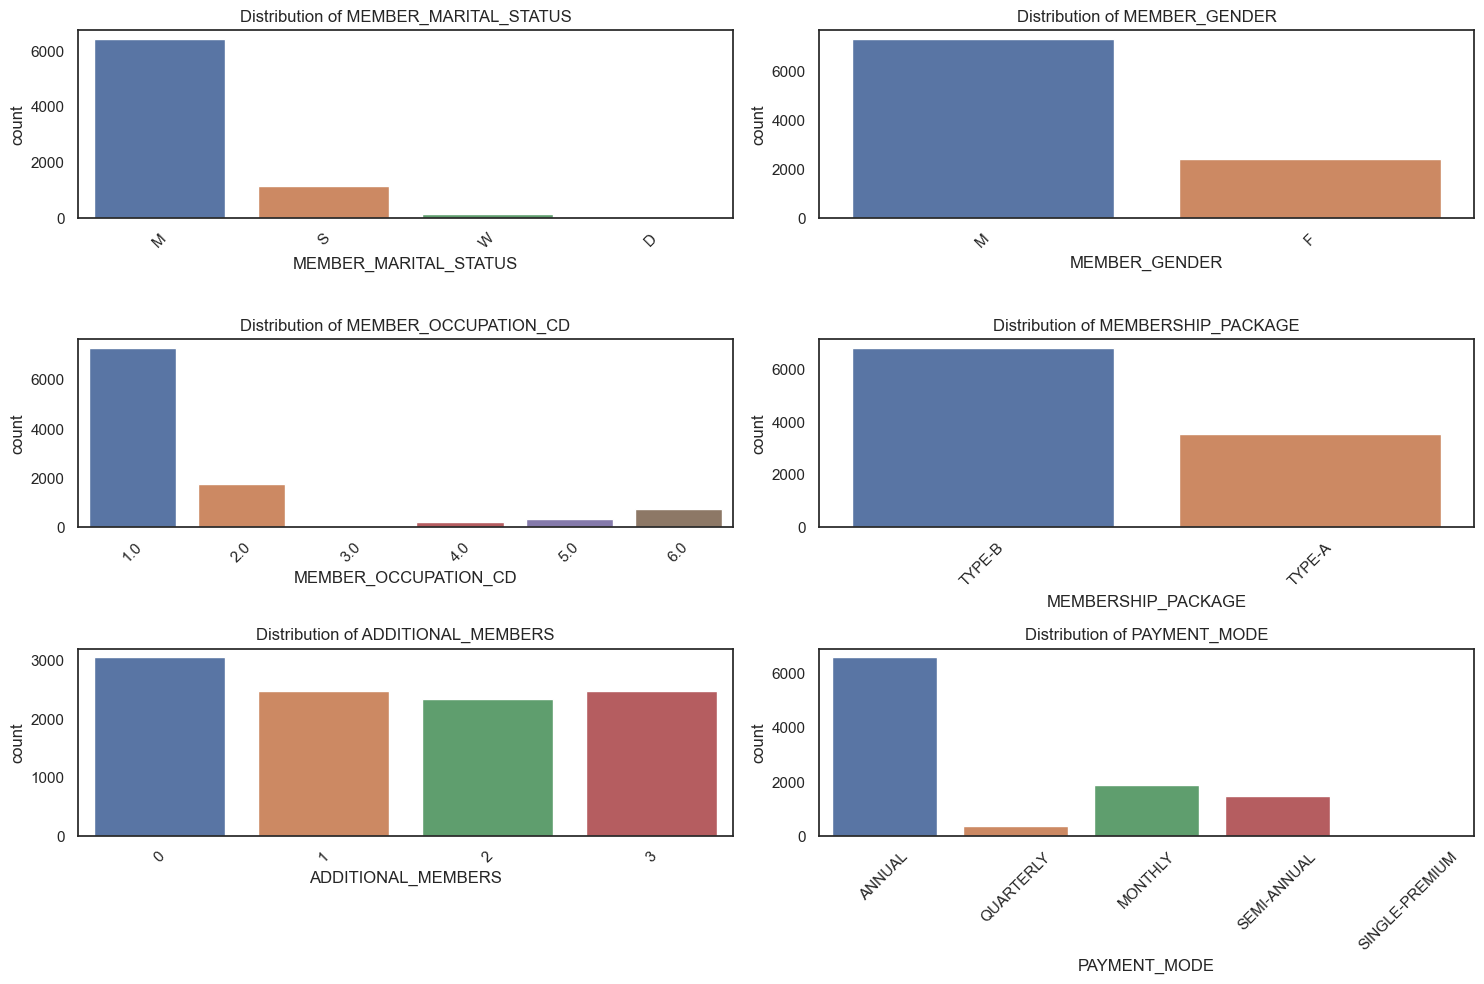

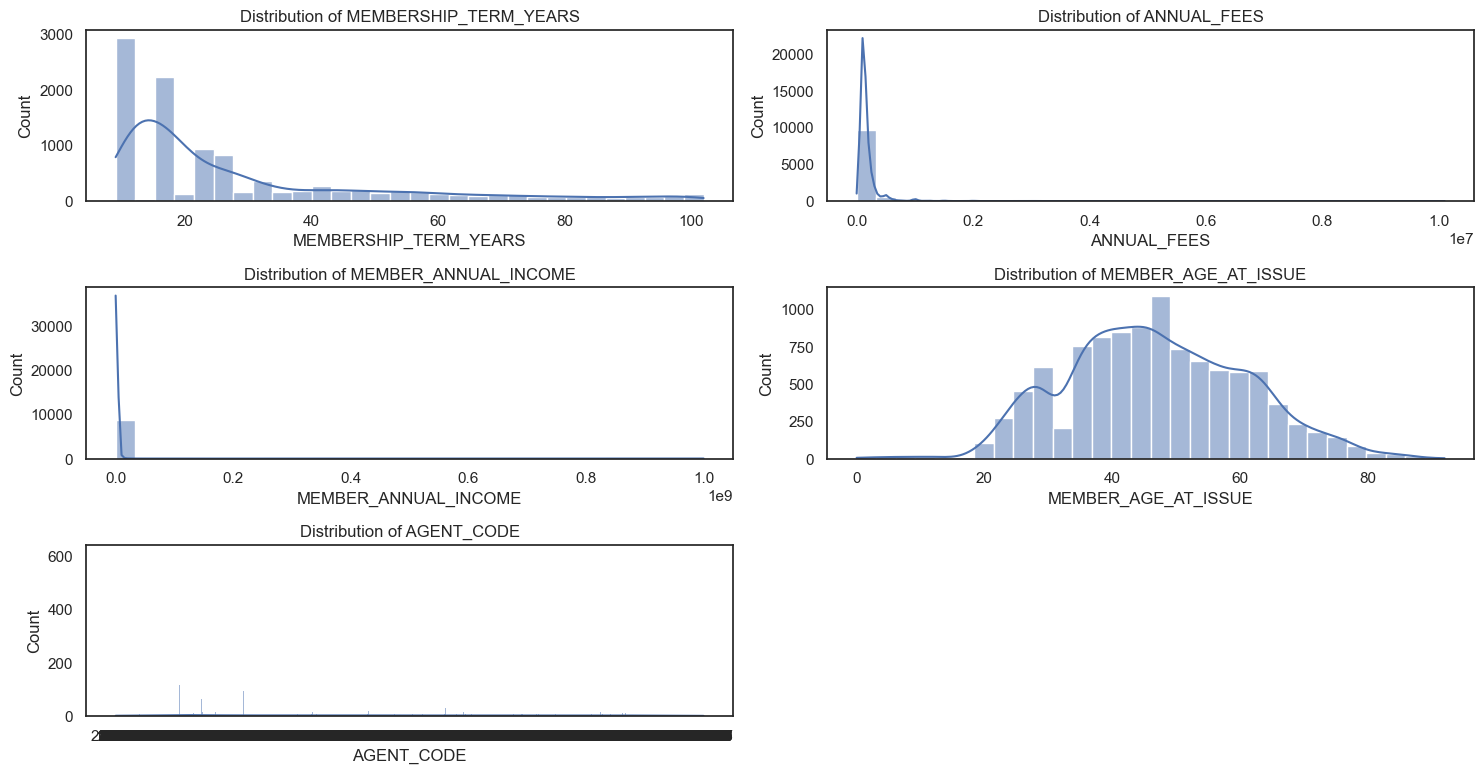

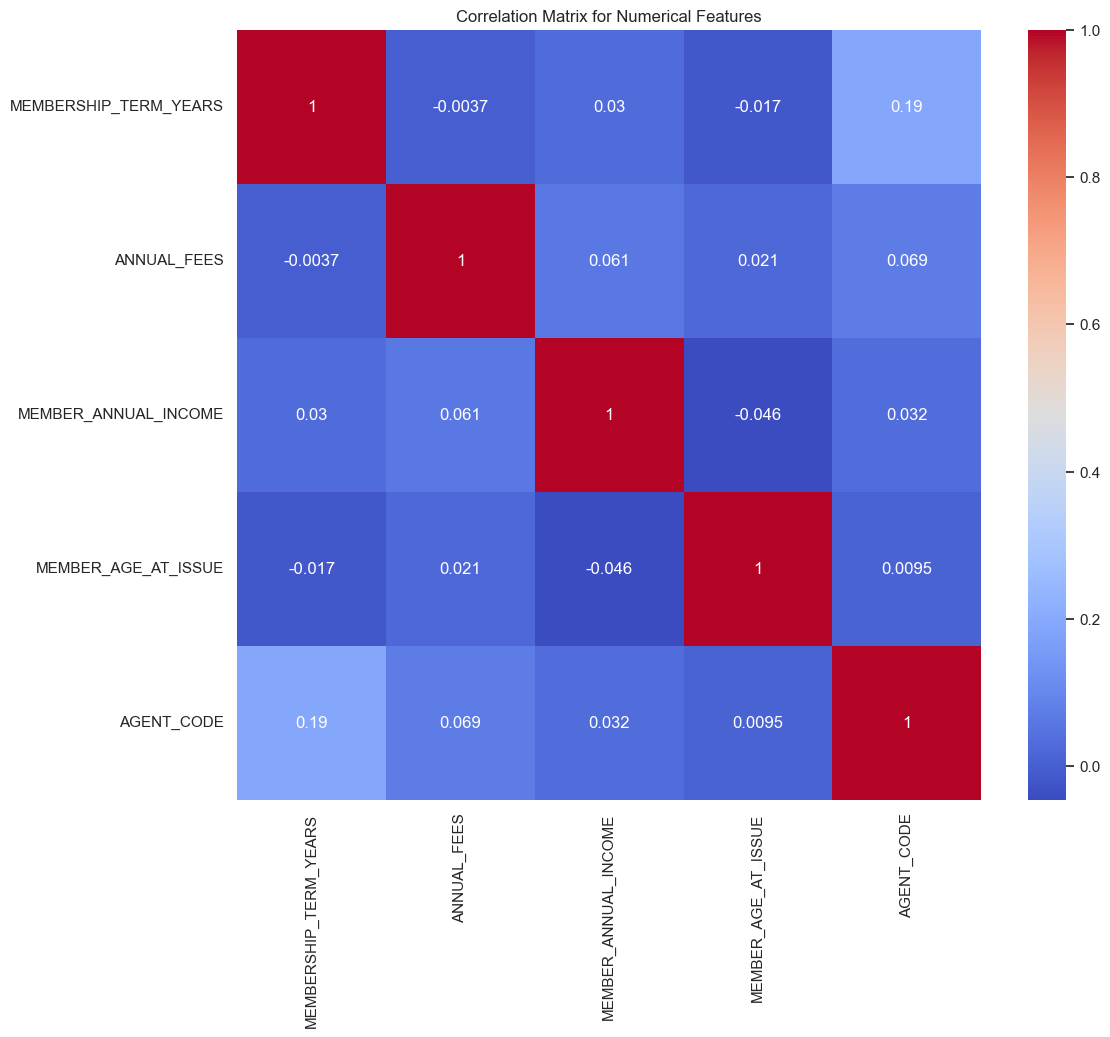

In [116]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='MEMBERSHIP_STATUS', data=membership_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features = [col for col in membership_df.columns if membership_df[col].nunique() < 10 and col != 'MEMBERSHIP_STATUS']
num_features = [col for col in membership_df.columns if col not in cat_features + ['MEMBERSHIP_STATUS', 'MEMBERSHIP_NUMBER', 'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)']]

# Remove .. in Agent Code feature
membership_df = membership_df[membership_df['AGENT_CODE'] != '..']

# Distribution of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=feature, data=membership_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(membership_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(membership_df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

##### 7.8.2 Membership Churn Preprocessing

In [117]:
# Step 1: Remove non-informative columns and correct data types
for col in cat_features:
    membership_df[col] = membership_df[col].astype('category')
    
membership_df = membership_df.drop(columns=['MEMBERSHIP_NUMBER', 'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'])
membership_df['MEMBERSHIP_STATUS'] = membership_df['MEMBERSHIP_STATUS'].map({'INFORCE':0, 'CANCELLED':1})


# Step 2: Create target and  independent features 
X = membership_df.drop(columns=['MEMBERSHIP_STATUS'])
y = membership_df['MEMBERSHIP_STATUS']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

MEMBERSHIP_TERM_YEARS  ANNUAL_FEES  MEMBER_ANNUAL_INCOME  \
0              -0.099593     0.466394              0.000000   
1              -0.324337    -0.304551             -0.044066   
2              -0.549082    -0.227453             -0.001921   
3               1.114026     0.003817             -0.051181   
4              -0.549082    -0.227347             -0.056654   

   MEMBER_AGE_AT_ISSUE  MEMBER_MARITAL_STATUS_D  MEMBER_MARITAL_STATUS_M  \
0             0.301105                      0.0                      1.0   
1            -1.210440                      0.0                      1.0   
2             0.085170                      0.0                      1.0   
3             0.229126                      0.0                      0.0   
4             1.380780                      0.0                      1.0   

   MEMBER_MARITAL_STATUS_S  MEMBER_MARITAL_STATUS_W  MEMBER_GENDER_F  \
0                      0.0                      0.0              0.0   
1                      0.0                      0.0              0.0   
2                      0.0                      0.0              0.0   
3                      1.0                      0.0              0.0   
4                      0.0                      0.0              0.0   

   MEMBER_GENDER_M  ...  MEMBERSHIP_PACKAGE_TYPE-B  ADDITIONAL_MEMBERS_0  \
0              1.0  ...                        1.0                   1.0   
1              1.0  ...                        1.0                   0.0   
2              1.0  ...                        1.0                   0.0   
3              1.0  ...                        0.0                   1.0   
4              1.0  ...                        0.0                   0.0   

   ADDITIONAL_MEMBERS_1  ADDITIONAL_MEMBERS_2  ADDITIONAL_MEMBERS_3  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   PAYMENT_MODE_ANNUAL  PAYMENT_MODE_MONTHLY  PAYMENT_MODE_QUARTERLY  \
0                  1.0                   0.0                     0.0   
1                  1.0                   0.0                     0.0   
2                  0.0                   1.0                     0.0   
3                  0.0                   1.0                     0.0   
4                  0.0                   1.0                     0.0   

   PAYMENT_MODE_SEMI-ANNUAL  PAYMENT_MODE_SINGLE-PREMIUM  
0                       0.0                          0.0  
1                       0.0                          0.0  
2                       0.0                          0.0  
3                       0.0                          0.0  
4                       0.0                          0.0  

[5 rows x 27 columns]

##### 7.8.3 Membership Churn Predictive Models

In [118]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Lightgbm                 0.70       0.53    0.24  0.33     0.70
Catboost                 0.70       0.53    0.21  0.30     0.70
Gradient Boosting        0.70       0.54    0.15  0.23     0.70
Random Forest            0.69       0.49    0.31  0.38     0.69
XGboost                  0.69       0.49    0.31  0.38     0.69
MLP                      0.69       0.49    0.21  0.29     0.68
AdaBoost                 0.70       0.50    0.15  0.24     0.68
Bagging                  0.68       0.47    0.31  0.37     0.66
SVC                      0.70       0.58    0.04  0.08     0.65
Logistic Regression      0.69       0.41    0.02  0.04     0.65
KNeighbors               0.66       0.42    0.30  0.35     0.62
GaussianNB               0.49       0.36    0.82  0.49     0.61
Decision Tree            0.63       0.40    0.41  0.40     0.57


In [119]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Catboost                 0.71       0.56    0.23  0.32     0.71
Lightgbm                 0.70       0.52    0.23  0.32     0.71
Gradient Boosting        0.71       0.56    0.15  0.23     0.71
XGboost                  0.70       0.51    0.31  0.39     0.69
Random Forest            0.69       0.48    0.31  0.38     0.69
AdaBoost                 0.70       0.54    0.14  0.22     0.69
Bagging                  0.69       0.48    0.32  0.38     0.68
MLP                      0.70       0.51    0.23  0.32     0.68
Logistic Regression      0.70       0.56    0.02  0.04     0.65
KNeighbors               0.66       0.43    0.32  0.37     0.63
GaussianNB               0.54       0.37    0.76  0.50     0.62
Decision Tree            0.64       0.41    0.43  0.42     0.58
SVC                      0.70       0.57    0.06  0.11      NaN


  Model  Accuracy  Precision  Recall  F1 Score
2   xgb      0.70       0.51    0.31      0.39
0   cat      0.71       0.56    0.23      0.32
1  lgbm      0.70       0.52    0.23      0.32


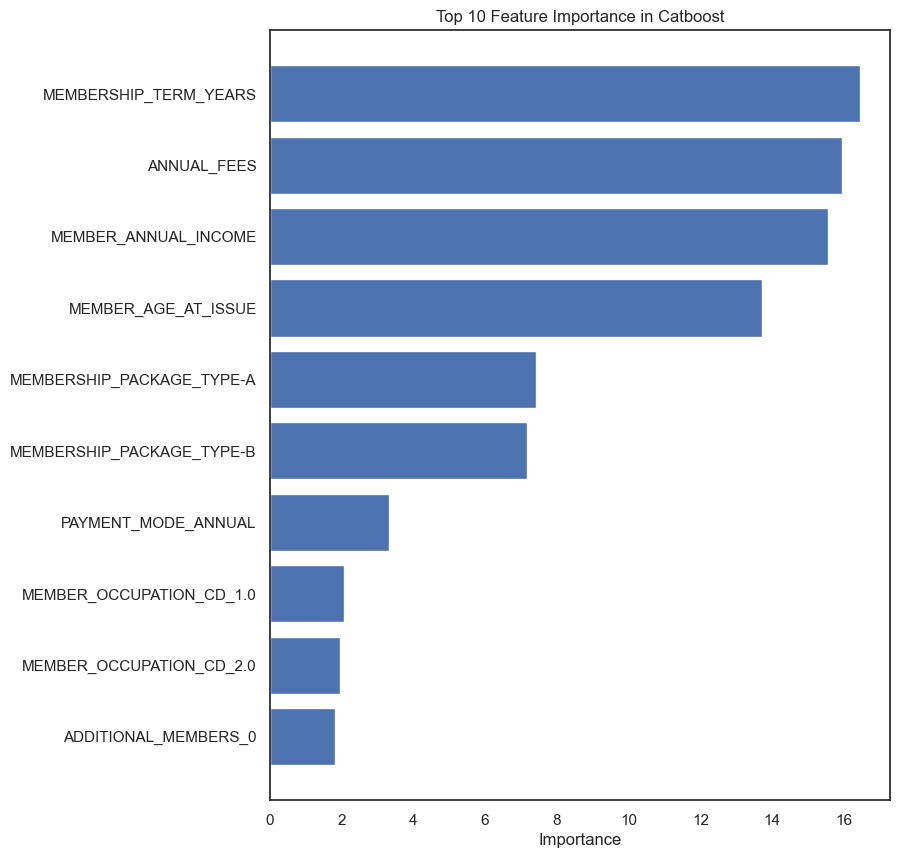

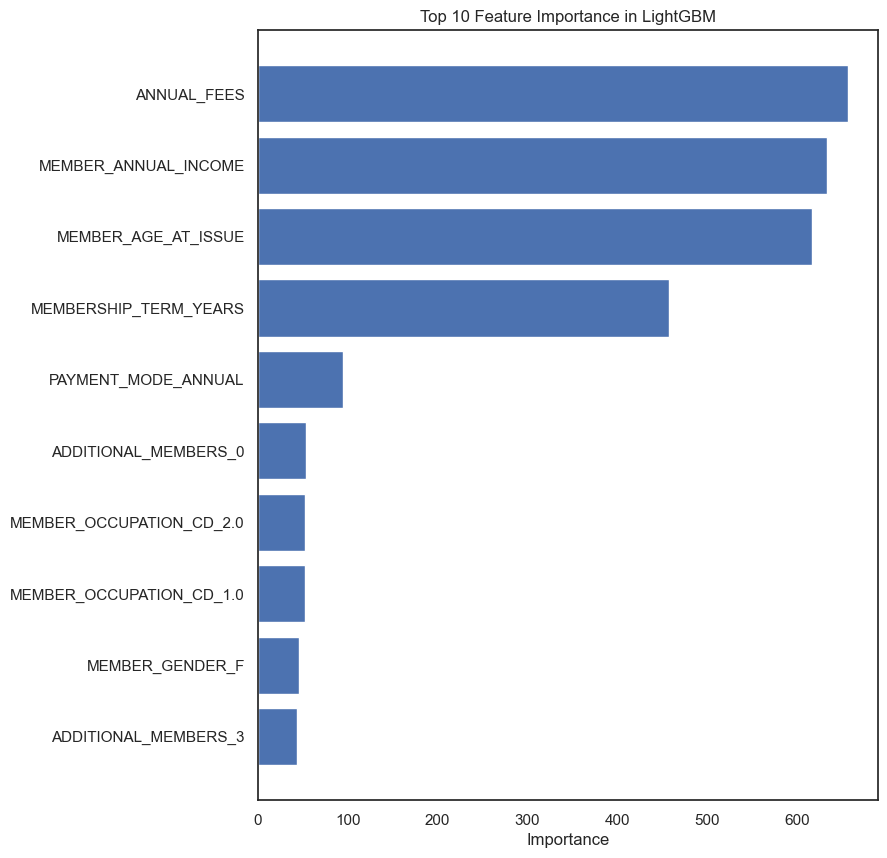

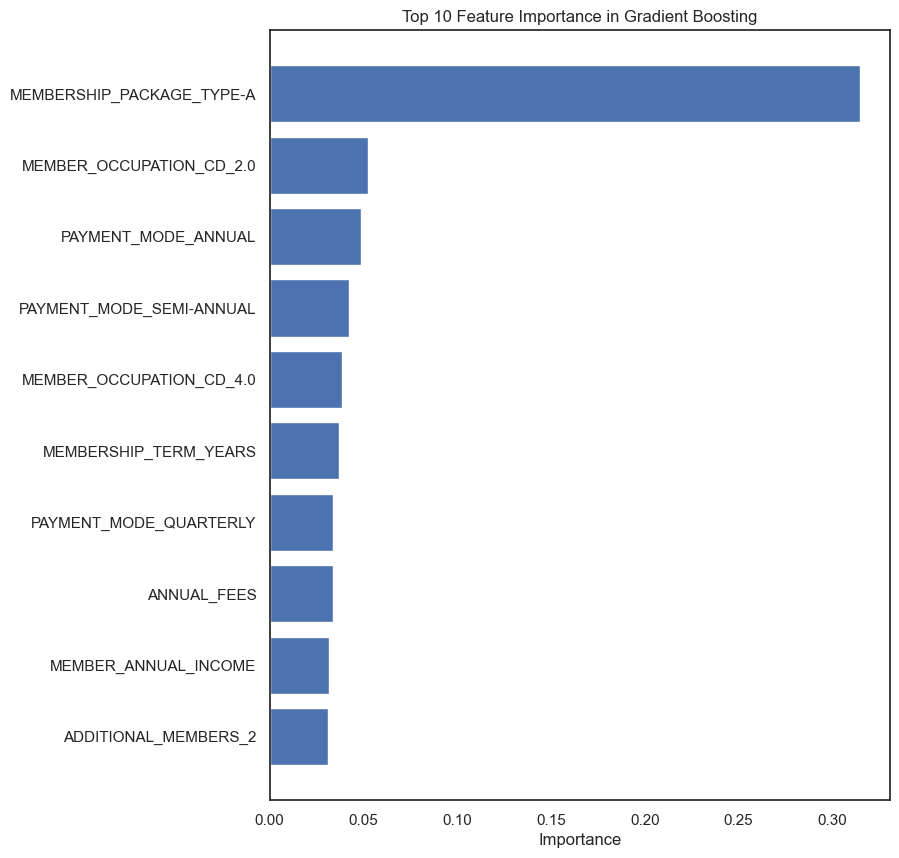

In [120]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.9 SA Wireless Telecom Churn Dataset

##### 7.9.1 SA Wireless Telecom Churn EDA

In [121]:
# Create a brief summary data table
sa_wireless_telecom_df_summary = pd.DataFrame({
    "Unique Values" : sa_wireless_telecom_df.nunique(),
    "Missing Values": sa_wireless_telecom_df.isnull().sum(),
    'NaN Values': sa_wireless_telecom_df.isna().sum(),
    'Duplicated' : sa_wireless_telecom_df.duplicated().sum(),
    'Dtypes': sa_wireless_telecom_df.dtypes
})

sa_wireless_telecom_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  NaN Values  \
aug_user_type                          3             245         245   
sep_user_type                          3             206         206   
aug_fav_a                              7               1           1   
sep_fav_a                              6               1           1   
network_age                         1364               0           0   
Aggregate_Total_Rev                 1982               0           0   
Aggregate_SMS_Rev                    998               0           0   
Aggregate_Data_Rev                   307               0           0   
Aggregate_Data_Vol                  1990               0           0   
Aggregate_Calls                      666               0           0   
Aggregate_ONNET_REV                 1194               0           0   
Aggregate_OFFNET_REV                1614               0           0   
Aggregate_complaint_count             20               0           0   
Class                                  2               0           0   

                           Duplicated   Dtypes  
aug_user_type                       0   object  
sep_user_type                       0   object  
aug_fav_a                           0   object  
sep_fav_a                           0   object  
network_age                         0    int64  
Aggregate_Total_Rev                 0  float64  
Aggregate_SMS_Rev                   0  float64  
Aggregate_Data_Rev                  0  float64  
Aggregate_Data_Vol                  0  float64  
Aggregate_Calls                     0    int64  
Aggregate_ONNET_REV                 0    int64  
Aggregate_OFFNET_REV                0    int64  
Aggregate_complaint_count           0    int64  
Class                               0   object

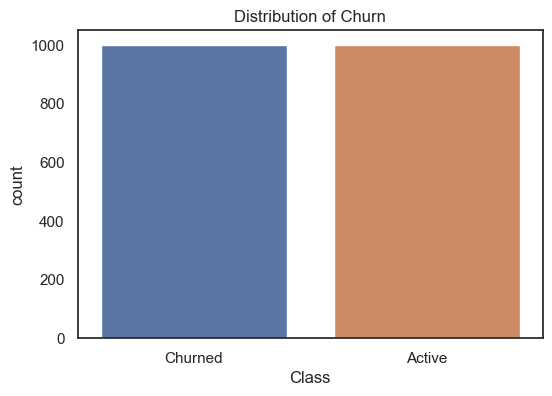

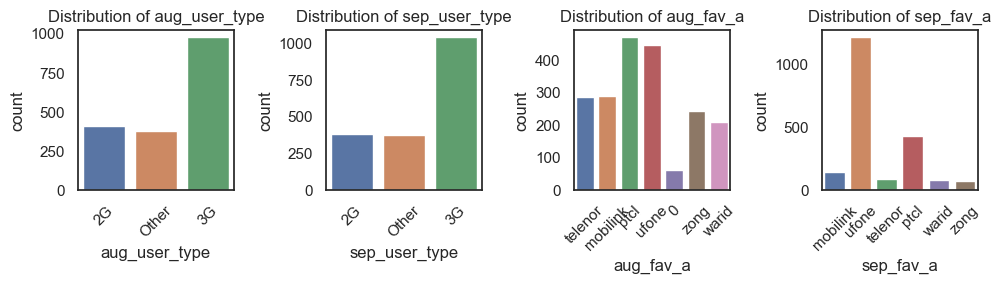

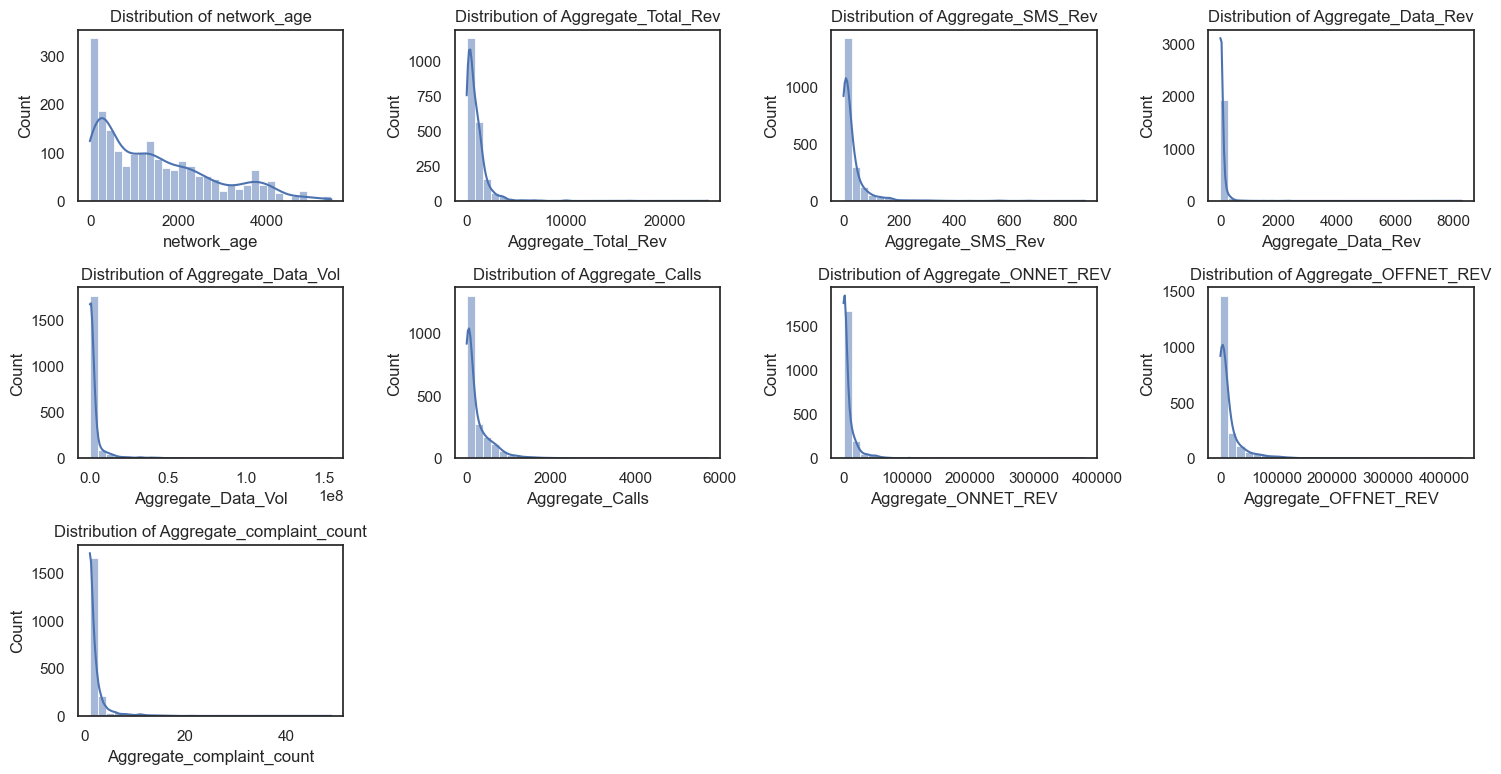

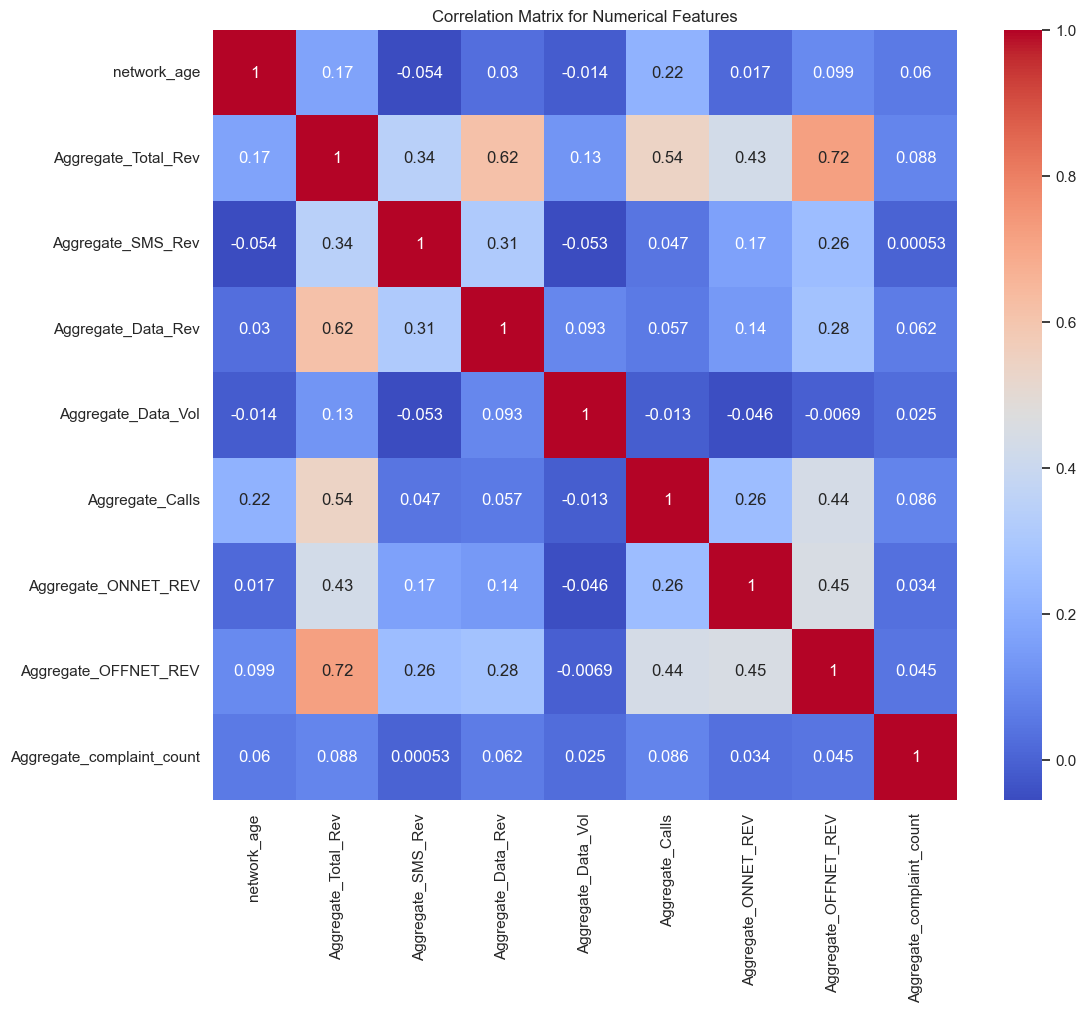

In [122]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=sa_wireless_telecom_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features = [col for col in sa_wireless_telecom_df.columns if sa_wireless_telecom_df[col].nunique() < 10 and col != 'Class']
num_features = [col for col in sa_wireless_telecom_df.columns if col not in cat_features + ['Class']]

# Distribution of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(4, 6, i+1)
    sns.countplot(x=feature, data=sa_wireless_telecom_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(sa_wireless_telecom_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(sa_wireless_telecom_df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

##### 7.9.2 SA Wireless Telecom Churn Preprocessing

In [123]:
# Step 1: Remove non-informative columns and correct data types
for col in cat_features:
    sa_wireless_telecom_df[col] = sa_wireless_telecom_df[col].astype('category')

sa_wireless_telecom_df['Class'] = sa_wireless_telecom_df['Class'].map({'Active':0, 'Churned':1})


# Step 2: Create target and  independent features 
X = sa_wireless_telecom_df.drop(columns=['Class'])
y = sa_wireless_telecom_df['Class']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

network_age  Aggregate_Total_Rev  Aggregate_SMS_Rev  Aggregate_Data_Rev  \
0     0.650083            -0.000180          -0.426233           -0.223863   
1    -1.043877            -0.650995          -0.511152           -0.228639   
2     2.158642             1.561773          -0.017816           -0.228639   
3     1.629378             0.212947           1.450382           -0.199983   
4     1.899556            -0.714509          -0.085913           -0.219087   

   Aggregate_Data_Vol  Aggregate_Calls  Aggregate_ONNET_REV  \
0           -0.204395         0.832123            -0.448991   
1           -0.305436        -0.248320            -0.376808   
2           -0.300511         5.946220             0.255153   
3           -0.305432        -0.104261             0.619501   
4           -0.305439        -0.620472            -0.329362   

   Aggregate_OFFNET_REV  Aggregate_complaint_count  aug_user_type_2G  ...  \
0             -0.393732                  -0.400303               0.0  ...   
1             -0.103693                   1.700656               1.0  ...   
2              0.105771                   0.440081               0.0  ...   
3              1.521913                   0.019889               1.0  ...   
4             -0.462506                   0.019889               1.0  ...   

   aug_fav_a_telenor  aug_fav_a_ufone  aug_fav_a_warid  aug_fav_a_zong  \
0                0.0              0.0              0.0             1.0   
1                0.0              0.0              1.0             0.0   
2                0.0              0.0              0.0             1.0   
3                1.0              0.0              0.0             0.0   
4                0.0              0.0              0.0             0.0   

   sep_fav_a_mobilink  sep_fav_a_ptcl  sep_fav_a_telenor  sep_fav_a_ufone  \
0                 0.0             0.0                0.0              1.0   
1                 1.0             0.0                0.0              0.0   
2                 0.0             0.0                0.0              1.0   
3                 1.0             0.0                0.0              0.0   
4                 0.0             0.0                0.0              1.0   

   sep_fav_a_warid  sep_fav_a_zong  
0              0.0             0.0  
1              0.0             0.0  
2              0.0             0.0  
3              0.0             0.0  
4              0.0             0.0  

[5 rows x 28 columns]

##### 7.9.3 SA Wireless Telecom Churn Predictive Models

In [124]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Catboost                 0.72       0.73    0.71  0.72     0.80
Lightgbm                 0.72       0.73    0.70  0.72     0.79
Gradient Boosting        0.71       0.72    0.69  0.71     0.79
Random Forest            0.71       0.72    0.69  0.70     0.79
Logistic Regression      0.71       0.71    0.72  0.71     0.78
AdaBoost                 0.71       0.72    0.70  0.71     0.78
SVC                      0.70       0.70    0.68  0.69     0.78
XGboost                  0.70       0.69    0.71  0.70     0.77
MLP                      0.69       0.70    0.68  0.69     0.76
Bagging                  0.69       0.71    0.64  0.67     0.75
GaussianNB               0.68       0.71    0.63  0.67     0.74
KNeighbors               0.67       0.67    0.66  0.66     0.72
Decision Tree            0.64       0.63    0.66  0.65     0.64


In [125]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Catboost                 0.78       0.79    0.76  0.77     0.86
Gradient Boosting        0.77       0.78    0.76  0.77     0.85
Random Forest            0.77       0.78    0.75  0.76     0.85
Lightgbm                 0.77       0.78    0.74  0.76     0.84
XGboost                  0.76       0.77    0.75  0.76     0.84
AdaBoost                 0.76       0.77    0.74  0.75     0.84
Logistic Regression      0.73       0.73    0.75  0.74     0.81
MLP                      0.73       0.73    0.72  0.73     0.80
Bagging                  0.74       0.78    0.66  0.72     0.80
GaussianNB               0.69       0.75    0.58  0.65     0.75
KNeighbors               0.65       0.65    0.65  0.65     0.70
Decision Tree            0.66       0.66    0.66  0.66     0.66
SVC                      0.73       0.72    0.75  0.74      NaN


  Model  Accuracy  Precision  Recall  F1 Score
0   cat      0.78       0.79    0.76      0.77
1  lgbm      0.77       0.78    0.74      0.76
2   xgb      0.76       0.77    0.75      0.76


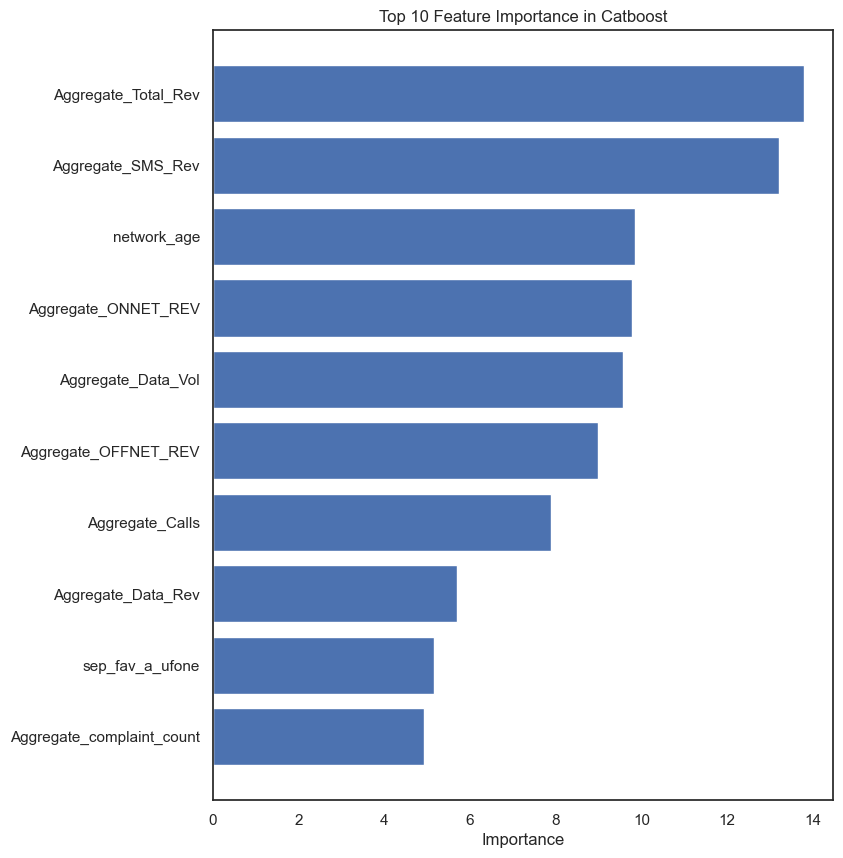

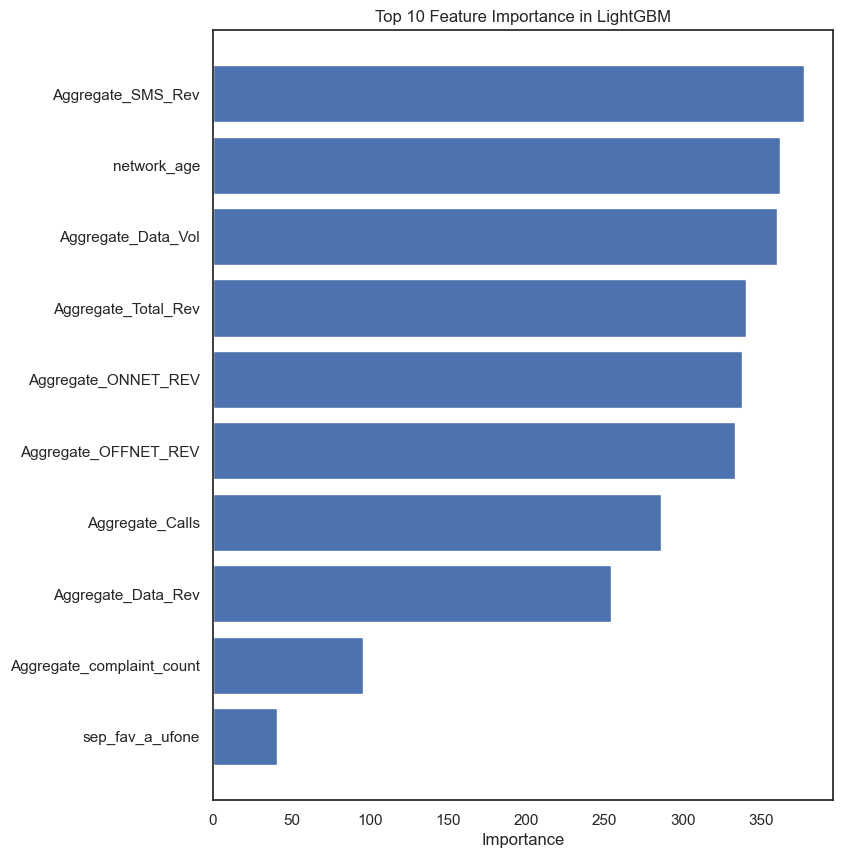

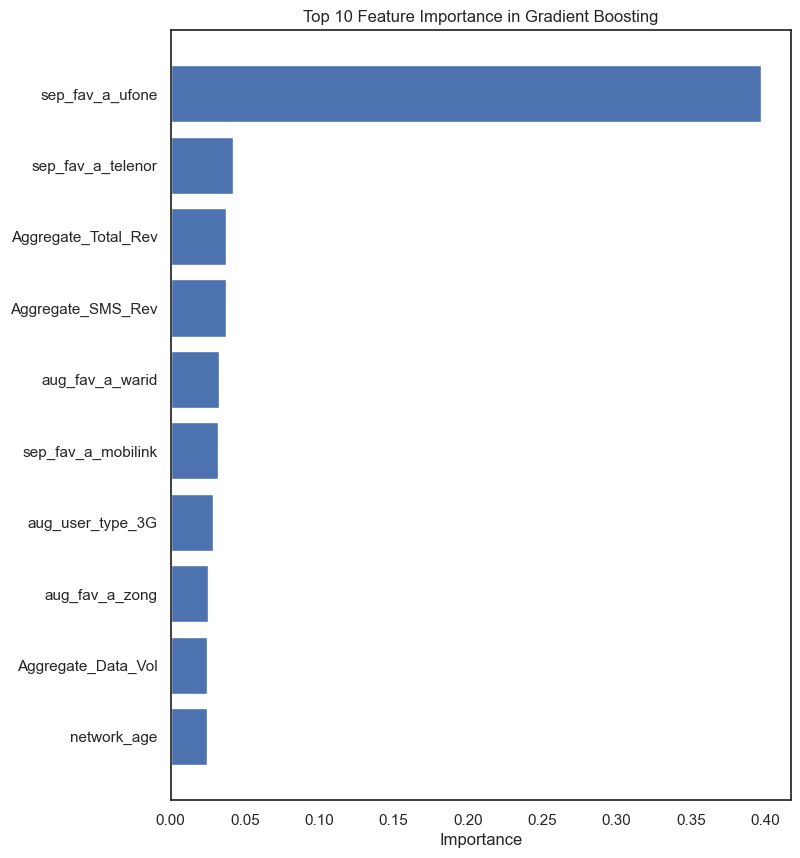

In [126]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

#### 7.10 Nigeria Telcom Churn Dataset

##### 7.10.1 Nigeria Telcom Churn EDA

In [127]:
# Create a brief summary data table
nigeria_telcom_df_summary = pd.DataFrame({
    "Unique Values" : nigeria_telcom_df.nunique(),
    "Missing Values": nigeria_telcom_df.isnull().sum(),
    'NaN Values': nigeria_telcom_df.isna().sum(),
    'Duplicated' : nigeria_telcom_df.duplicated().sum(),
    'Dtypes': nigeria_telcom_df.dtypes
})

nigeria_telcom_df_summary.sort_values('Missing Values', ascending=False)

Unique Values  Missing Values  \
Network type subscription in Month 1                     3             176   
Network type subscription in Month 2                     3             145   
Most Loved Competitor network in in Month 1              7               2   
Most Loved Competitor network in in Month 2              6               2   
Customer ID                                           1400               1   
network_age                                           1038               1   
Customer tenure in month                              1038               1   
Total Spend in Months 1 and 2 of 2017                 1387               1   
Total SMS Spend                                        712               1   
Total Data Spend                                       241               1   
Total Data Consumption                                1394               1   
Total Unique Calls                                     503               1   
Total Onnet spend                                      851               1   
Total Offnet spend                                    1126               1   
Total Call centre complaint calls                       19               1   
Churn Status                                             2               1   

                                             NaN Values  Duplicated   Dtypes  
Network type subscription in Month 1                176           0   object  
Network type subscription in Month 2                145           0   object  
Most Loved Competitor network in in Month 1           2           0   object  
Most Loved Competitor network in in Month 2           2           0   object  
Customer ID                                           1           0   object  
network_age                                           1           0  float64  
Customer tenure in month                              1           0  float64  
Total Spend in Months 1 and 2 of 2017                 1           0  float64  
Total SMS Spend                                       1           0  float64  
Total Data Spend                                      1           0  float64  
Total Data Consumption                                1           0  float64  
Total Unique Calls                                    1           0  float64  
Total Onnet spend                                     1           0  float64  
Total Offnet spend                                    1           0  float64  
Total Call centre complaint calls                     1           0  float64  
Churn Status                                          1           0  float64

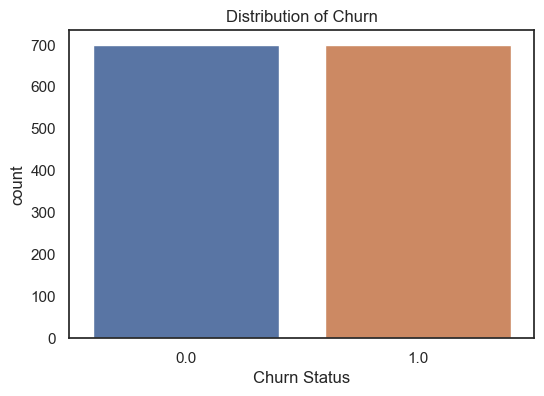

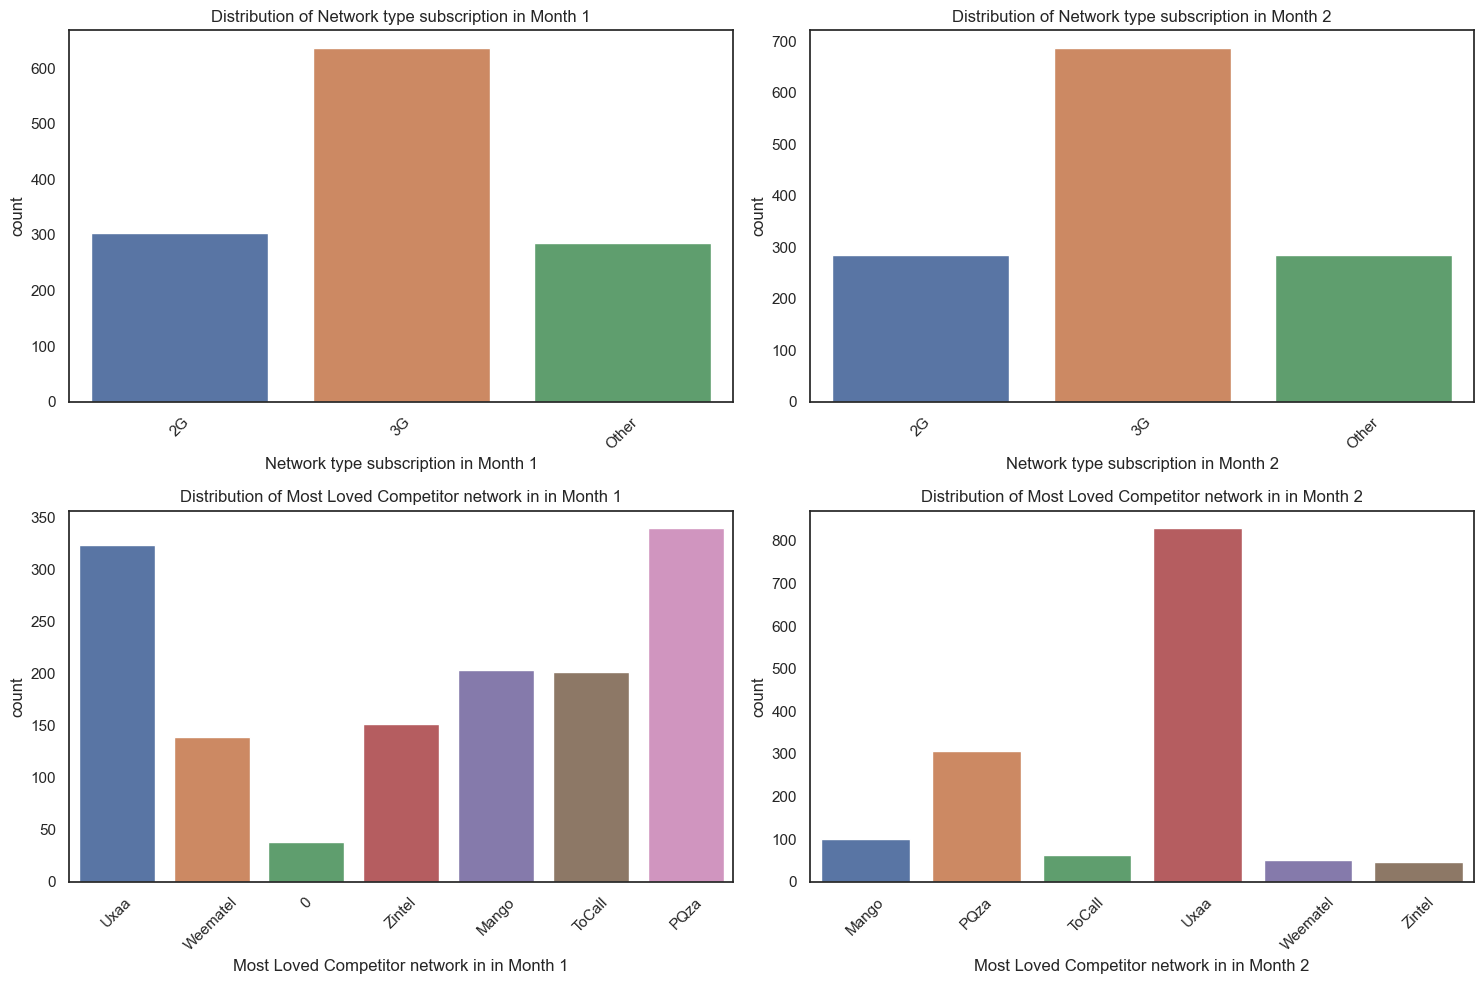

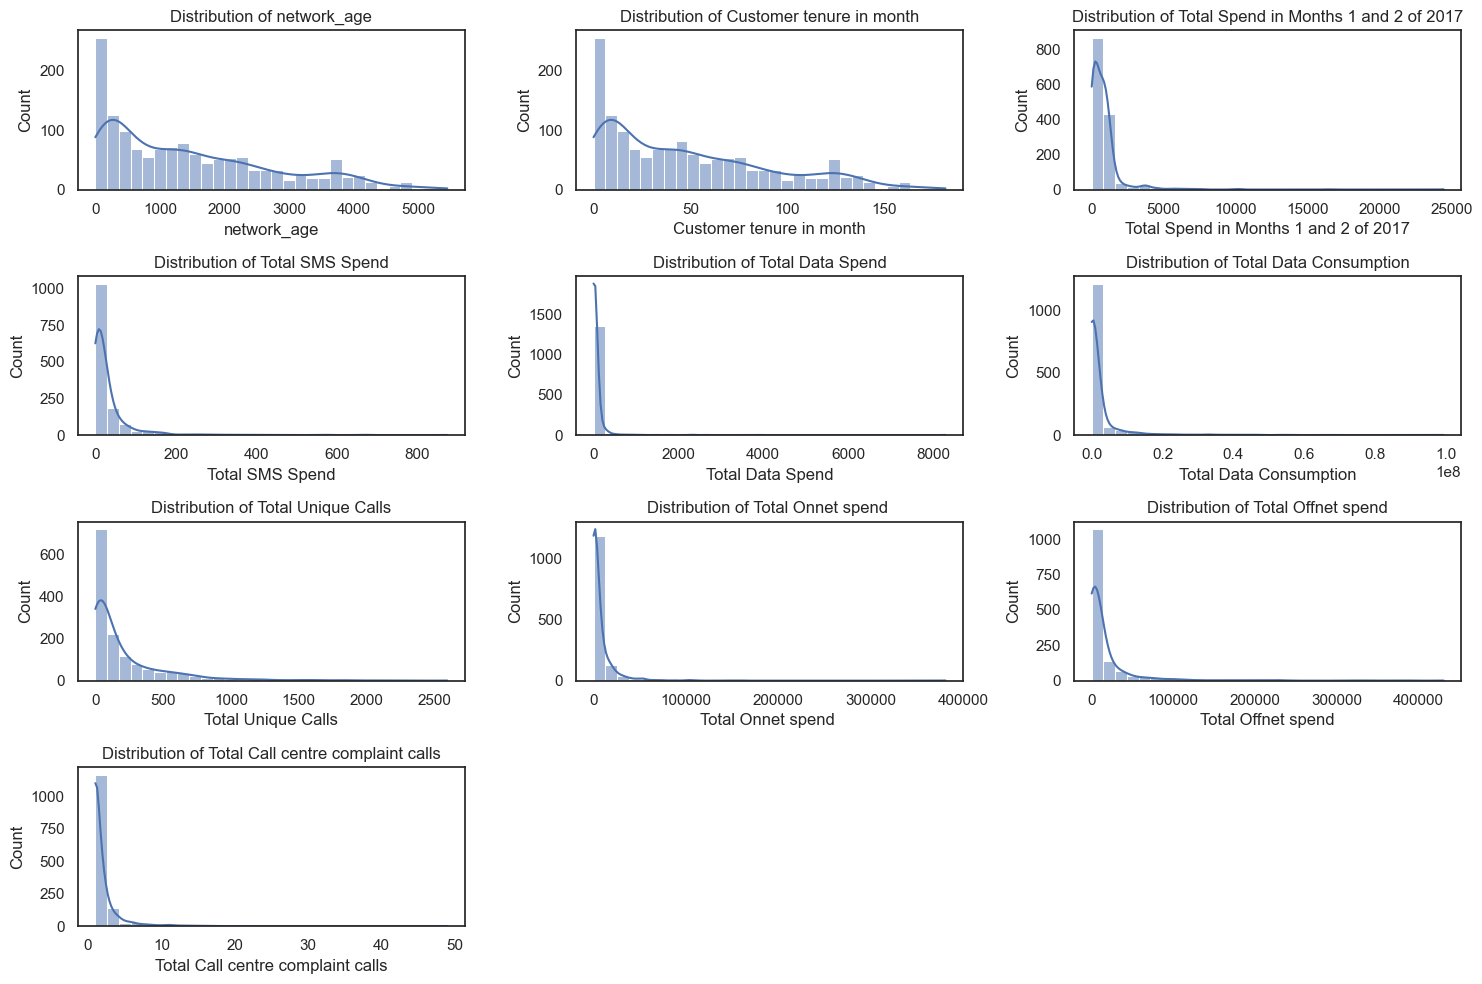

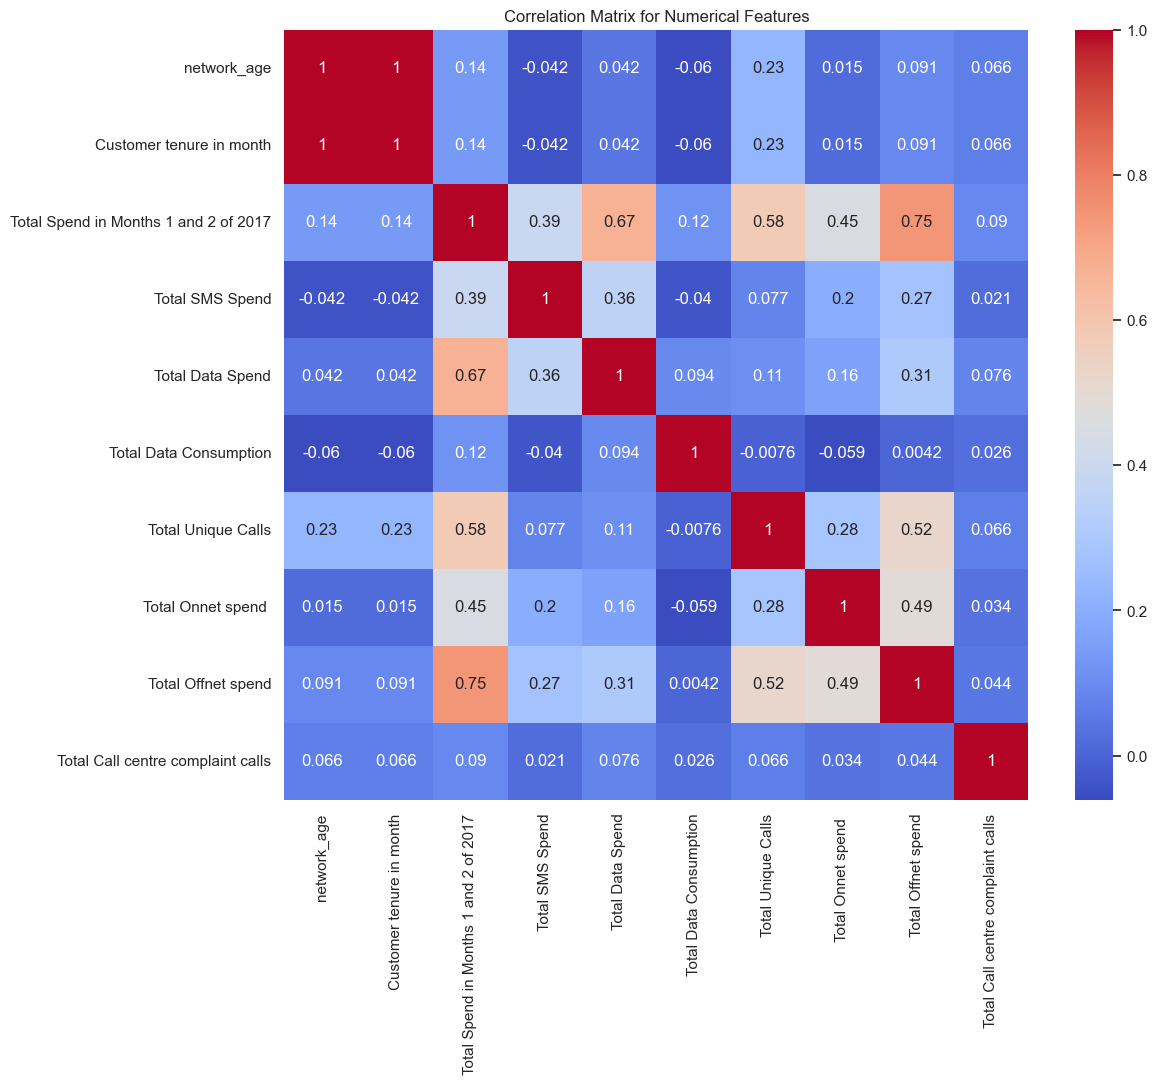

In [128]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn Status', data=nigeria_telcom_df)
plt.title("Distribution of Churn")
plt.show()

# Identifying categorical and numerical features
cat_features = [col for col in nigeria_telcom_df.columns if nigeria_telcom_df[col].nunique() < 10 and col != 'Churn Status']
num_features = [col for col in nigeria_telcom_df.columns if col not in cat_features + ['Churn Status', 'Customer ID']]

# Distribution of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, data=nigeria_telcom_df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(nigeria_telcom_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(nigeria_telcom_df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

##### 7.10.2 Nigeria Telcom Churn Preprocessing

In [129]:
# Step 1: Remove non-informative columns and correct data types
for col in cat_features:
    nigeria_telcom_df[col] = nigeria_telcom_df[col].astype('category')
    
nigeria_telcom_df = nigeria_telcom_df.drop(columns=['Customer ID'])
nigeria_telcom_df = nigeria_telcom_df[nigeria_telcom_df['Churn Status'].notna()]

# Step 2: Create target and  independent features 
X = nigeria_telcom_df.drop(columns=['Churn Status'])
y = nigeria_telcom_df['Churn Status']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# Step 3: Fill missing and scaling
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values 
    ('scaler', StandardScaler()) # scaling
])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

network_age  Customer tenure in month  \
0    -0.048855                 -0.048933   
1    -0.968746                 -0.968746   
2    -0.871624                 -0.871624   
3    -1.011384                 -1.011384   
4     0.961841                  0.961843   

   Total Spend in Months 1 and 2 of 2017  Total SMS Spend  Total Data Spend  \
0                              -0.577085        -0.366510         -0.133964   
1                              -0.545869         0.554001         -0.187829   
2                               0.641245        -0.326444          0.243092   
3                               0.132061        -0.084875         -0.160897   
4                              -0.124855        -0.050844         -0.049319   

   Total Data Consumption  Total Unique Calls  Total Onnet spend   \
0               -0.311390           -0.678775           -0.389371   
1               -0.311479           -0.682139           -0.377132   
2                6.260242           -0.187545           -0.379852   
3               -0.022173            1.629331           -0.321941   
4               -0.311258            0.653601            0.032833   

   Total Offnet spend  Total Call centre complaint calls  ...  \
0           -0.369557                          -0.391939  ...   
1           -0.389780                          -0.391939  ...   
2            0.475898                          -0.391939  ...   
3           -0.381441                          -0.391939  ...   
4           -0.219427                          -0.391939  ...   

   Most Loved Competitor network in in Month 1_ToCall  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                1.0    
4                                                0.0    

   Most Loved Competitor network in in Month 1_Uxaa  \
0                                               0.0   
1                                               1.0   
2                                               1.0   
3                                               0.0   
4                                               1.0   

   Most Loved Competitor network in in Month 1_Weematel  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Most Loved Competitor network in in Month 1_Zintel  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   Most Loved Competitor network in in Month 2_Mango  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Most Loved Competitor network in in Month 2_PQza  \
0                                               1.0   
1                                               1.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Most Loved Competitor network in in Month 2_ToCall  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   Most Loved Competitor network in in Month 2_Uxaa  \
0                  

##### 7.10.3 Nigeria Telcom Churn Predictive Models

In [130]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Lightgbm                 0.83       0.83    0.83  0.83     0.90
Gradient Boosting        0.82       0.82    0.82  0.82     0.90
Catboost                 0.82       0.82    0.82  0.82     0.90
AdaBoost                 0.82       0.82    0.82  0.82     0.89
XGboost                  0.81       0.81    0.80  0.81     0.89
Random Forest            0.82       0.83    0.80  0.81     0.88
Bagging                  0.80       0.82    0.77  0.79     0.87
MLP                      0.71       0.72    0.70  0.71     0.77
SVC                      0.69       0.71    0.63  0.67     0.77
Decision Tree            0.75       0.75    0.74  0.75     0.75
Logistic Regression      0.67       0.69    0.62  0.65     0.72
GaussianNB               0.66       0.71    0.54  0.61     0.70
KNeighbors               0.64       0.65    0.61  0.63     0.69


In [131]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values(['roc_auc','f1', 'accuracy'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Catboost                 0.84       0.82    0.89  0.85     0.92
Lightgbm                 0.83       0.82    0.85  0.84     0.92
Gradient Boosting        0.83       0.81    0.85  0.83     0.92
XGboost                  0.81       0.79    0.83  0.81     0.91
Random Forest            0.81       0.80    0.81  0.81     0.90
AdaBoost                 0.80       0.78    0.83  0.81     0.90
Bagging                  0.78       0.78    0.77  0.78     0.88
MLP                      0.71       0.69    0.75  0.72     0.81
Decision Tree            0.78       0.77    0.79  0.78     0.78
Logistic Regression      0.72       0.73    0.70  0.71     0.76
GaussianNB               0.68       0.74    0.55  0.63     0.74
KNeighbors               0.66       0.66    0.65  0.66     0.71
SVC                      0.70       0.71    0.67  0.69      NaN


  Model  Accuracy  Precision  Recall  F1 Score
0   cat      0.84       0.82    0.89      0.85
1  lgbm      0.83       0.82    0.85      0.84
2   xgb      0.81       0.79    0.83      0.81


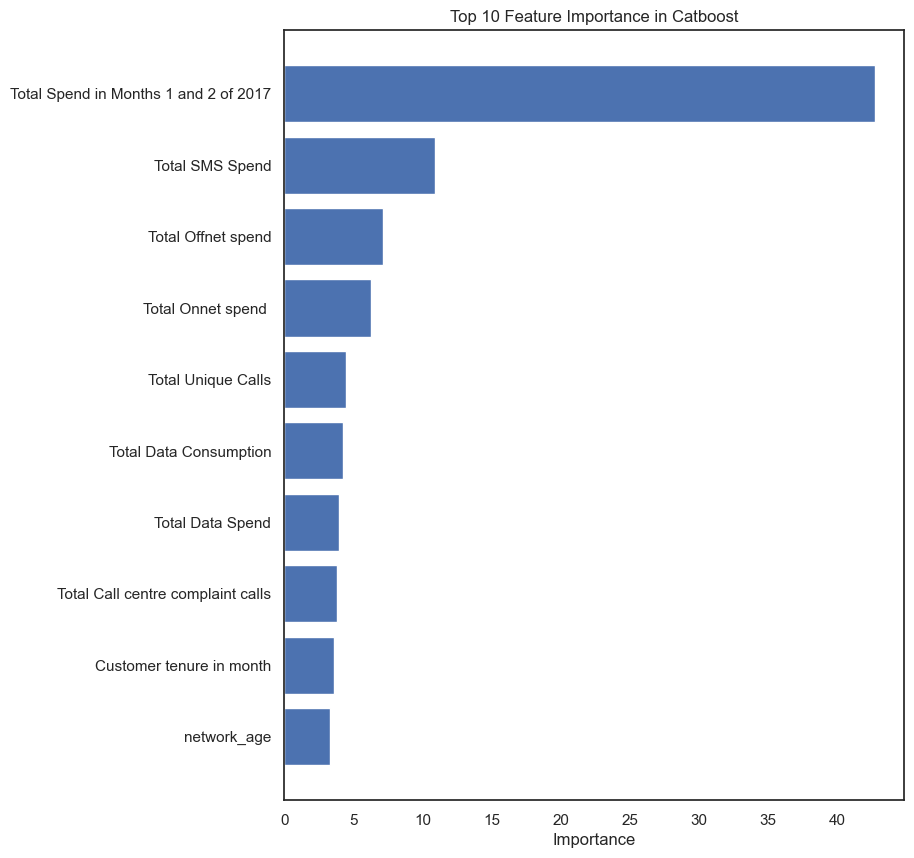

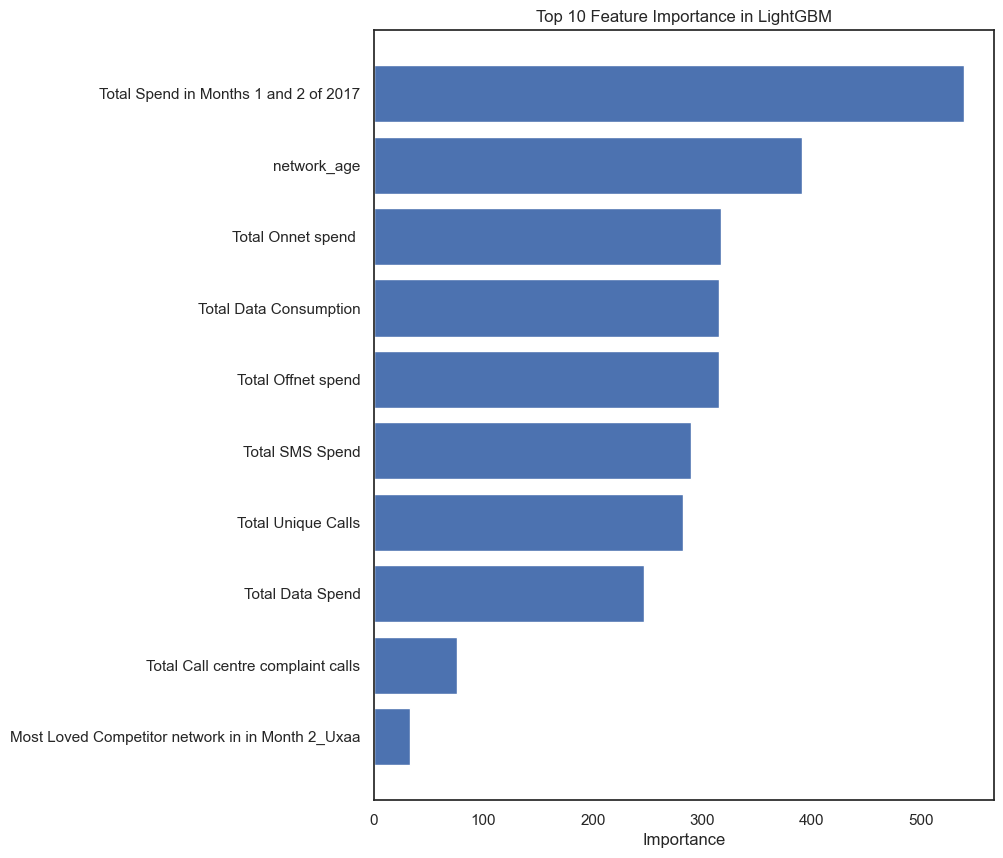

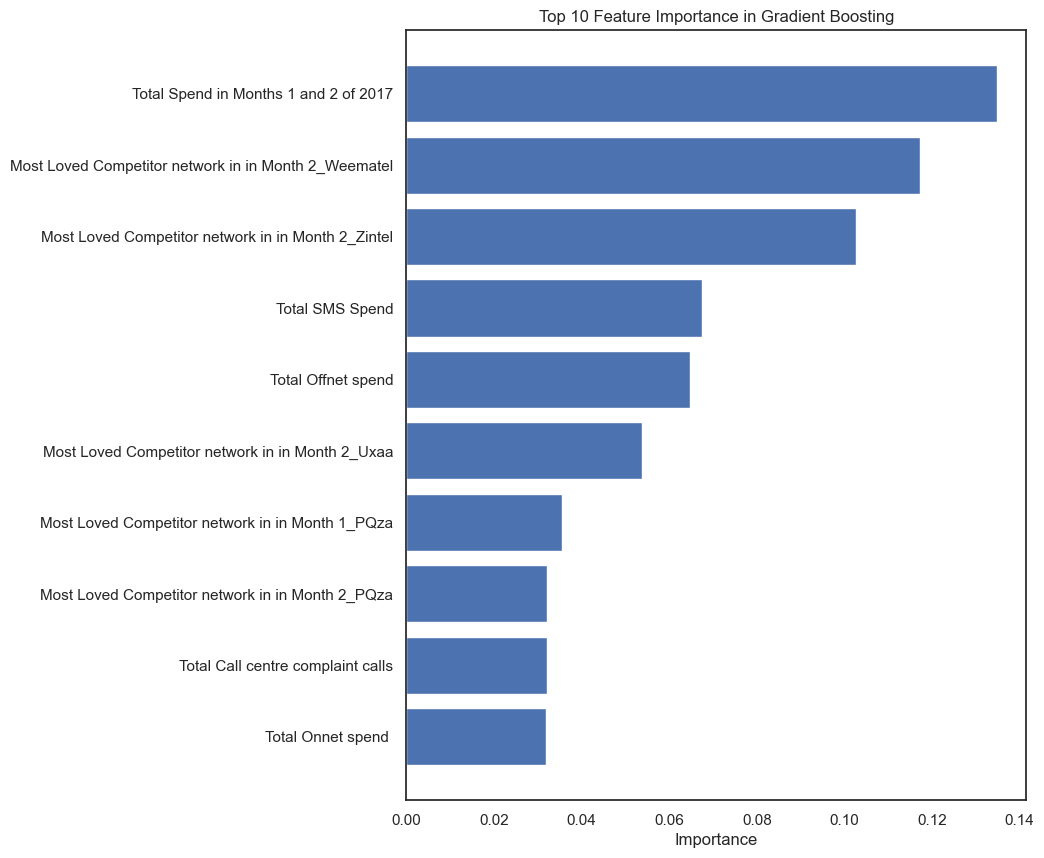

In [132]:
### Feature Importance

catboost = CatBoostClassifier(random_state=6910, verbose=False)
lightgbm = LGBMClassifier(random_state=6910, verbose=-1)
xgboost = XGBClassifier(random_state=6910)

# List of classifiers
classifiers = [
    ('cat', catboost),
    ('lgbm', lightgbm),
    ('xgb', xgboost)    
]

# Fit the models and make predictions
results = []
for name, model in classifiers:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Catboost Feature Importance
feature_importance_cat = catboost.feature_importances_
sorted_idx_cat = feature_importance_cat.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_cat)), feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(range(len(sorted_idx_cat)), [X_test_pro_df.columns[i] for i in sorted_idx_cat])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Catboost')
plt.show()

# LightGBM Feature Importance
feature_importance_lgbm = lightgbm.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = xgboost.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()